In [8]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import requests
from census import Census
import json
import os

# Census API Key
from config import api_key

c = Census(api_key, year=2019)

# Data Retrieval

## Bexar County Data (CSV Download)

In [9]:
#Define file paths
bexarcsvpath = os.path.join("Data","Bexar_County_COVID-19_Data_by_Zip_Code.csv")

# read in CSV files
bexar_countydata = pd.read_csv(bexarcsvpath)
bexar_countydata = bexar_countydata.drop(
    columns=['SHAPE_Length','SHAPE_Area','OBJECTID'])

display(bexar_countydata.head())

ZIP_CODE  populationtotals_totpop_cy  Positive  CasesP100000  ZipInt  \
0     78002                        9061      1063  11816.362830   78002   
1     78006                        5243       278   4851.657941   78006   
2     78015                       12254       664   5167.315175   78015   
3     78023                       29569      1947   6588.163638   78023   
4     78052                         699        39   5555.555556   78052   

   ActiveCases  ActiveCaseRate  
0            6       66.696309  
1            3       52.356021  
2            7       54.474708  
3           15       50.756268  
4            3      427.350427

## Census Bureau Data (API Calls)
We used the datamade census wrapper to make our API calls

https://github.com/datamade/census

### Race data sorted by zip code

In [10]:
census_race = c.acs5.get(
    ("B02001_001E","B03002_003E","B03003_002E","B03003_003E","B02001_001E","B02001_002E",
     "B02001_003E","B02001_004E","B02001_005E","B02001_006E","B02001_007E","B02001_008E",
     "B02001_009E","B02001_010E"),{'for': 'zip code tabulation area:*'})

# Convert to dataframe
census_race = pd.DataFrame(census_race)
census_race = census_race.drop(columns=['state'])

# Column renaming
census_race = census_race.rename(
    columns={"B01003_001E": "Population","B01002_001E": "Median Age",
             "B02001_001E":"Total Race Population",
             "B02001_002E":"White","B02001_003E":"Black or African American",
             "B02001_004E":"America Native","B02001_005E":"Asian",
             "B02001_006E":"Native Pacific","B02001_007E":"Other",
             "B02001_008E":"Two or More","B02001_009E":"Two or More Inclusive",
             "B02001_010E":"Three or More","B19013_001E": "Household Income",
             "B19301_001E": "Per Capita Income","B17001_002E": "Poverty Count",
             "B03003_002E": "Not Hispanic or Latino",
             "B03003_003E": "Hispanic or Latino",
             "zip code tabulation area": "ZIP_CODE"})

#save data to csv file
census_race.to_csv("Data\census_race_data_by_zip")

### Ethnicity sorted by zip code

In [11]:
hispanic_race = c.acs5.get(
    ("B03002_001E","B03002_002E","B03002_003E","B03002_004E","B03002_005E",
     "B03002_006E","B03002_007E","B03002_008E","B03002_009E","B03002_010E",
     "B03002_011E","B03002_012E","B03002_013E","B03002_014E","B03002_015E",
     "B03002_016E","B03002_017E","B03002_018E","B03002_019E","B03002_020E",
     "B03002_021E"),{'for': 'zip code tabulation area:*'})

# Convert to dataframe
hispanic_race = pd.DataFrame(hispanic_race)
hispanic_race = hispanic_race.rename(
    columns={"zip code tabulation area":"ZipInt"})

#save data to csv file
hispanic_race.to_csv("Data\census_ethnicity_data_by_zip")

### Median Household Income sorted by zip code

In [12]:
income_data = c.acs5.get(("B19013_001E"),  {'for': 'zip code tabulation area:*'})

# Convert to dataframe
census_pd = pd.DataFrame(income_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B19013_001E": "Median Household Income",
                                      "zip code tabulation area": "ZIP_CODE"}) 

#save data to csv file
census_pd.to_csv("Data\census_income_data_by_zip")

### Age sorted by zip code

In [13]:
#Load in API data
census_data = c.acs5.get(
    ("B01001_001E", "B01001_002E", "B01001_003E", "B01001_004E", "B01001_005E", "B01001_006E",
    "B01001_007E", "B01001_008E", "B01001_009E", "B01001_010E", "B01001_011E", "B01001_012E",
    "B01001_013E", "B01001_014E", "B01001_015E", "B01001_016E", "B01001_017E", "B01001_018E",
    "B01001_019E", "B01001_020E", "B01001_021E", "B01001_022E", "B01001_023E", "B01001_024E",
    "B01001_025E", "B01001_026E", "B01001_027E", "B01001_028E", "B01001_029E", "B01001_030E",
    "B01001_031E", "B01001_032E", "B01001_033E", "B01001_034E", "B01001_035E", "B01001_036E",
    "B01001_037E", "B01001_038E", "B01001_039E", "B01001_040E", "B01001_041E", "B01001_042E",
    "B01001_043E", "B01001_044E", "B01001_045E", "B01001_046E", "B01001_047E", "B01001_048E",
    "B01001_049E"), {"for":"zip code tabulation area:*"})

#Convert to dataframe
census_df = pd.DataFrame(census_data)

#Column renaming
census_df = census_df.rename(
    columns = {"B01001_001E" : "Total", "B01001_002E" : "Total Male",
    "B01001_026E" : "Total Female", "B01001_003E" : "Male : Under 5 Years",
    "B01001_027E" : "Female : Under 5 Years", "B01001_004E" : "Male : 5 to 9 Years",
    "B01001_028E" : "Female : 5 to 9 Years", "B01001_005E" : "Male : 10 to 14 Years",
    "B01001_029E" : "Female : 10 to 14 Years", "B01001_006E" : "Male : 15 to 17 Years",
    "B01001_030E" : "Female : 15 to 17 Years", "B01001_007E" : "Male : 18 and 19 Years",
    "B01001_031E" : "Female : 18 and 19 Years", "B01001_008E" : "Male : 20 Years",
    "B01001_032E" : "Female : 20 Years", "B01001_009E" : "Male : 21 Years",
    "B01001_033E" : "Female : 21 Years", "B01001_010E" : "Male : 22 to 24 Years",
    "B01001_034E" : "Female : 22 to 24 Years", "B01001_011E" : "Male : 25 to 29 Years",
    "B01001_035E" : "Female : 25 to 29 Years", "B01001_012E" : "Male : 30 to 34 Years",
    "B01001_036E" : "Female : 30 to 34 Years", "B01001_013E" : "Male : 35 to 39 Years",
    "B01001_037E" : "Female : 35 to 39 Years", "B01001_014E" : "Male : 40 to 44 Years",
    "B01001_038E" : "Female : 40 to 44 Years", "B01001_015E" : "Male : 45 to 49 Years",
    "B01001_039E" : "Female : 45 to 49 Years", "B01001_016E" : "Male : 50 to 54 Years",
    "B01001_040E" : "Female : 50 to 54 Years", "B01001_017E" : "Male : 55 to 59 Years",
    "B01001_041E" : "Female : 55 to 59 Years", "B01001_018E" : "Male : 60 and 61 Years",
    "B01001_042E" : "Female : 60 to 61 Years", "B01001_019E" : "Male : 62 to 64 Years",
    "B01001_043E" : "Female : 62 to 64 Years", "B01001_020E" : "Male : 65 and 66 Years",
    "B01001_044E" : "Female : 65 and 66 Years", "B01001_021E" : "Male : 67 to 69 Years",
    "B01001_045E" : "Female : 67 to 69 Years", "B01001_022E" : "Male : 70 to 74 Years",
    "B01001_046E" : "Female : 70 to 74 Years", "B01001_023E" : "Male : 75 to 79 Years",
    "B01001_047E" : "Female : 75 to 79 Years", "B01001_024E" : "Male : 80 to 84 Years",
    "B01001_048E" : "Female : 80 to 84 Years", "B01001_025E" : "Male : 85 Years and Over",
    "B01001_049E" : "Female : 85 Years and Over","zip code tabulation area" : "ZIP_CODE"})

#save data to csv file
census_df.to_csv("Data\census_age_data_by_zip")

# Data Cleaning

### Ethnicity data

In [14]:
# Merge data right onto bexar county data to get only zip codes for bexar county
hispanic_race["ZipInt"] = hispanic_race["ZipInt"].astype(str).astype(int)
hispanic_merge = pd.merge(hispanic_race, bexar_countydata, on="ZipInt",how="right")
hispanic_merge.drop(columns=["state"])

# Convert counts to percentages
hispanicpercents = hispanic_merge.copy()
hispanic_columnlist = [
    'B03002_002E','B03002_003E','B03002_004E','B03002_005E', 'B03002_006E',
    'B03002_007E','B03002_008E','B03002_009E','B03002_010E','B03002_011E', 'B03002_012E',
    'B03002_013E','B03002_014E','B03002_015E','B03002_016E','B03002_017E','B03002_018E',
    'B03002_019E','B03002_020E','B03002_021E']

for header in hispanic_columnlist:
    hispanicpercents[header] = hispanicpercents[header]/hispanicpercents['B03002_001E']*100

### Race data

In [15]:
# Merge data right onto bexar county data to get only zip codes for bexar county
census_race["ZIP_CODE"] = census_race["ZIP_CODE"].astype(str).astype(int)
merged_data = pd.merge(census_race,bexar_countydata, on="ZIP_CODE",how="right")

In [16]:
#Convert counts to percentages
merged_data["Percent White"] = merged_data["White"]/merged_data["Total Race Population"]*100
merged_data["Percent Black"] = merged_data["Black or African American"]/merged_data["Total Race Population"]*100
merged_data["Percent America Native"] = merged_data["America Native"]/merged_data["Total Race Population"]*100
merged_data["Percent Asian"] = merged_data["Asian"]/merged_data["Total Race Population"]*100
merged_data["Percent Native Pacific"] = merged_data["Native Pacific"]/merged_data["Total Race Population"]*100
merged_data["Percent Other"] = merged_data["Other"]/merged_data["Total Race Population"]*100
merged_data["Percent Two or More"] = merged_data["Two or More"]/merged_data["Total Race Population"]*100
merged_data["Percent Two or More Inclusive"] = merged_data["Two or More Inclusive"]/merged_data["Total Race Population"]*100
merged_data["Percent Three or More"] = merged_data["Three or More"]/merged_data["Total Race Population"]*100
merged_data["Percent Not Hispanic or Latino"] = merged_data["Not Hispanic or Latino"]/merged_data["Total Race Population"]*100
merged_data["Percent Hispanic or Latino"] = merged_data["Hispanic or Latino"]/merged_data["Total Race Population"]*100

### Income data

In [17]:
census_pd["ZIP_CODE"] = census_pd["ZIP_CODE"].astype(str).astype(int)

# Merge left onto bexar county data to get only zip codes for bexar county
merge_df = pd.merge(bexar_countydata, census_pd, on="ZIP_CODE", how="left")

# Drop outlier zipcode, 78150, non real income data
merge_df.sort_values(by='Median Household Income', ascending=False)
merge_df["Median Household Income"].min()
merge_df.drop([13], inplace = True)

### Age data

In [18]:
# Merge data right onto bexar county data to get only zip codes for bexar county
census_df["ZIP_CODE"] = census_df["ZIP_CODE"].astype(str).astype(int)
age_merge_df = pd.merge(bexar_countydata, census_df, on = "ZIP_CODE", how = "left")

In [19]:
# convert counts to percentages
age_percentage = age_merge_df.copy()
age_columns = ["Total Male", "Total Female", "Male : Under 5 Years", "Female : Under 5 Years", "Male : 5 to 9 Years", "Female : 5 to 9 Years",
                      "Male : 10 to 14 Years", "Female : 10 to 14 Years", "Male : 15 to 17 Years", "Female : 15 to 17 Years", "Male : 18 and 19 Years", "Female : 18 and 19 Years",
                      "Male : 20 Years", "Female : 20 Years", "Male : 21 Years", "Female : 21 Years", "Male : 22 to 24 Years",
                      "Female : 22 to 24 Years", "Male : 25 to 29 Years", "Female : 25 to 29 Years", "Male : 30 to 34 Years",
                      "Female : 30 to 34 Years", "Male : 35 to 39 Years", "Female : 35 to 39 Years", "Male : 40 to 44 Years",
                      "Female : 40 to 44 Years", "Male : 45 to 49 Years", "Female : 45 to 49 Years", "Male : 50 to 54 Years",
                      "Female : 50 to 54 Years", "Male : 55 to 59 Years", "Female : 55 to 59 Years", "Male : 60 and 61 Years",
                      "Female : 60 to 61 Years", "Male : 62 to 64 Years", "Female : 62 to 64 Years", "Male : 65 and 66 Years",
                      "Female : 65 and 66 Years", "Male : 67 to 69 Years", "Female : 67 to 69 Years", "Male : 70 to 74 Years",
                      "Female : 70 to 74 Years", "Male : 75 to 79 Years", "Female : 75 to 79 Years", "Male : 80 to 84 Years",
                      "Female : 80 to 84 Years", "Male : 85 Years and Over", "Female : 85 Years and Over"]

for header in age_columns:
    age_percentage[header] = age_percentage[header]/age_percentage["Total"]*100

# Zip Code Filters

### Ethnicity filters

In [20]:
#Group zip codes >51% hispanic and >51% non hispanic
majorityhispanic = pd.DataFrame
majoritynonhispanic = pd.DataFrame

majorityhispanic = merged_data.copy()[merged_data["Percent Hispanic or Latino"] >51]
majoritynonhispanic = merged_data.copy()[merged_data["Percent Not Hispanic or Latino"]> 51]

# Save filters to csv
majorityhispanic["ZipInt"].to_csv("Data\majorityhispanic_filter")
majoritynonhispanic["ZipInt"].to_csv("Data\majoritynonhispanic_filter")

### Income Filters

In [21]:
#determine median value for median income
merge_df["Median Household Income"].median()

60787.0

In [22]:
#  Create filters to split zipcodes above and below median income
belowmedian = pd.DataFrame
abovemedian = pd.DataFrame

belowmedian = merge_df.copy()[merge_df["Median Household Income"] <60787.0]
abovemedian = merge_df.copy()[merge_df["Median Household Income"]>= 60787.0]

#export median income filters for ethnicity comparison
belowmedian["ZIP_CODE"].to_csv(r'Data\belowmedian_filter')
abovemedian["ZIP_CODE"].to_csv(r'Data\abovemedian_filer')

# Data Exploration

### Ethnicity data

In [23]:
# Ethnicity data column headers
hispanic_list =['B03002_001E', 'B03002_002E', 'B03002_003E', 'B03002_004E',
       'B03002_005E', 'B03002_006E', 'B03002_007E', 'B03002_008E',
       'B03002_009E', 'B03002_010E', 'B03002_011E', 'B03002_012E',
       'B03002_013E', 'B03002_014E', 'B03002_015E', 'B03002_016E',
       'B03002_017E', 'B03002_018E', 'B03002_019E', 'B03002_020E',
       'B03002_021E']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


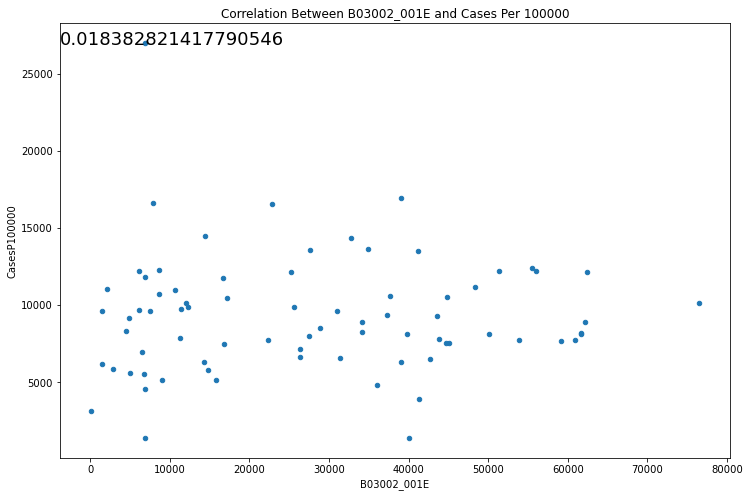

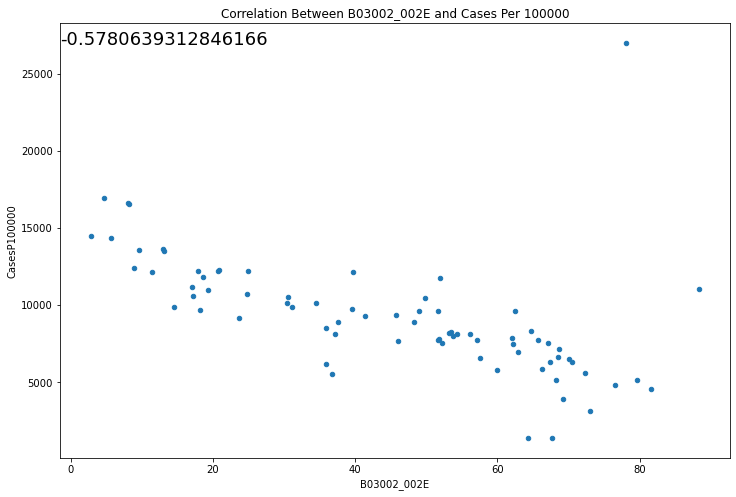

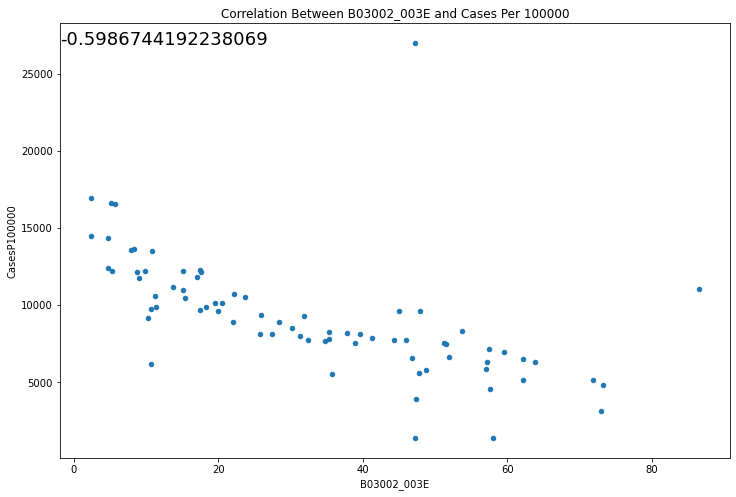

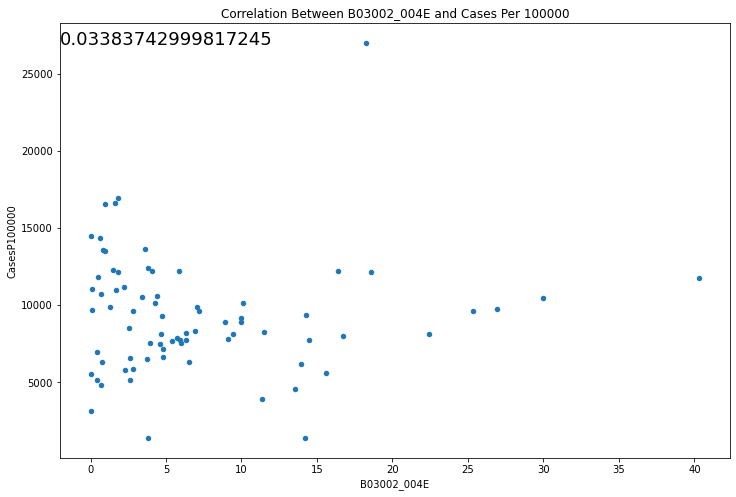

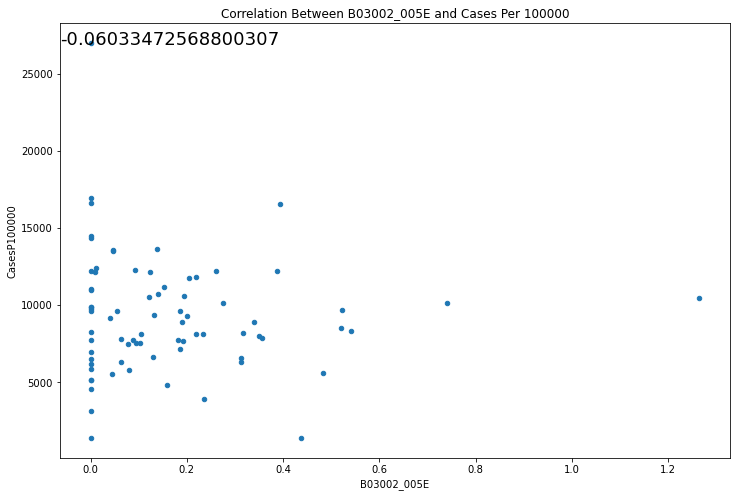

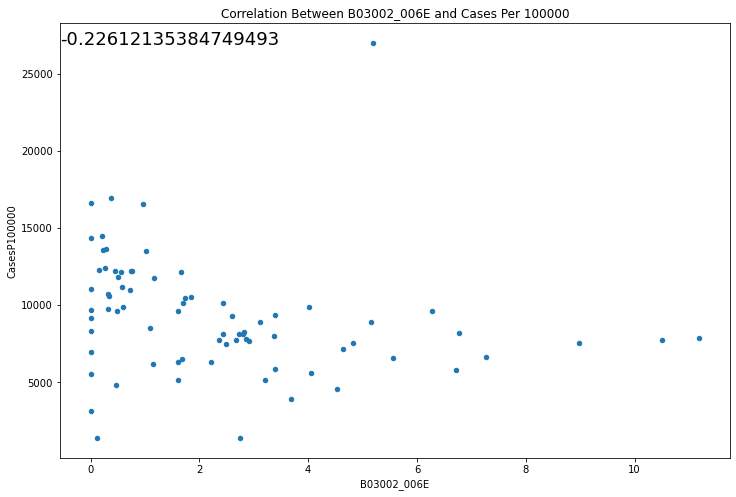

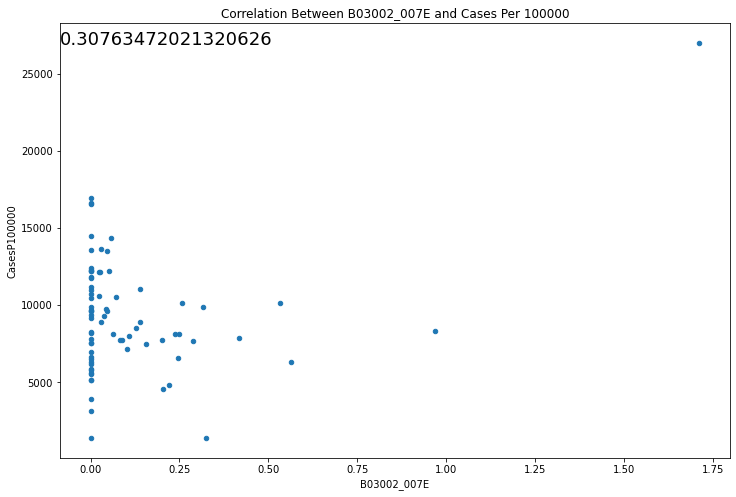

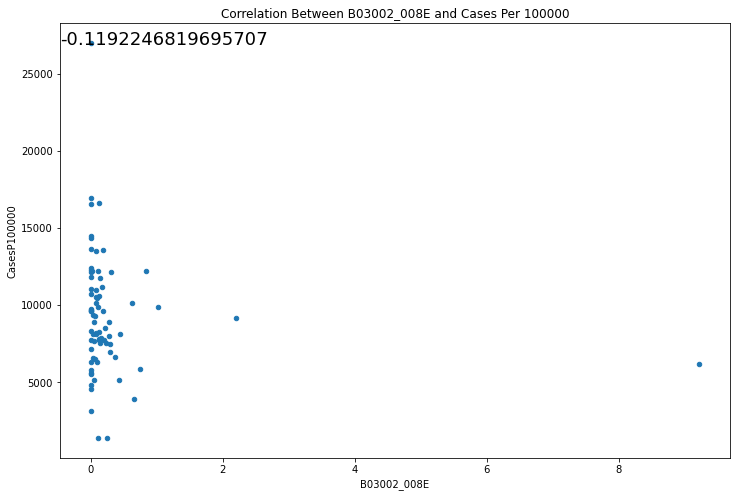

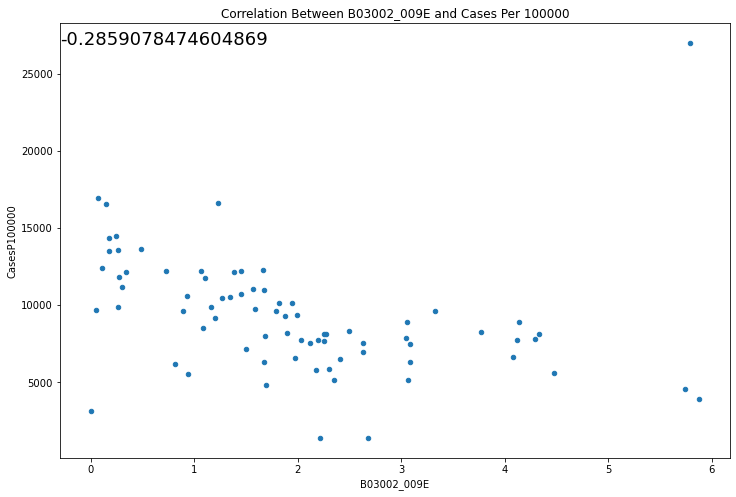

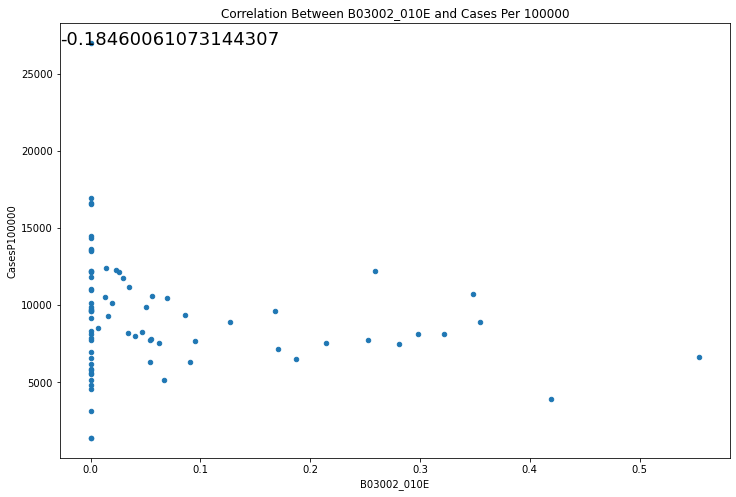

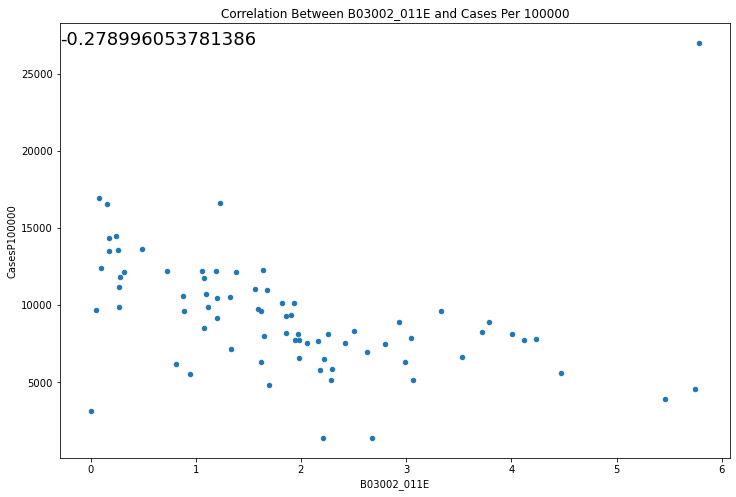

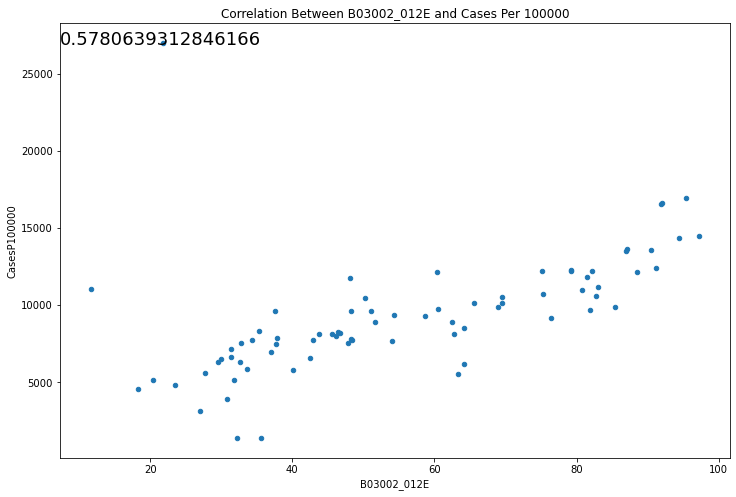

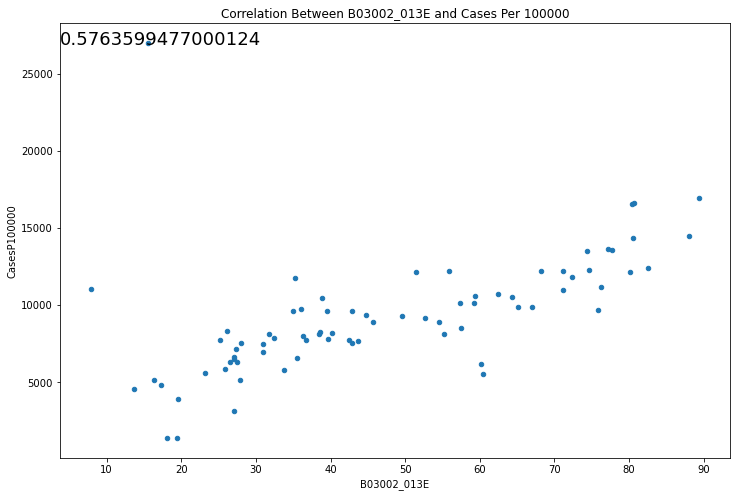

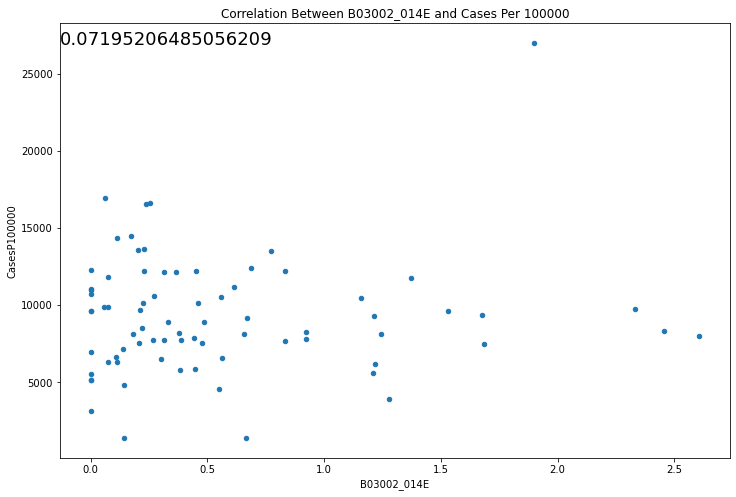

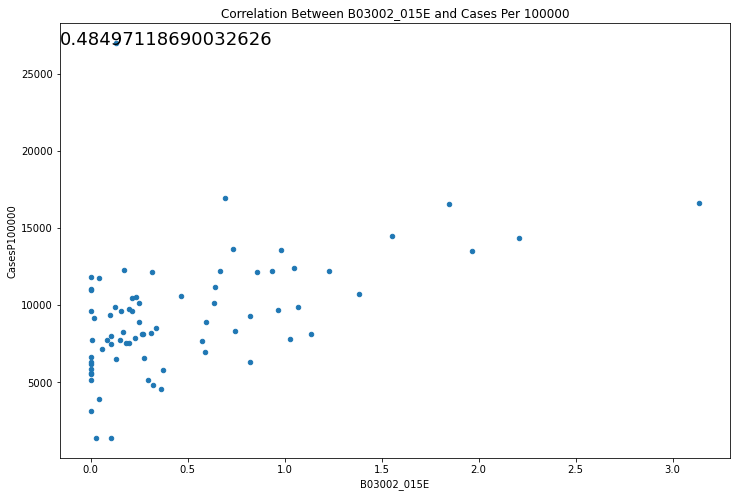

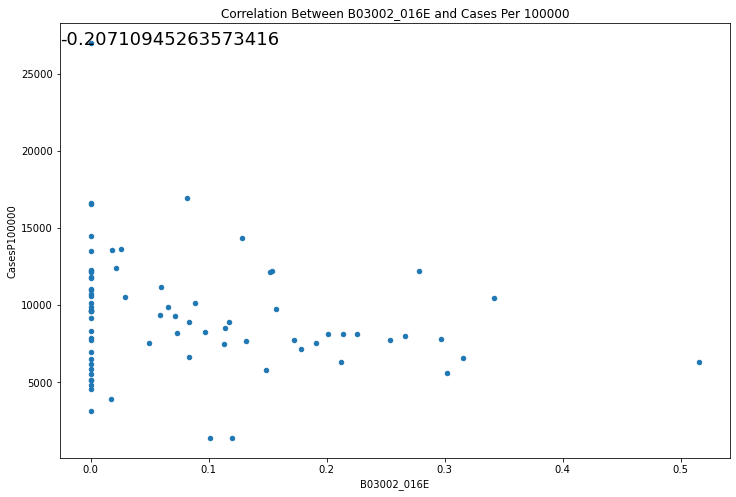

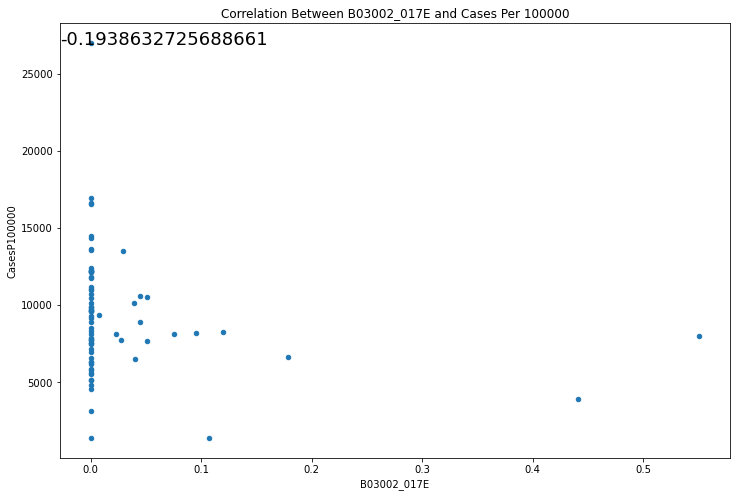

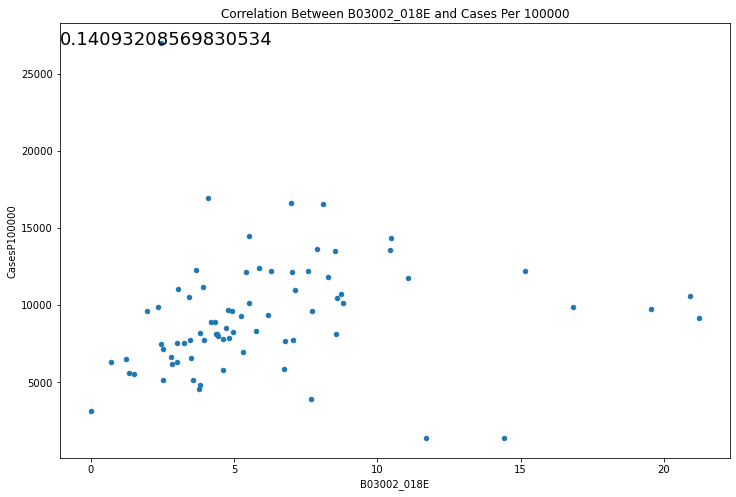

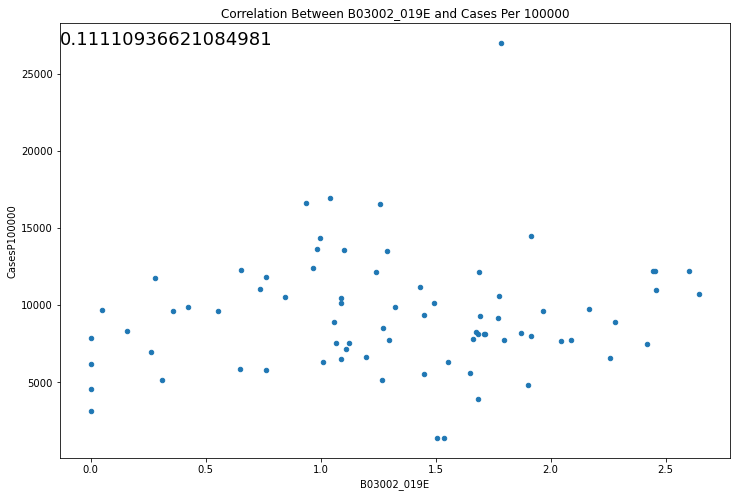

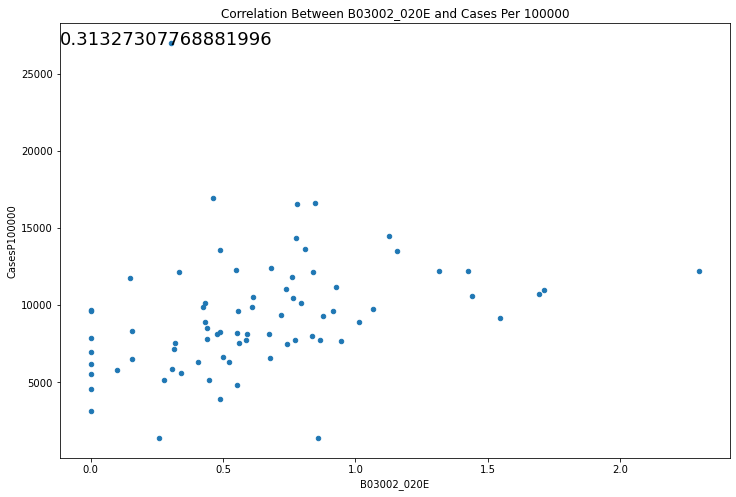

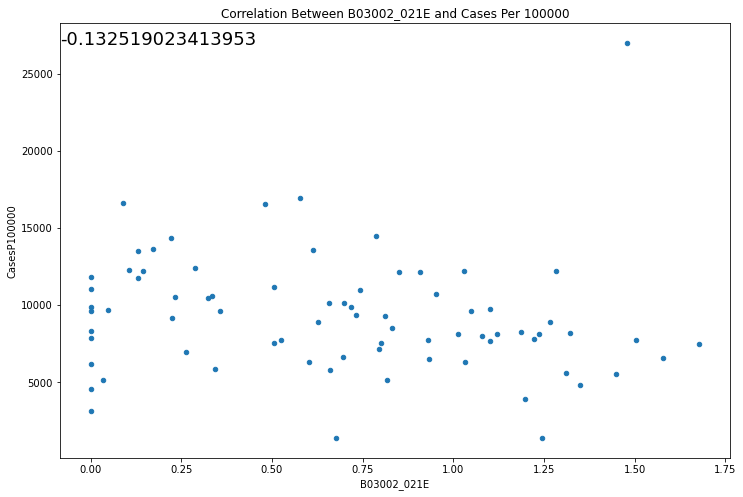

In [24]:
# Plots for all zip codes
for element in hispanic_list:
    hispanicpercents.plot.scatter(element,"CasesP100000", figsize = (12,8),title=f'Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(hispanicpercents[element],
                                 hispanicpercents["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

### Ethnicity data filtered by income

In [25]:
#merge data left to filter by income
ethnicity_belowmedian = pd.merge(belowmedian,hispanicpercents, on="ZipInt",how="left")
ethnicity_abovemedian = pd.merge(abovemedian,hispanicpercents, on= 'ZipInt', how = 'left')

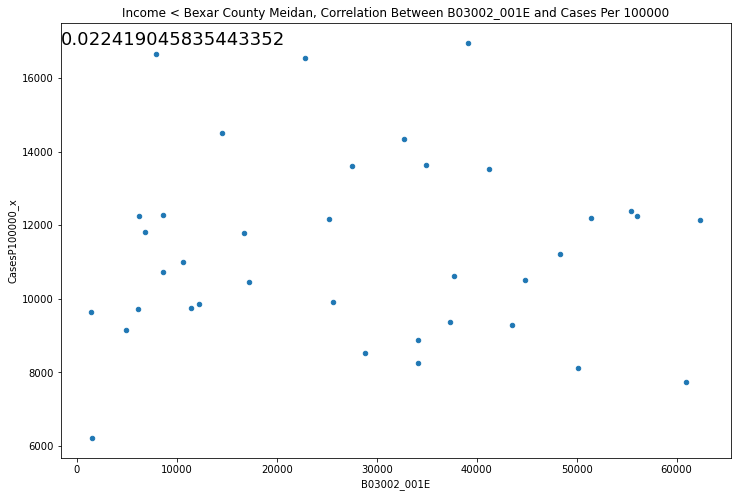

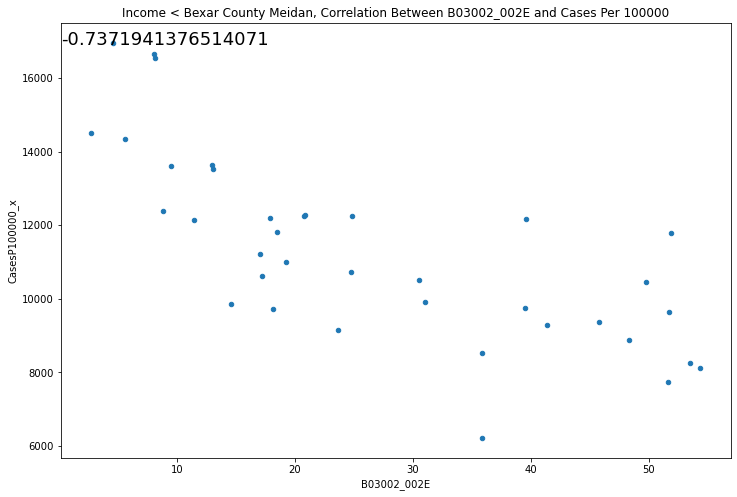

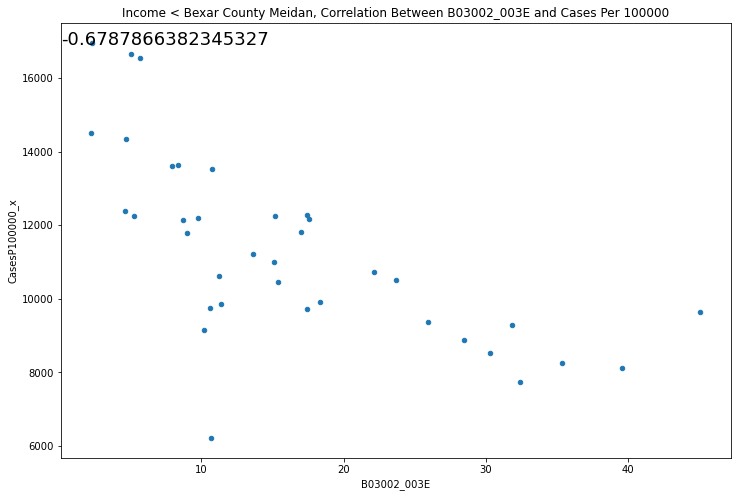

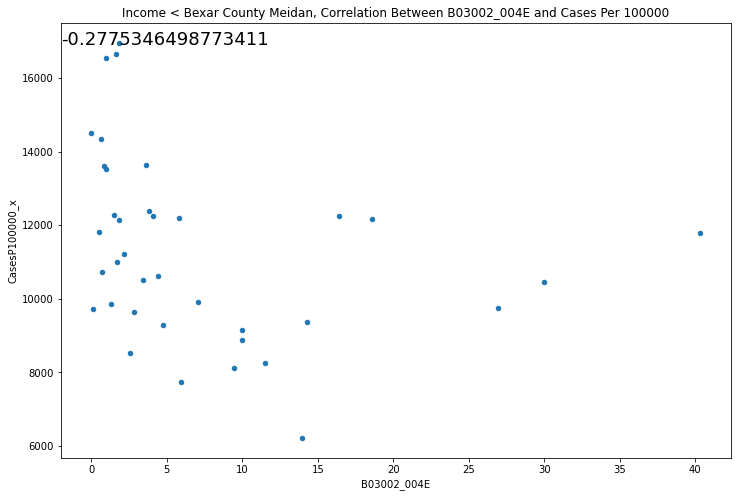

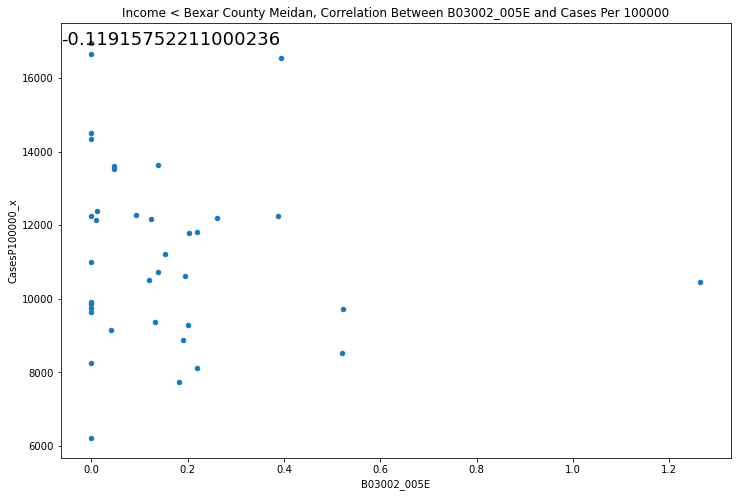

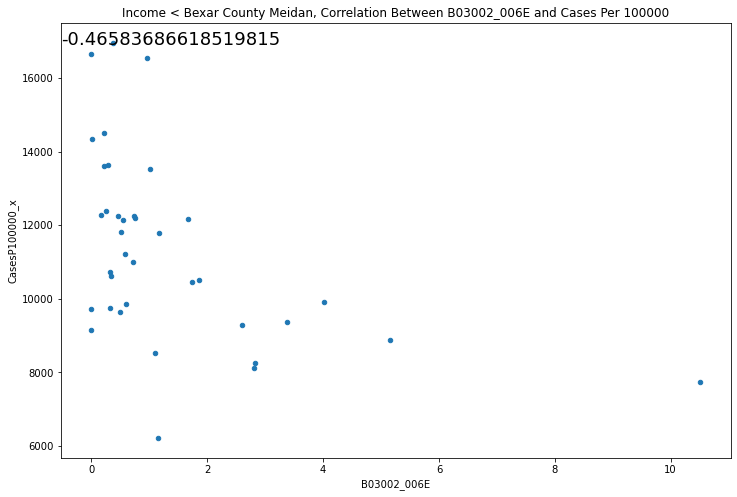

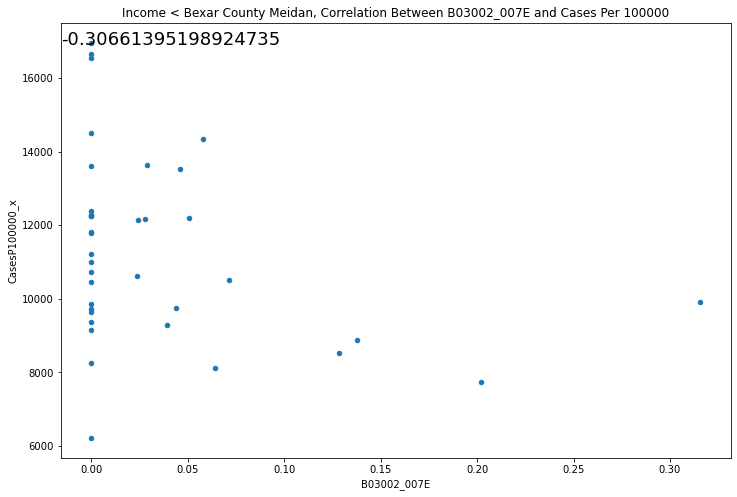

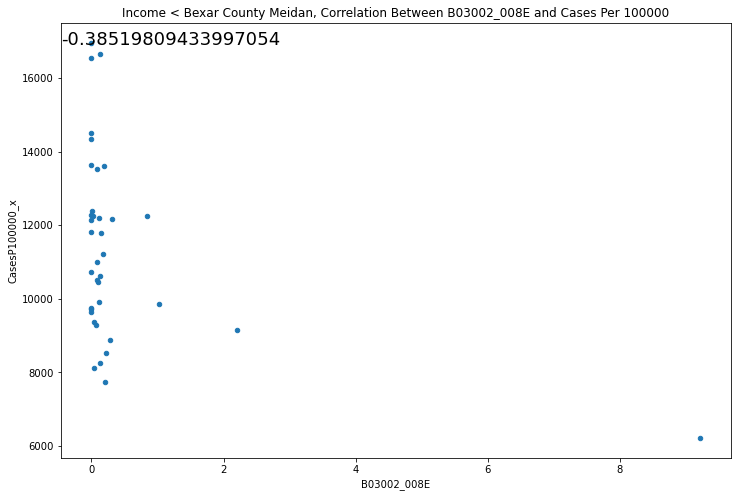

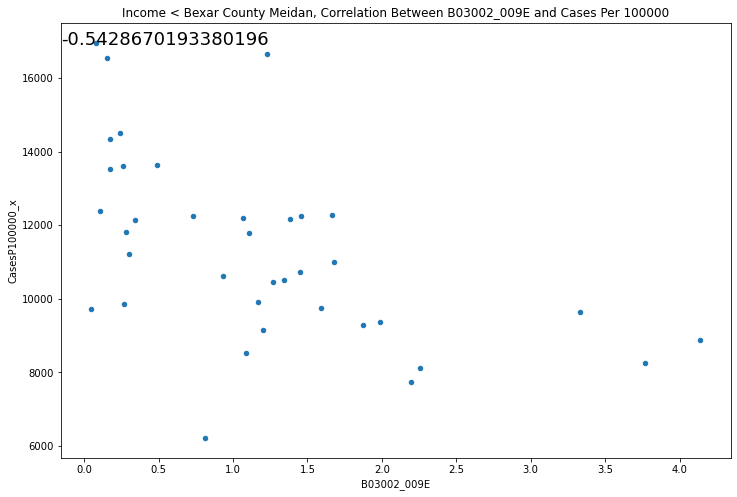

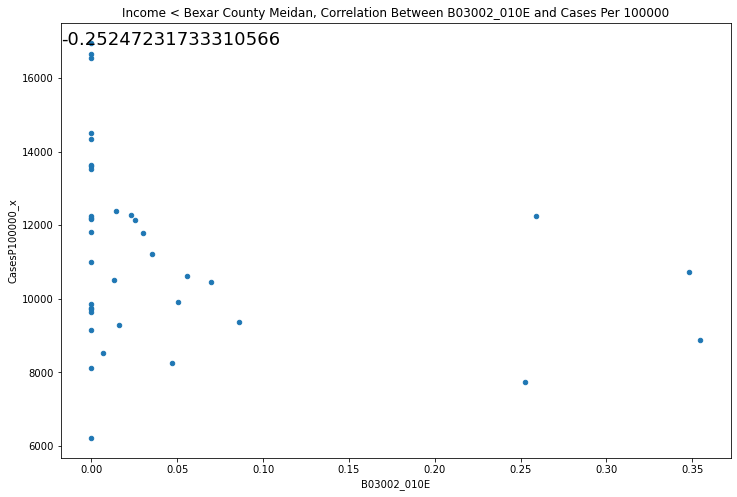

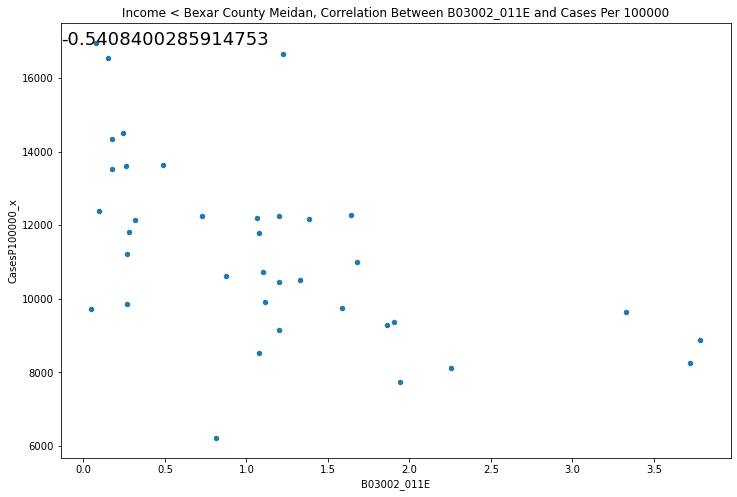

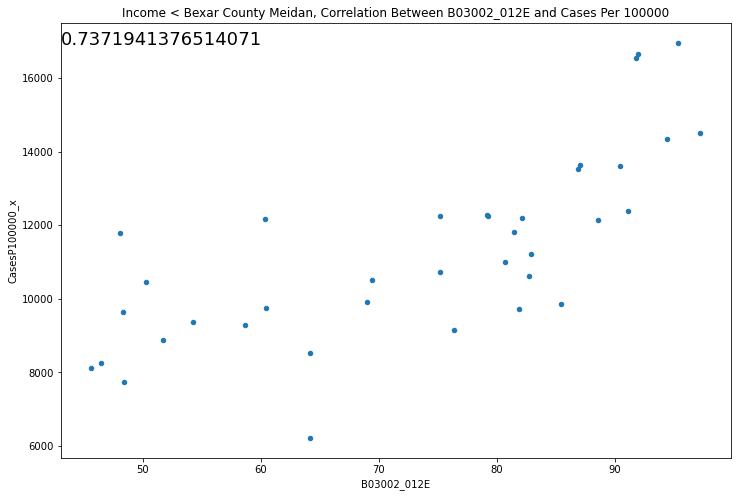

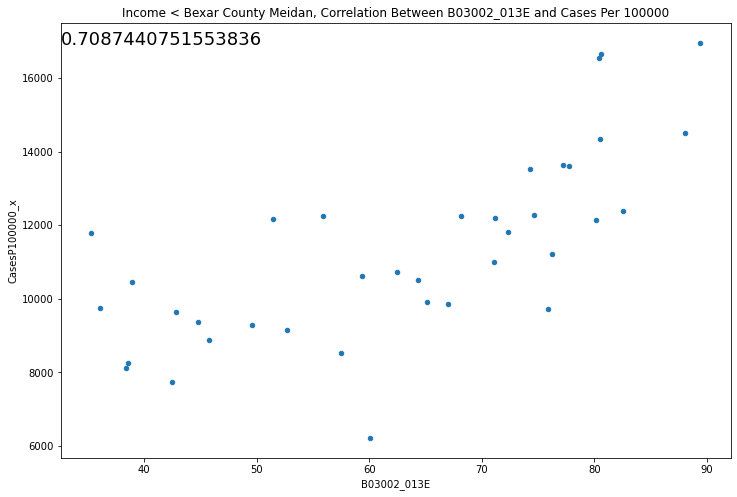

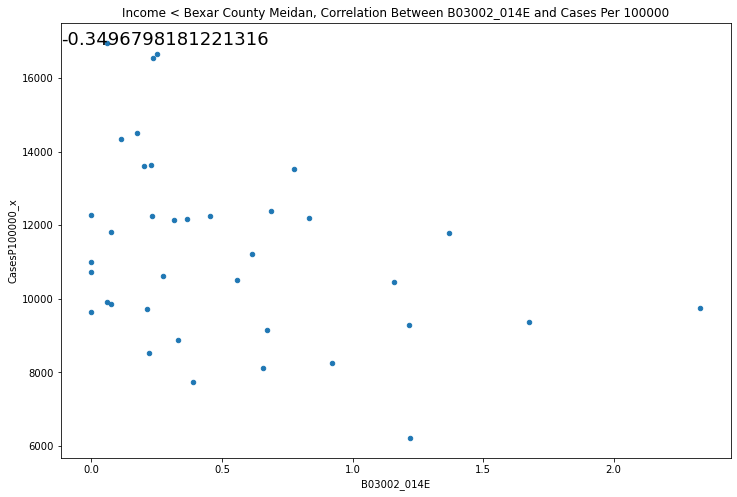

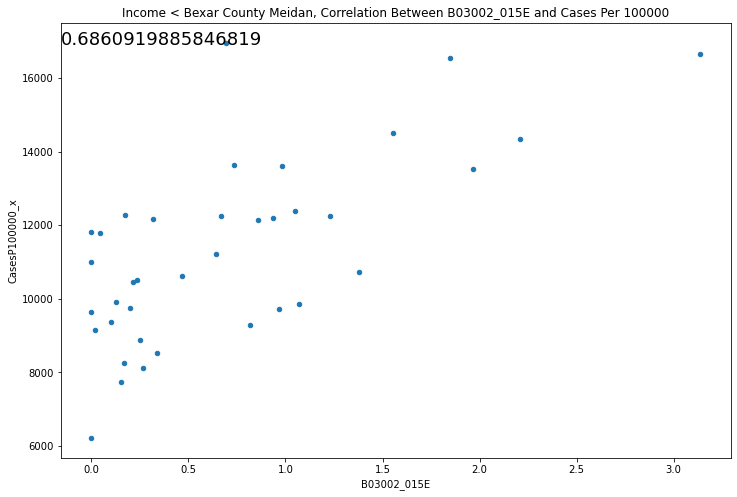

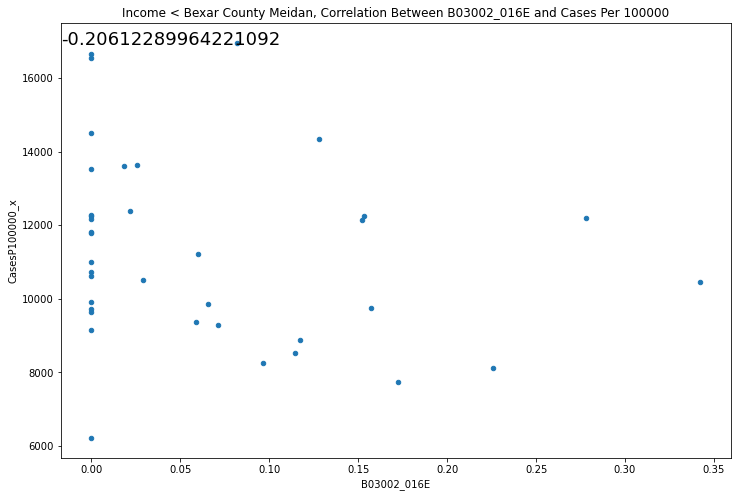

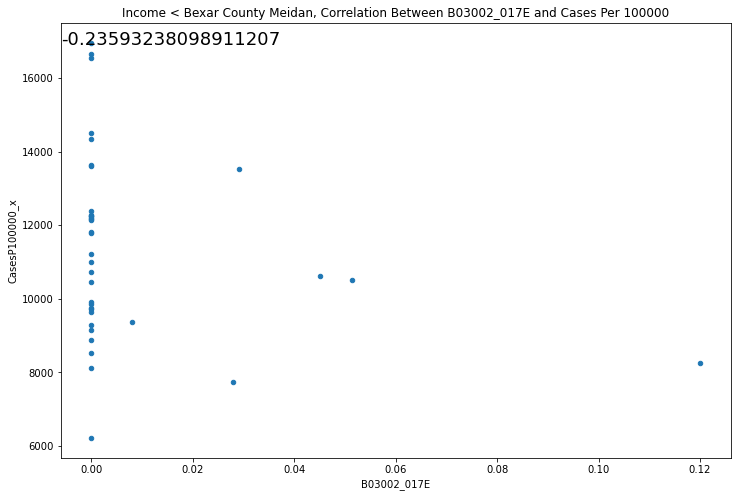

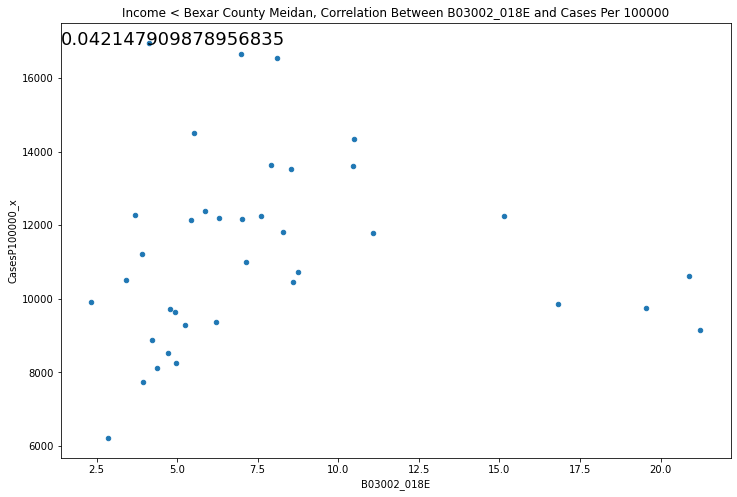

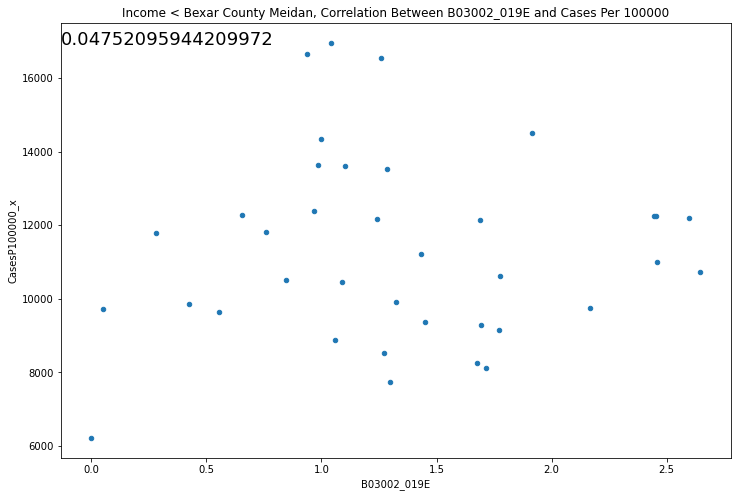

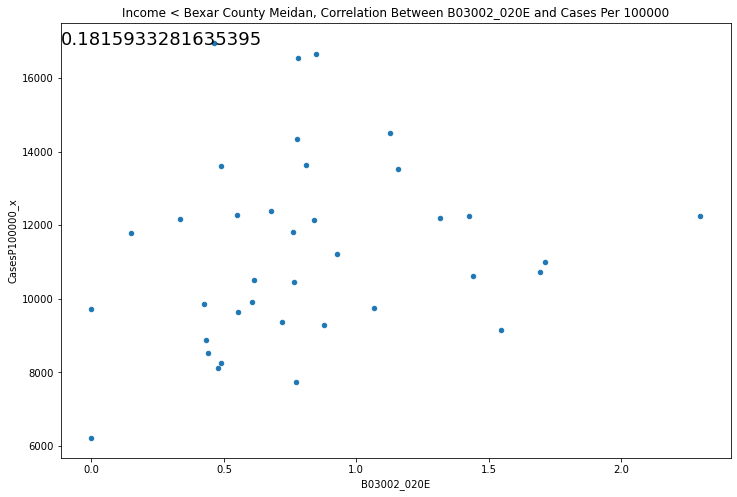

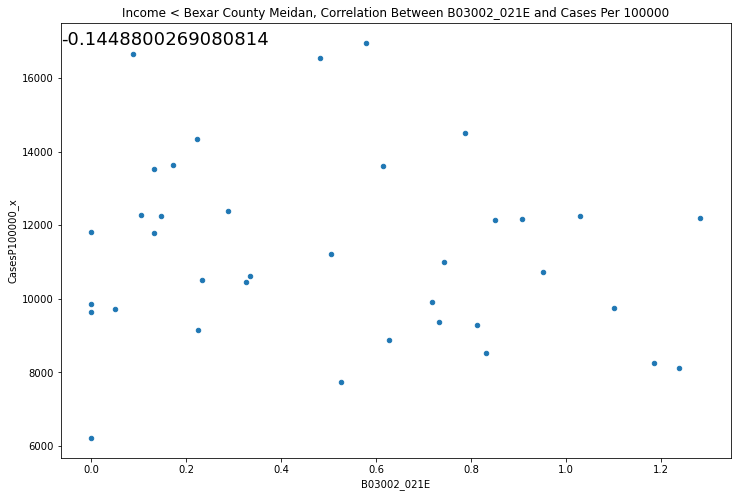

In [26]:
# Plots for zip codes below the median zip code median
for element in hispanic_list:
    ethnicity_belowmedian.plot.scatter(element,"CasesP100000_x", figsize = (12,8),
                                       title=f'Income < Bexar County Meidan, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(ethnicity_belowmedian[element],
                                 ethnicity_belowmedian["CasesP100000_x"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

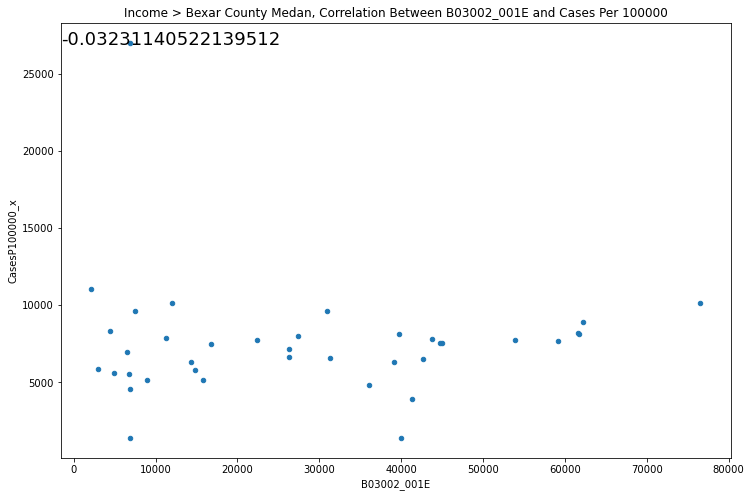

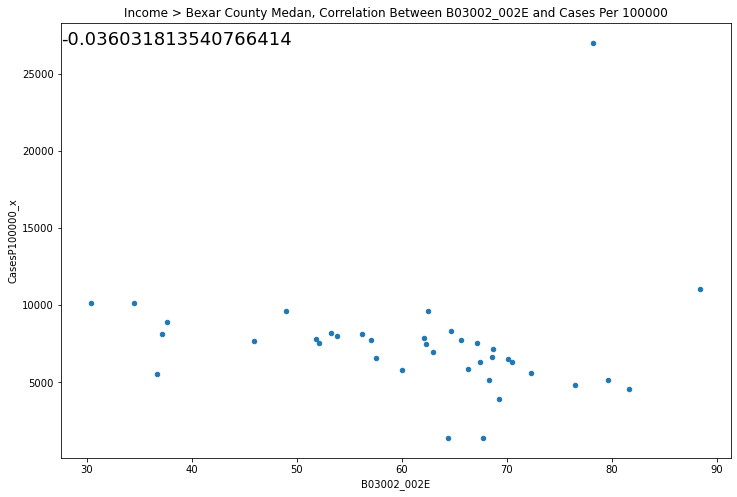

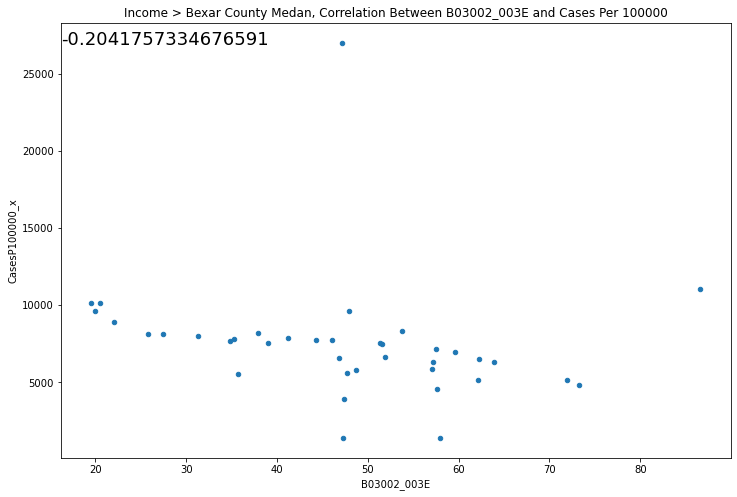

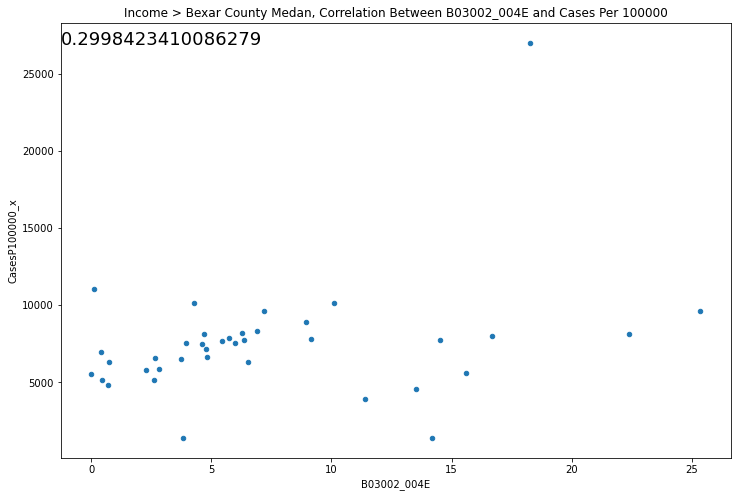

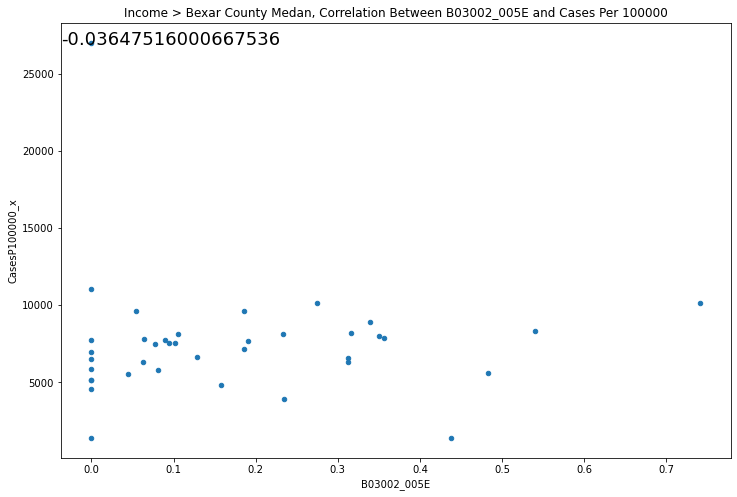

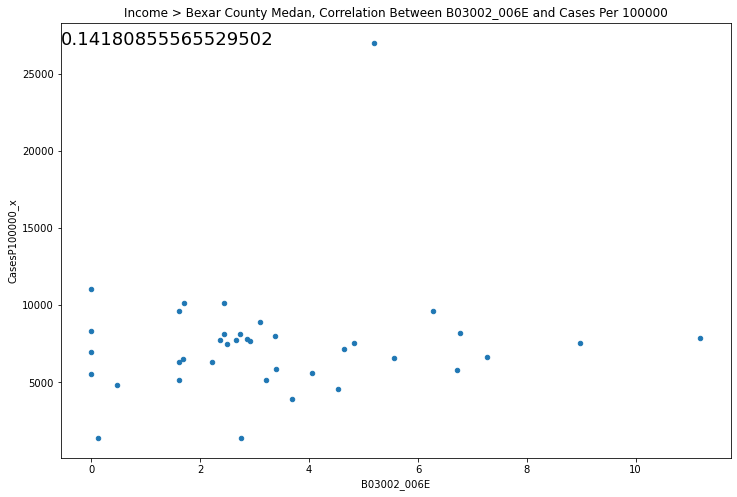

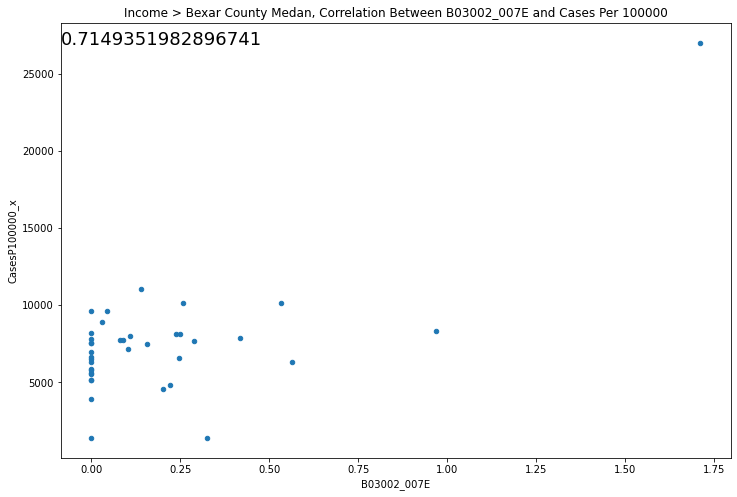

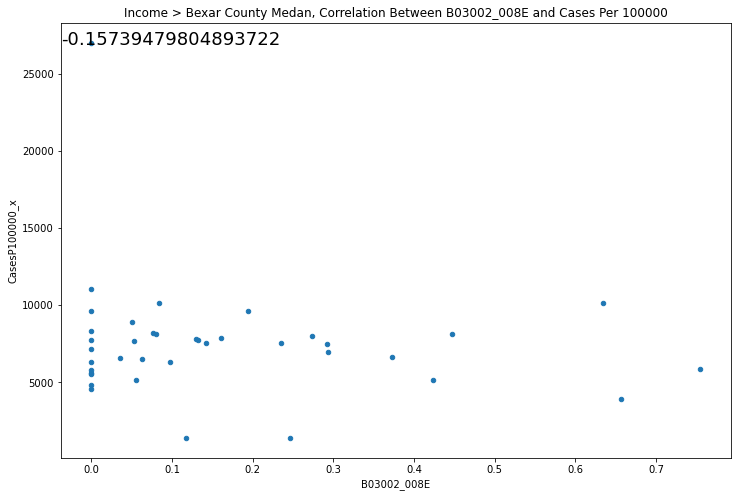

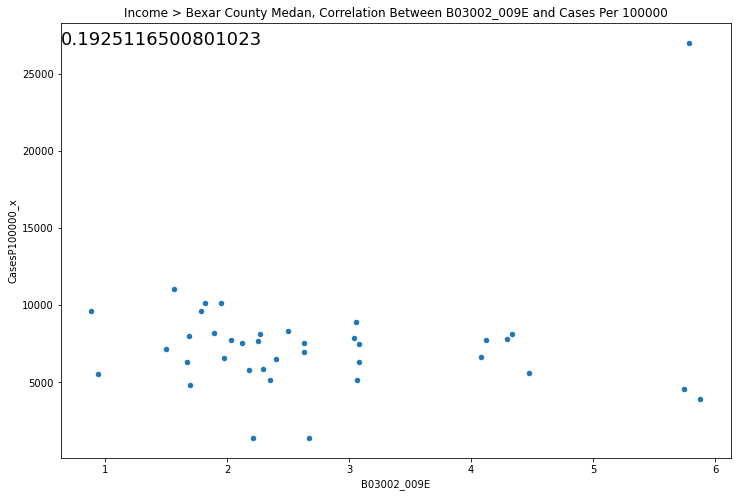

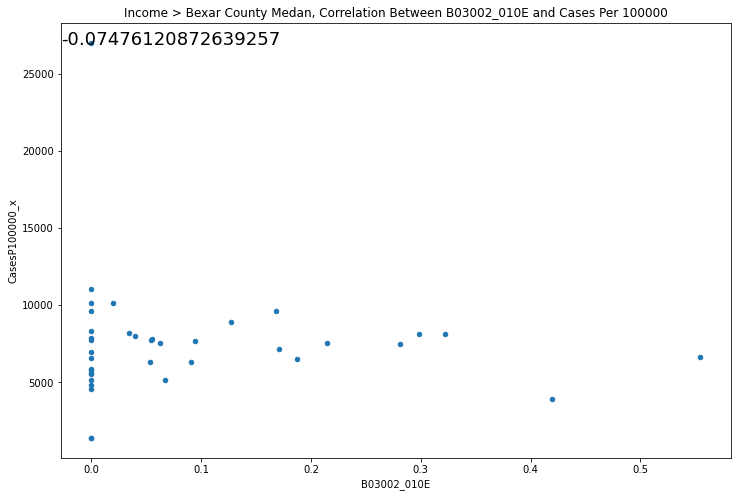

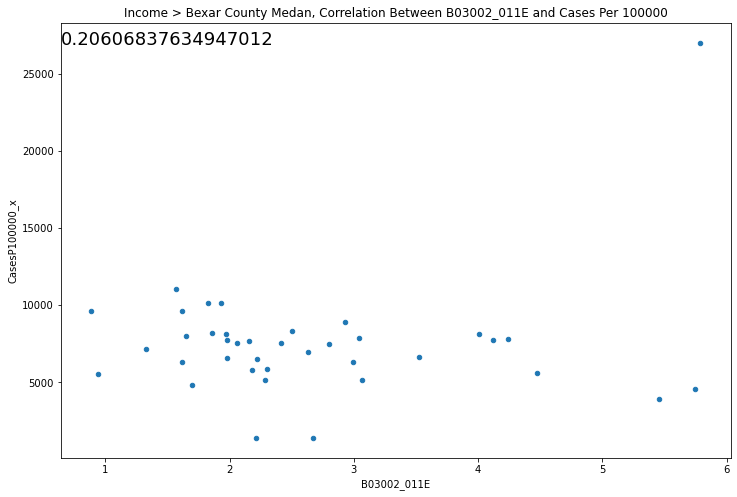

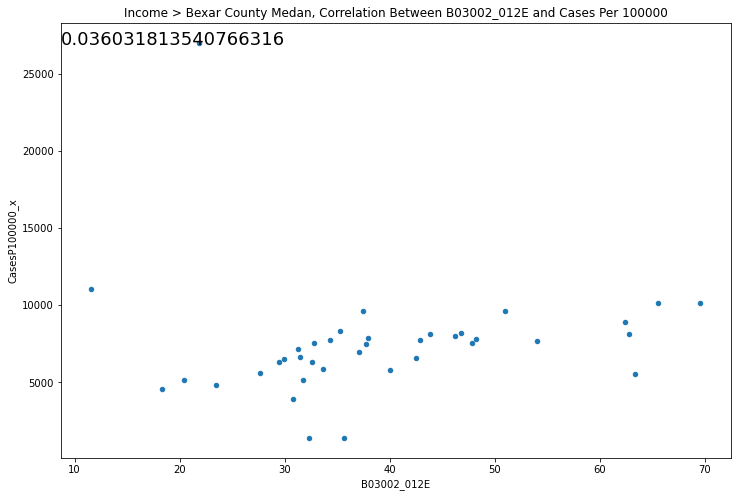

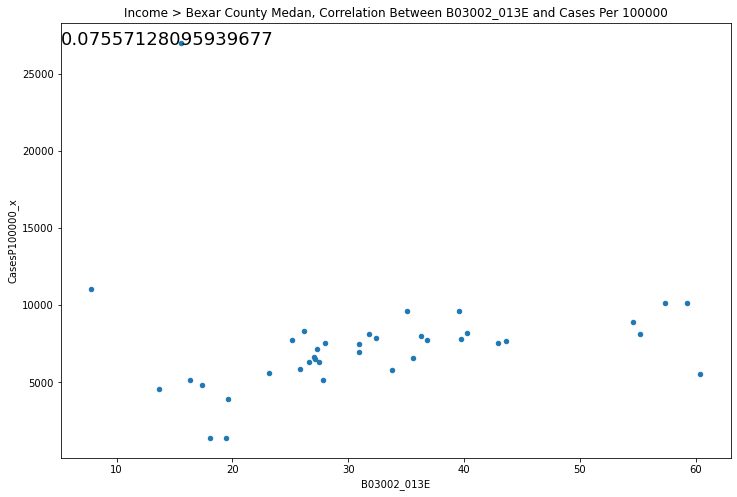

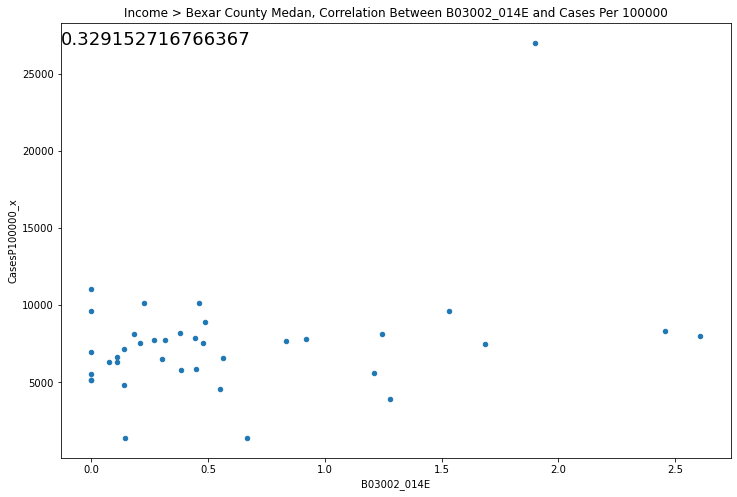

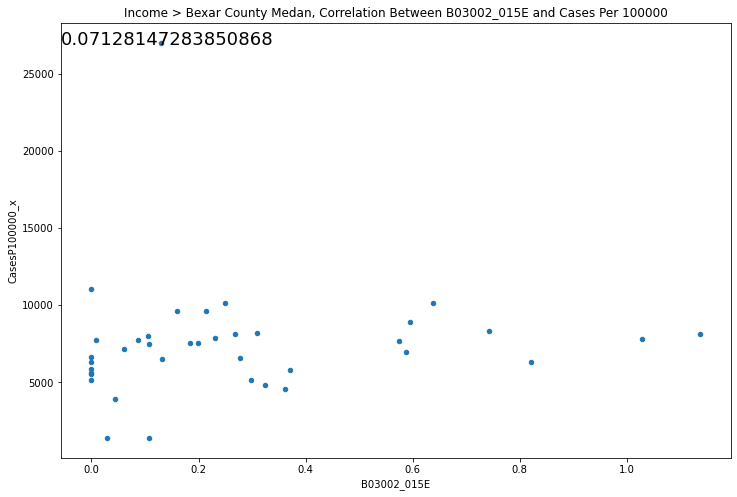

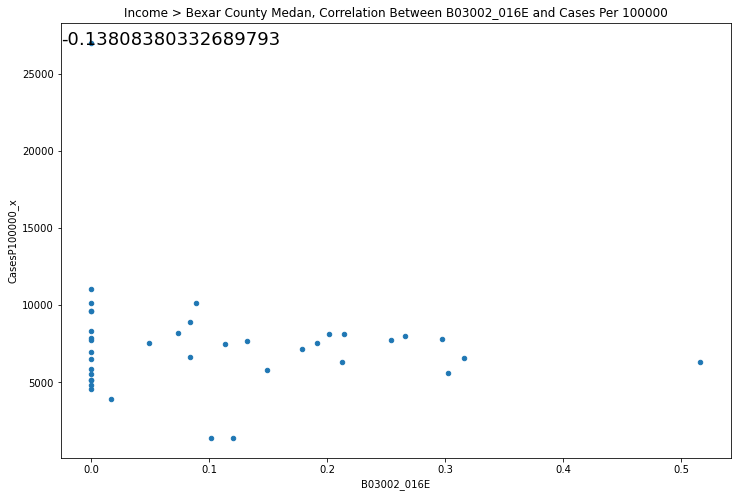

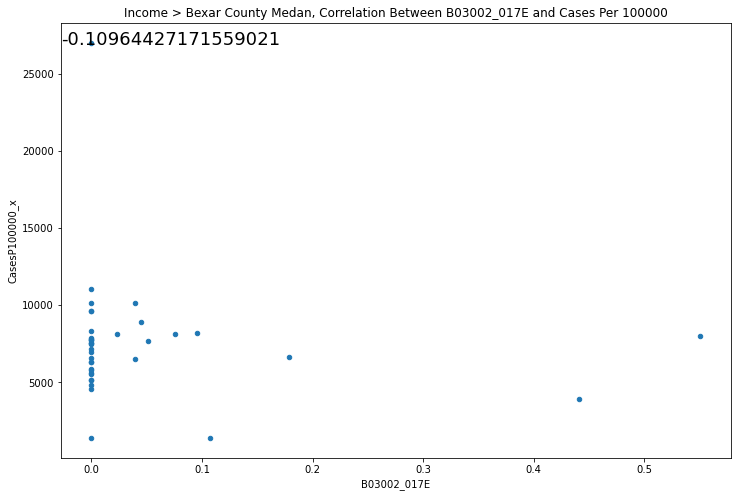

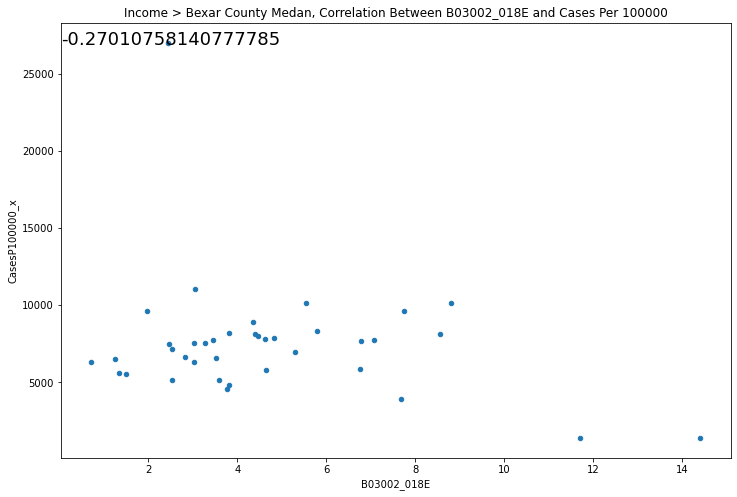

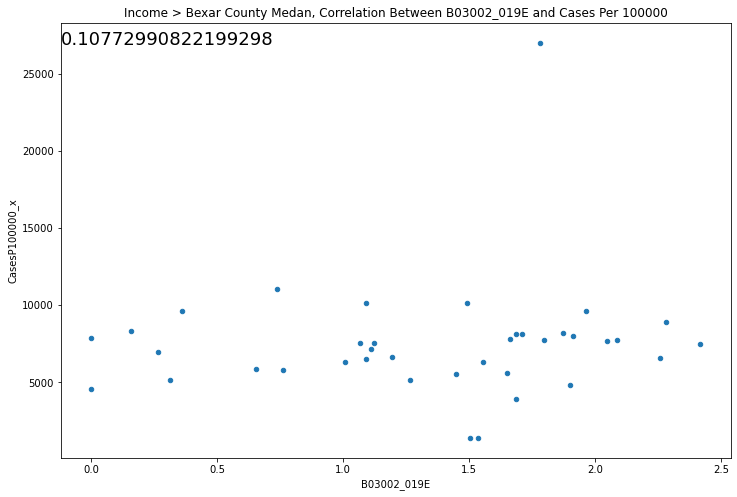

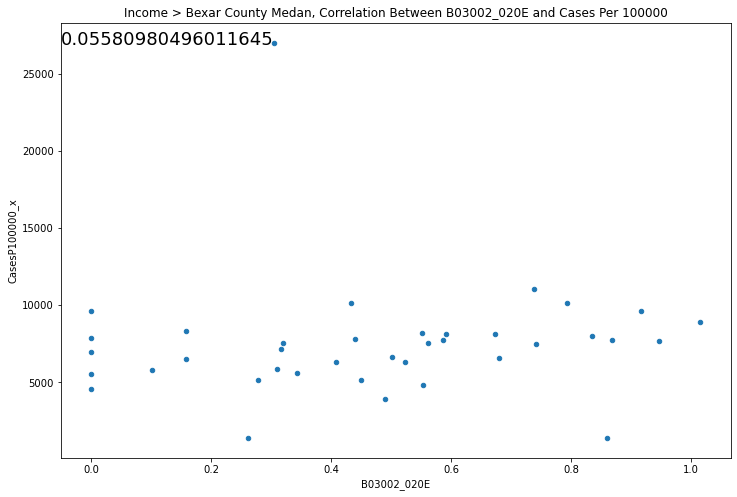

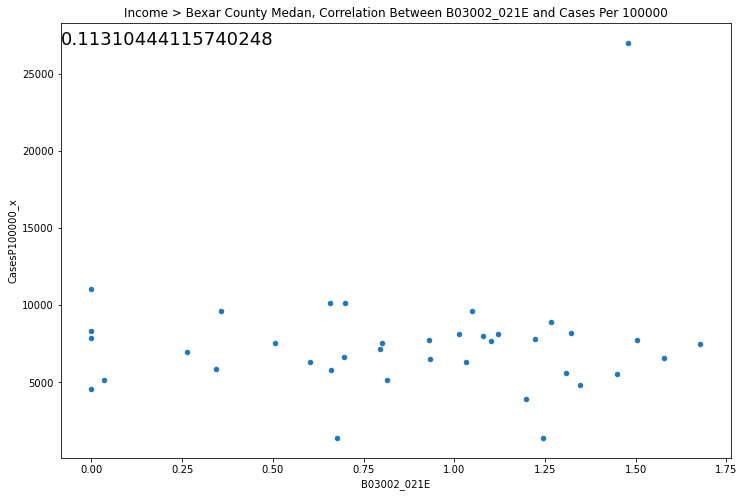

In [27]:
#Scatter plots for zipcodes above median income
for element in hispanic_list:
    ethnicity_abovemedian.plot.scatter(element,"CasesP100000_x", figsize = (12,8),title=f'Income > Bexar County Medan, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(ethnicity_abovemedian[element],
                                 ethnicity_abovemedian["CasesP100000_x"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

### Income data

Text(0, 0.95, '-0.2670487733213377')

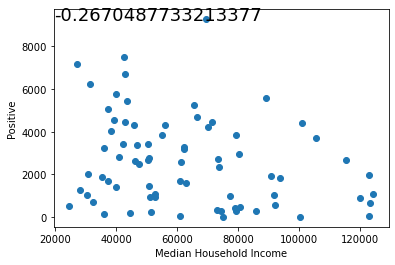

In [28]:
#Determine if there is a corrilation between median household income and positive cases. 
plt.scatter(merge_df.iloc[:,7],merge_df.iloc[:,2])
plt.xlabel('Median Household Income')
plt.ylabel('Positive')
correlation = st.pearsonr(merge_df.iloc[:,7],
                          merge_df.iloc[:,2])
plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

In [29]:
display(merge_df)

ZIP_CODE  populationtotals_totpop_cy  Positive  CasesP100000  ZipInt  \
0      78002                        9061      1063  11816.362830   78002   
1      78006                        5243       278   4851.657941   78006   
2      78015                       12254       664   5167.315175   78015   
3      78023                       29569      1947   6588.163638   78023   
4      78052                         699        39   5555.555556   78052   
..       ...                         ...       ...           ...     ...   
71     78260                       36255      2654   7180.735931   78260   
72     78261                       23828      1836   7514.427209   78261   
73     78263                        5228       428   8302.618817   78263   
74     78264                       13113      1439  10995.644530   78264   
75     78266                        1362        64   4604.316547   78266   

    ActiveCases  ActiveCaseRate  Median Household Income state  
0             6       66.696309                  52598.0    48  
1             3       52.356021                  85813.0    48  
2             7       54.474708                 123182.0    48  
3            15       50.756268                 122967.0    48  
4             3      427.350427                  60880.0    48  
..          ...             ...                      ...   ...  
71           17       45.995671                 115500.0    48  
72           13       53.206729                  93853.0    48  
73            1       19.398642                  78897.0    48  
74           13       99.335218                  50729.0    48  
75            0        0.000000                 122957.0    48  

[75 rows x 9 columns]

In [30]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : -0.27


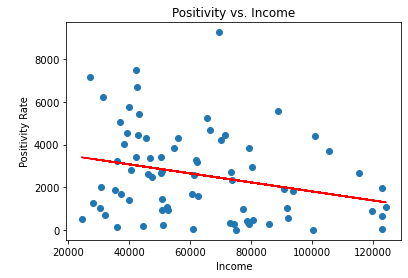

In [31]:
# Call an function #1
equation = linear_agression(merge_df["Median Household Income"], merge_df["Positive"])

# Call an function #2
annotate(equation, 0, 0)

# Set labels
plt.title("Positivity vs. Income")
plt.xlabel("Income")
plt.ylabel("Positivity Rate")

plt.show()

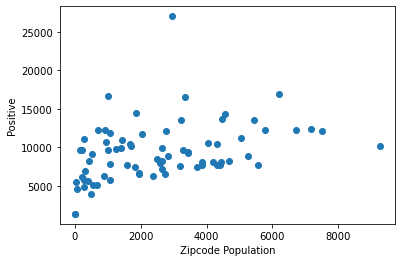

In [32]:
#Determine if there is a corrilation between zipcode population and positive cases. 
plt.scatter(merge_df.iloc[:,2],merge_df.iloc[:,3])
plt.xlabel('Zipcode Population')
plt.ylabel('Positive')
plt.show()

In [33]:
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

The r-squared is : 0.36


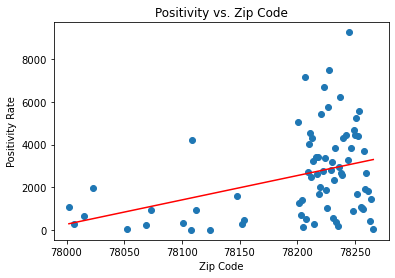

In [34]:
# Call an function #1
equation = linear_agression(merge_df["ZIP_CODE"], merge_df["Positive"])

# Set labels
plt.title("Positivity vs. Zip Code")
plt.xlabel("Zip Code")
plt.ylabel("Positivity Rate")

plt.show()

### Income data filtered by ethnicity

In [35]:
# Left merge onto the filter to split the income data
medianincome_majhf = pd.DataFrame
medianincome_majnhf = pd.DataFrame

medianincome_majhf = pd.merge(majorityhispanic,merge_df, on="ZipInt",how="left")
medianincome_majnhf = pd.merge(majoritynonhispanic,merge_df, on= 'ZipInt', how = 'left')

#drop outlier zipcode 78150, JBSA
medianincome_majnhf = medianincome_majnhf.drop(8)

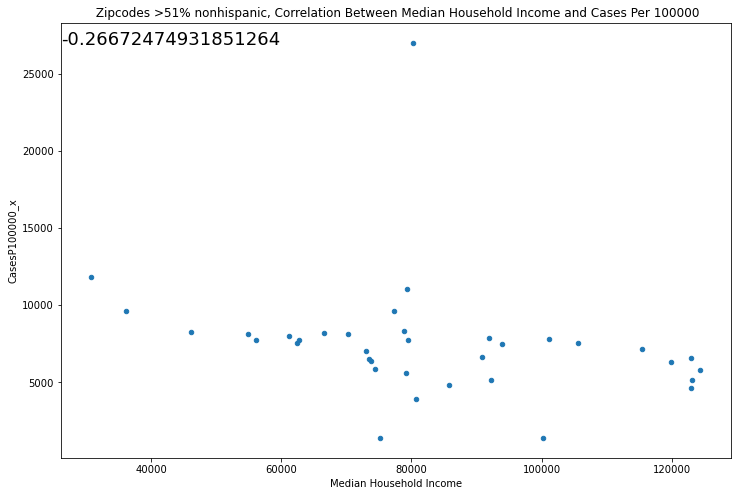

In [36]:
# Scatter plots for majority non hispanic zipcodes
xaxis =["Median Household Income"]
for element in xaxis:
    medianincome_majnhf.plot.scatter(element,"CasesP100000_x", figsize = (12,8),
                                     title=f' Zipcodes >51% nonhispanic, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(medianincome_majnhf[element],
                                 medianincome_majnhf["CasesP100000_x"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

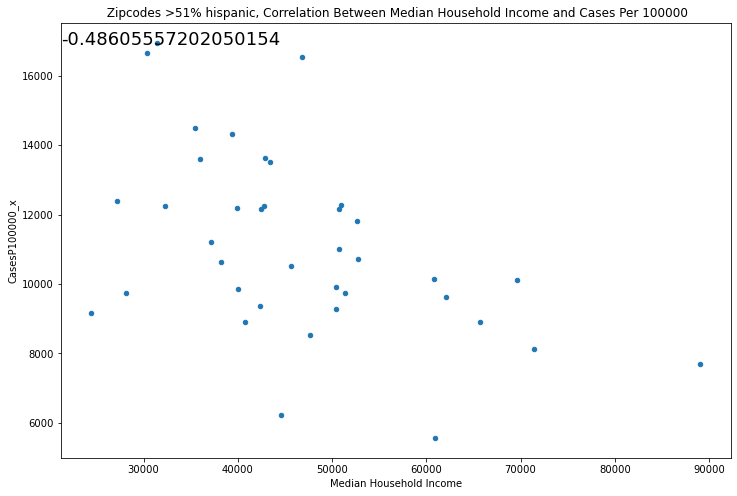

In [37]:
# Scatter plots for majority hispanic zipcodes
xaxis =["Median Household Income"]
for element in xaxis:
    medianincome_majhf.plot.scatter(element,"CasesP100000_x", figsize = (12,8),title=f' Zipcodes >51% hispanic, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(medianincome_majhf[element],
                                 medianincome_majhf["CasesP100000_x"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

### Age data

In [38]:
age_list =["Total Male", "Total Female", "Male : Under 5 Years", "Female : Under 5 Years", "Male : 5 to 9 Years", "Female : 5 to 9 Years",
            "Male : 10 to 14 Years", "Female : 10 to 14 Years", "Male : 15 to 17 Years", "Female : 15 to 17 Years", "Male : 18 and 19 Years", "Female : 18 and 19 Years",
            "Male : 20 Years", "Female : 20 Years", "Male : 21 Years", "Female : 21 Years", "Male : 22 to 24 Years",
            "Female : 22 to 24 Years", "Male : 25 to 29 Years", "Female : 25 to 29 Years", "Male : 30 to 34 Years",
            "Female : 30 to 34 Years", "Male : 35 to 39 Years", "Female : 35 to 39 Years", "Male : 40 to 44 Years",
            "Female : 40 to 44 Years", "Male : 45 to 49 Years", "Female : 45 to 49 Years", "Male : 50 to 54 Years",
            "Female : 50 to 54 Years", "Male : 55 to 59 Years", "Female : 55 to 59 Years", "Male : 60 and 61 Years",
             "Female : 60 to 61 Years", "Male : 62 to 64 Years", "Female : 62 to 64 Years", "Male : 65 and 66 Years",
            "Female : 65 and 66 Years", "Male : 67 to 69 Years", "Female : 67 to 69 Years", "Male : 70 to 74 Years",
            "Female : 70 to 74 Years", "Male : 75 to 79 Years", "Female : 75 to 79 Years", "Male : 80 to 84 Years",
            "Female : 80 to 84 Years", "Male : 85 Years and Over", "Female : 85 Years and Over"]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


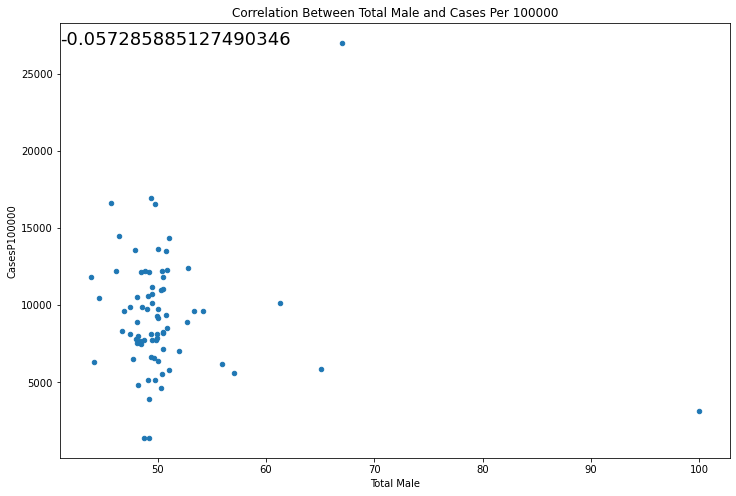

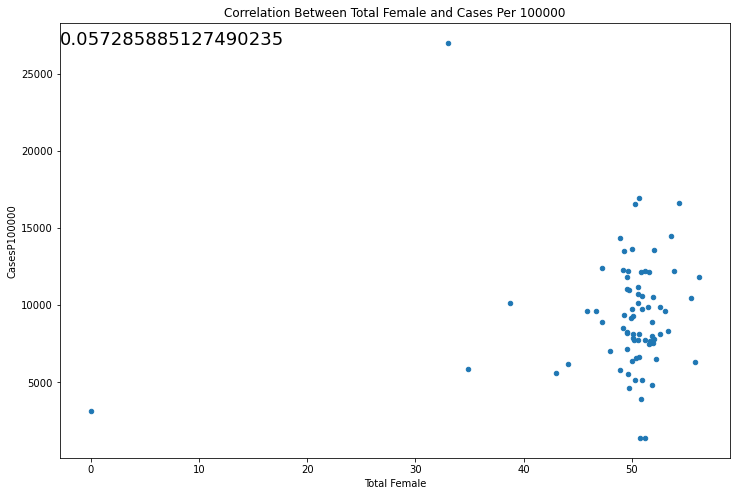

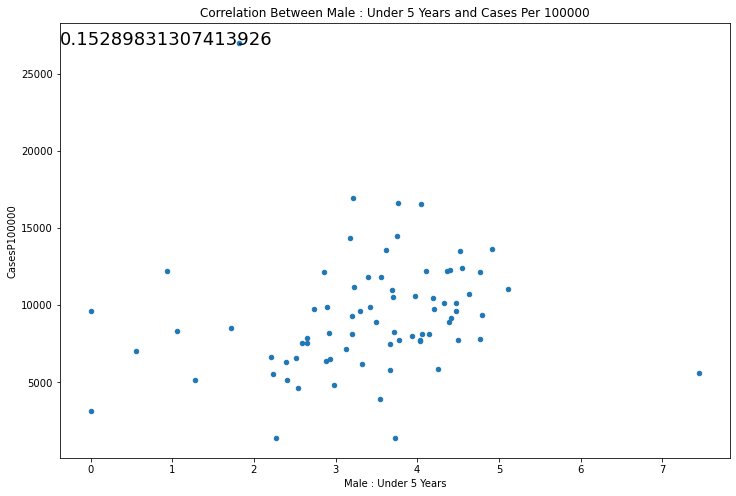

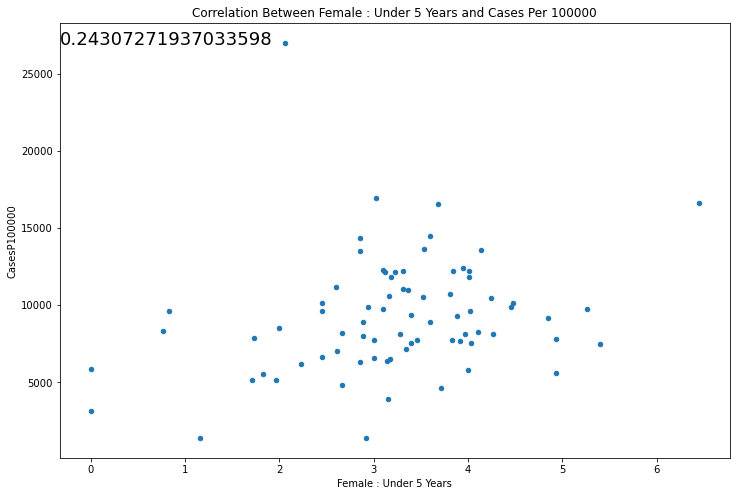

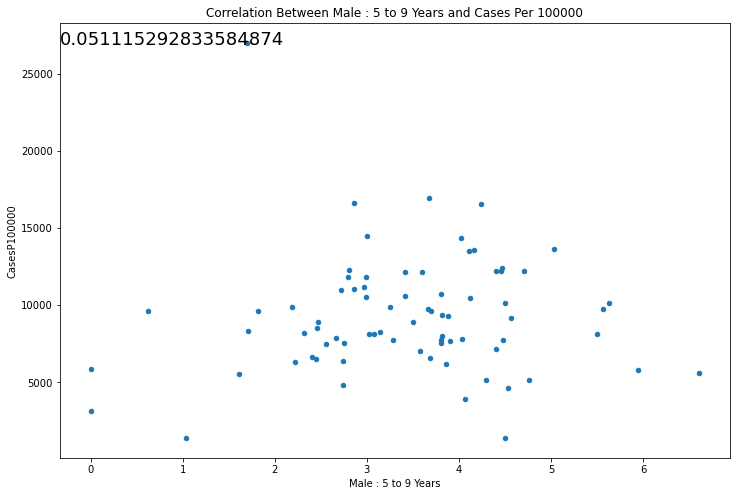

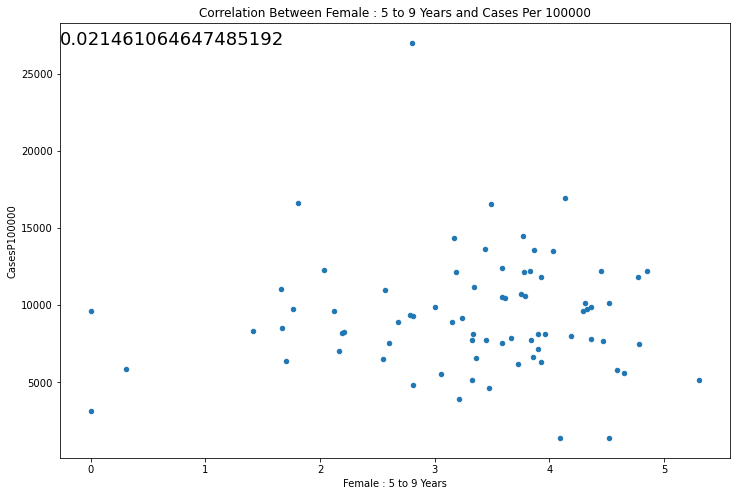

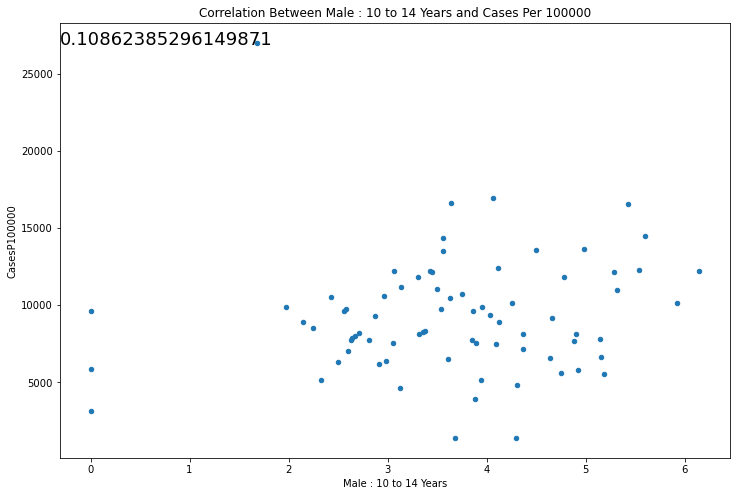

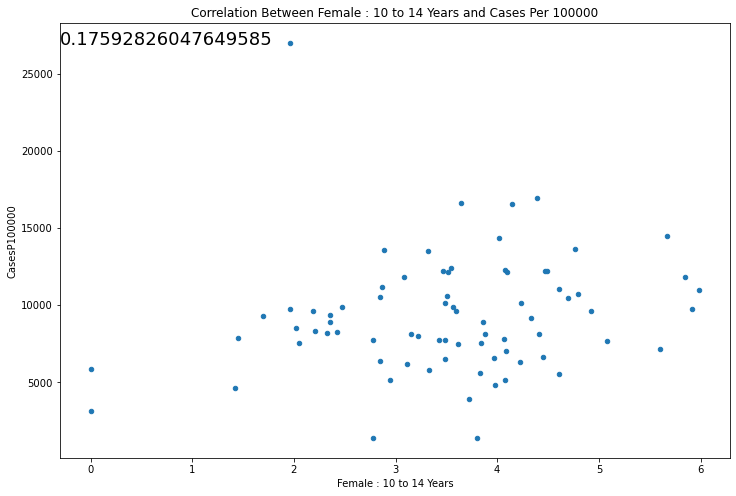

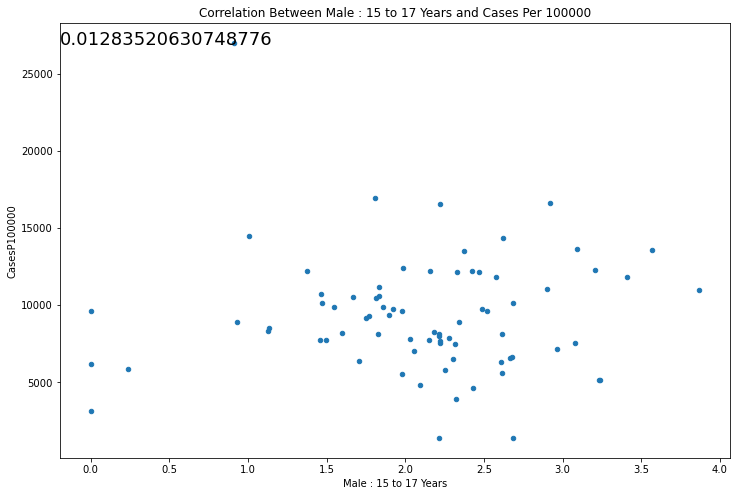

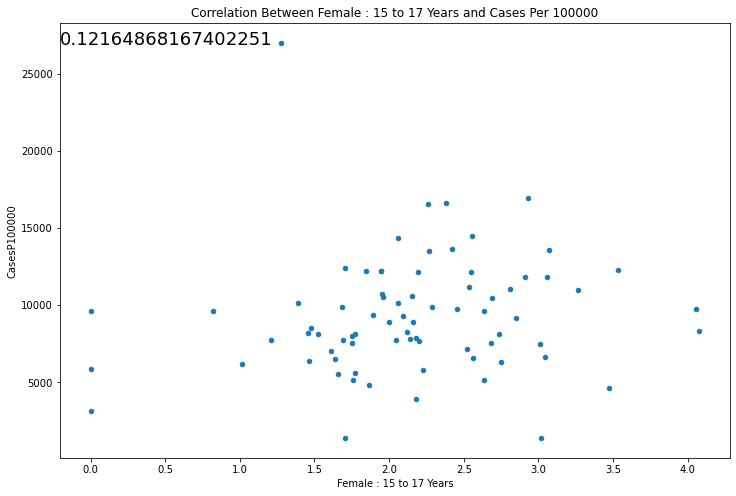

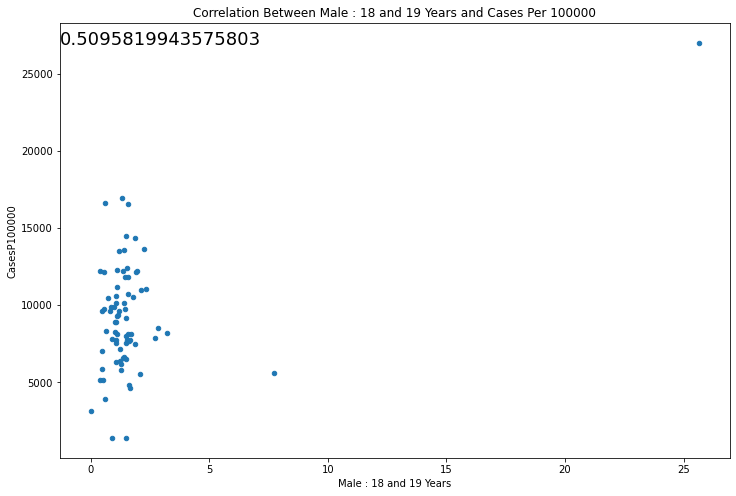

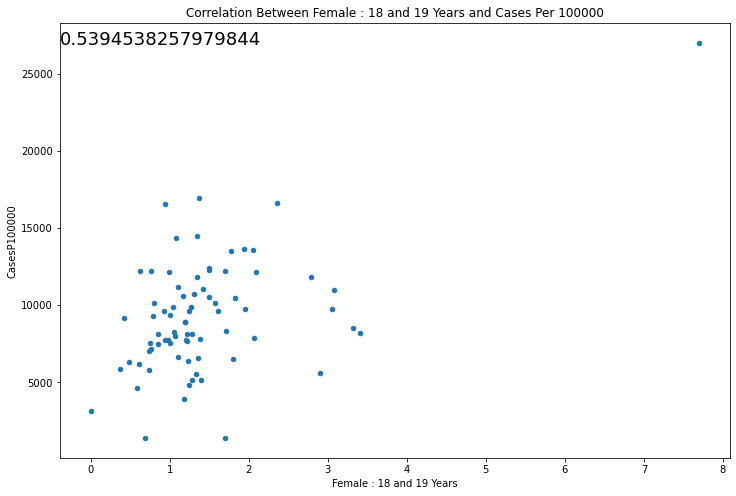

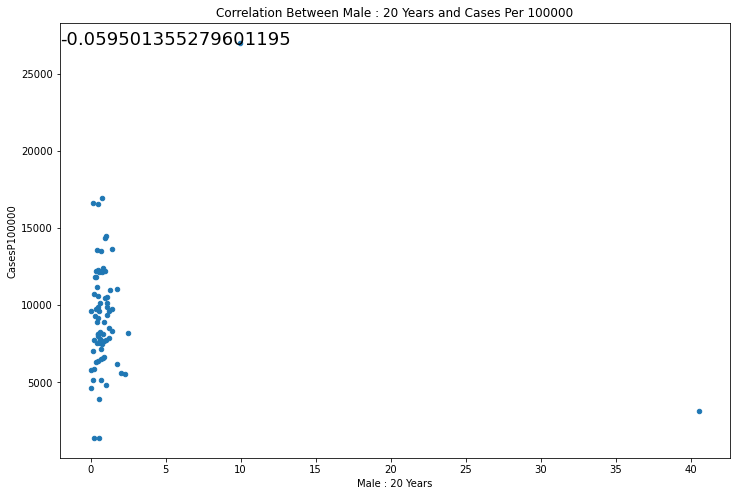

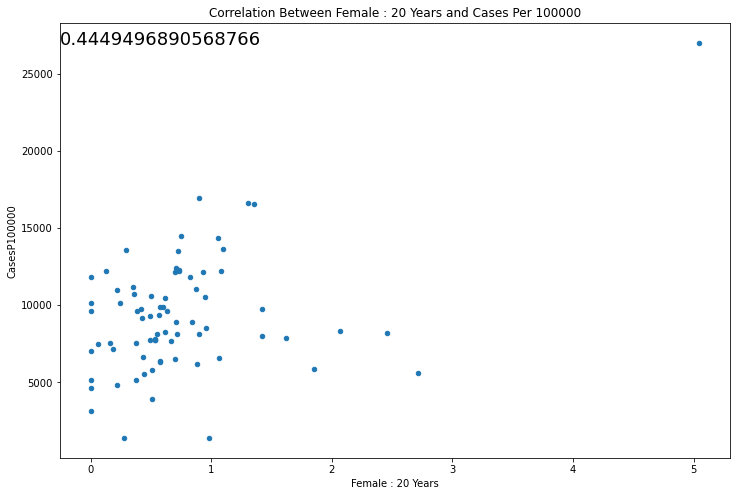

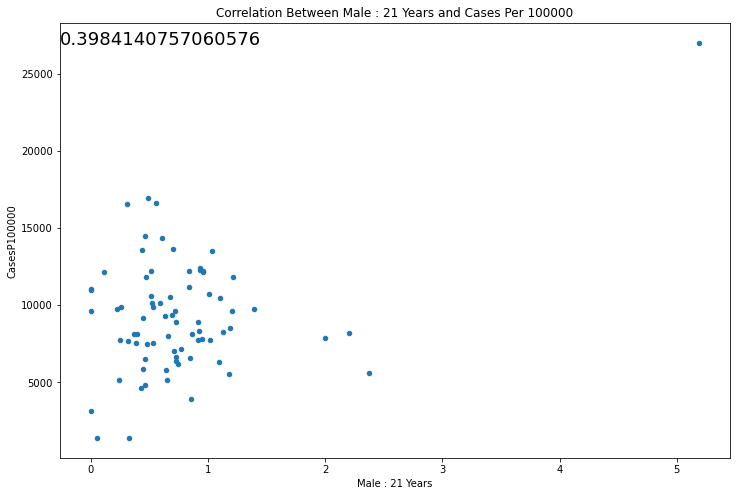

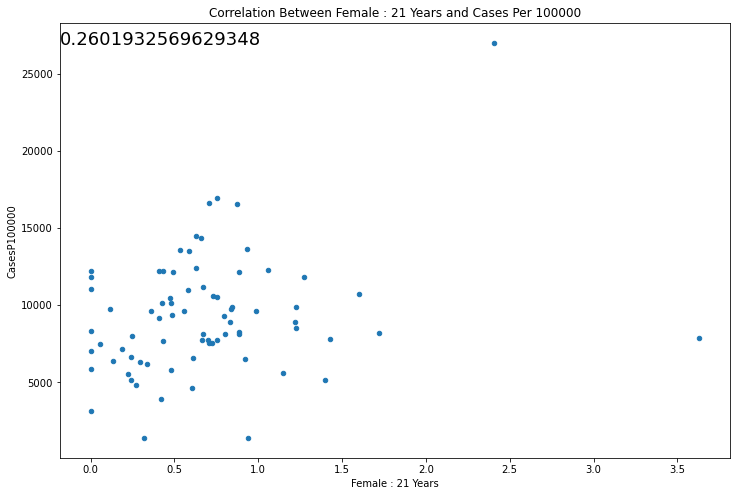

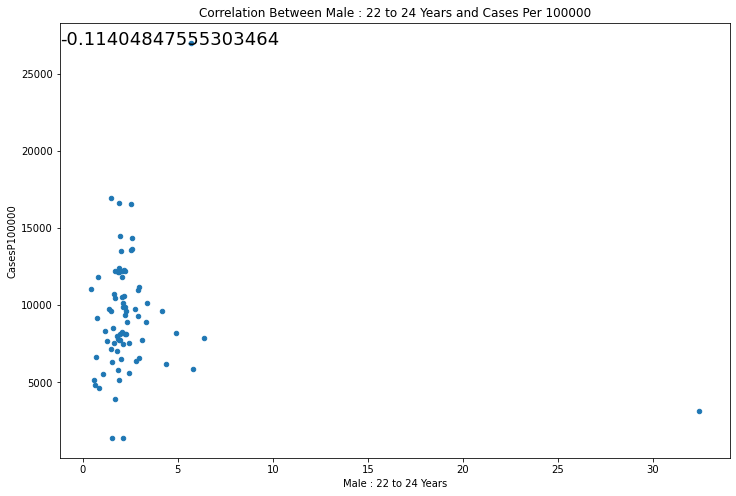

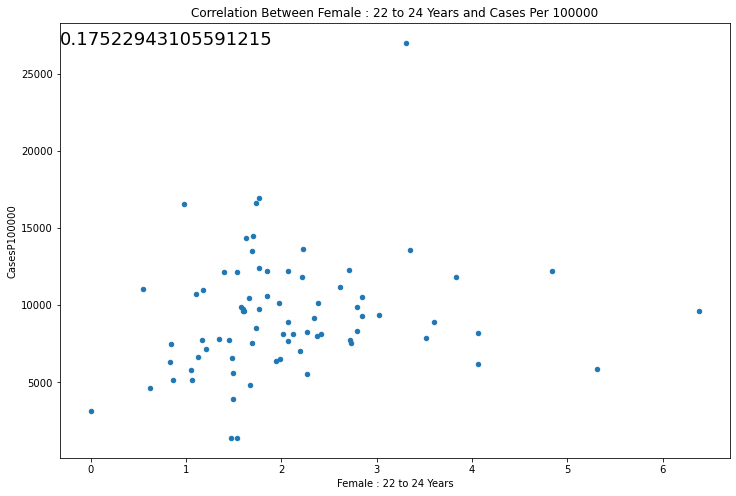

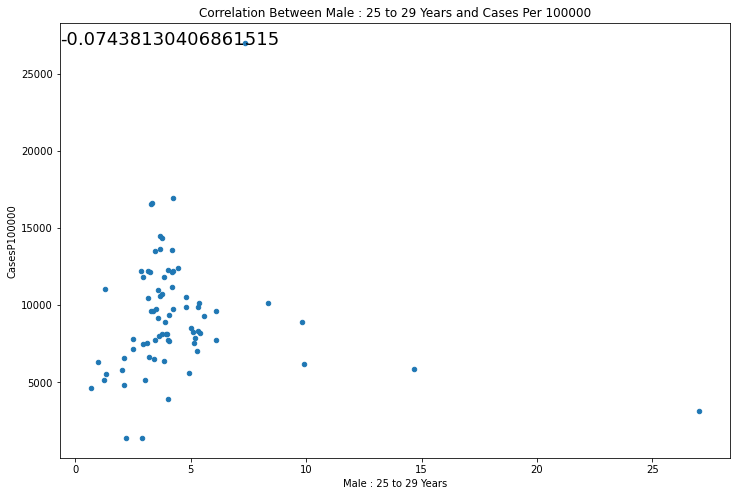

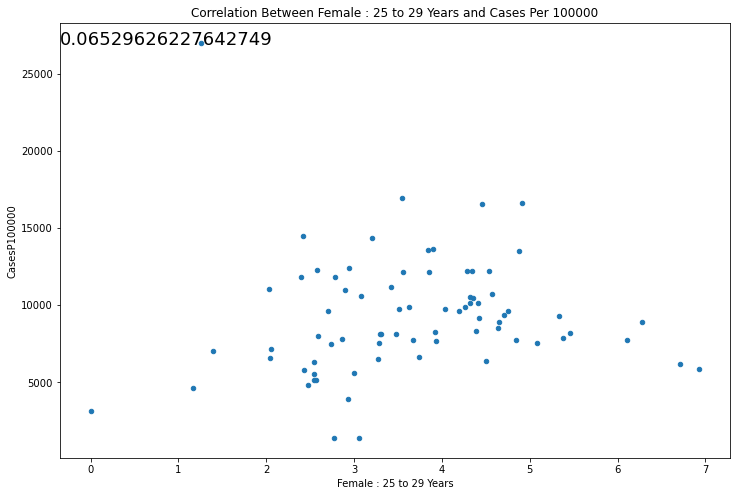

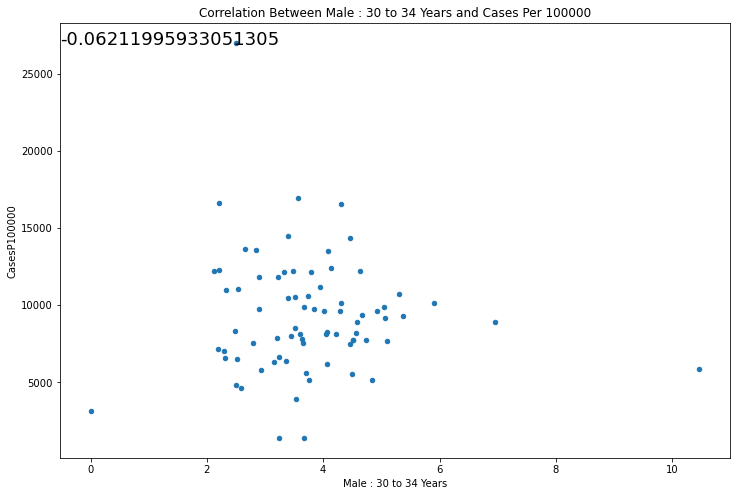

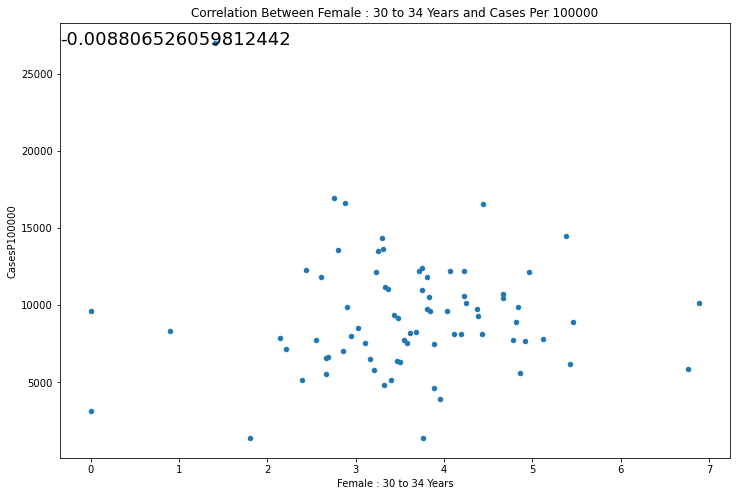

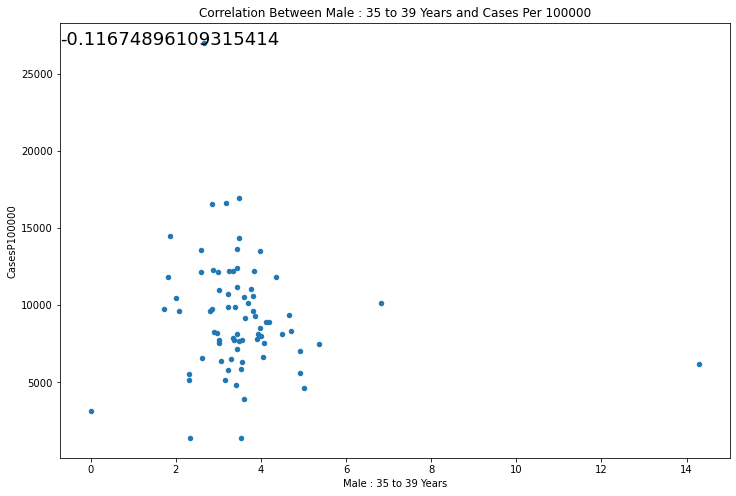

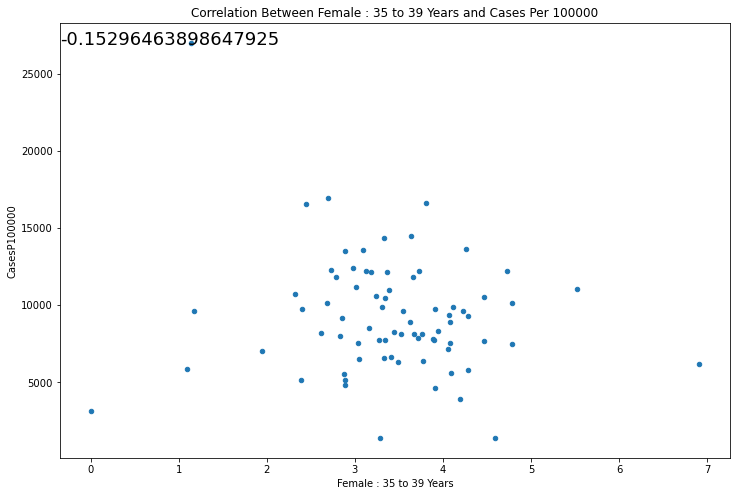

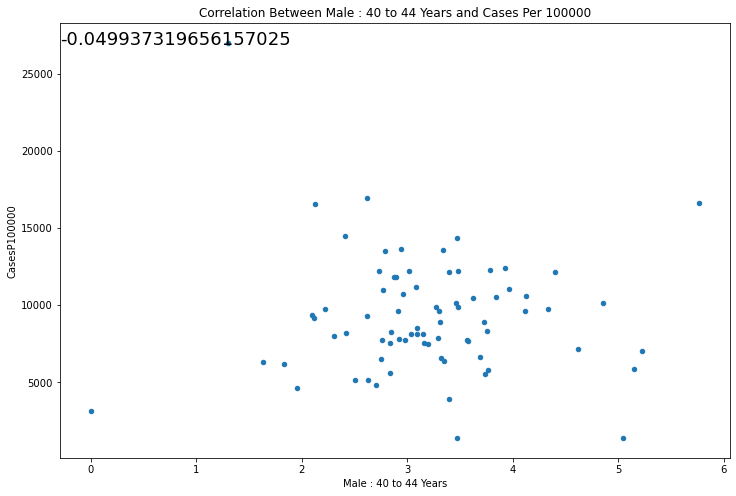

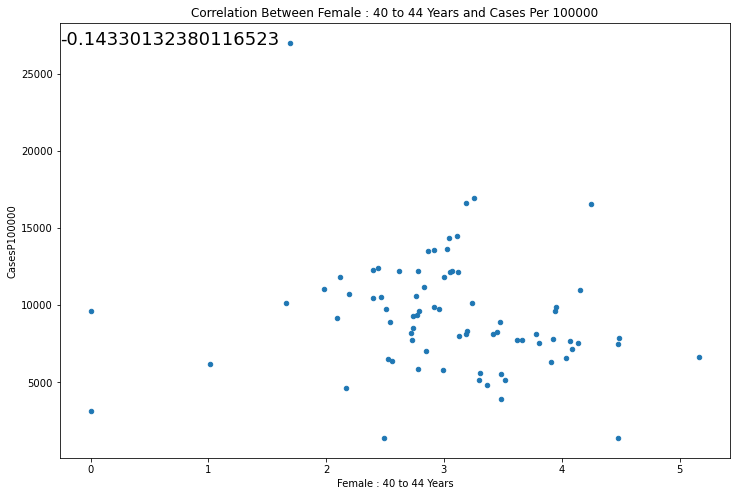

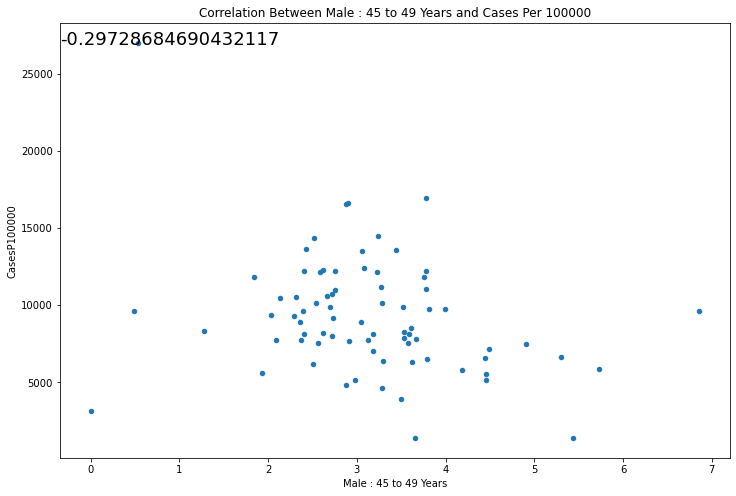

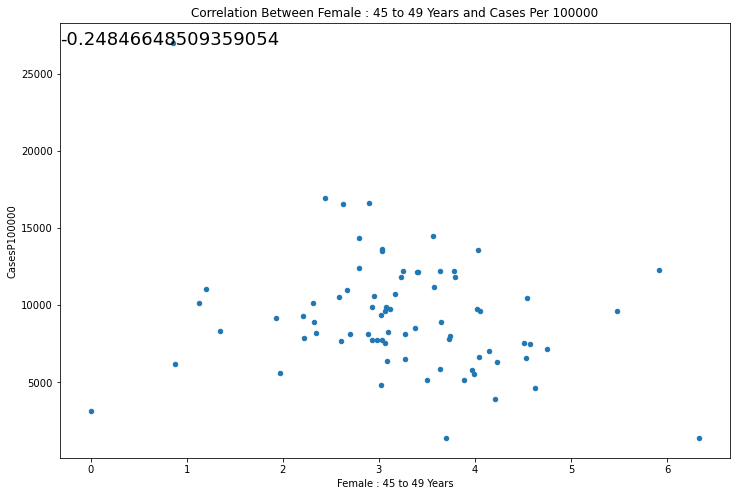

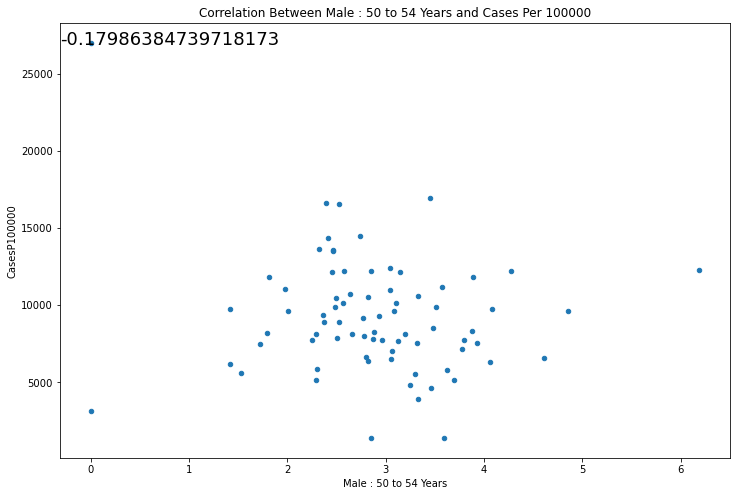

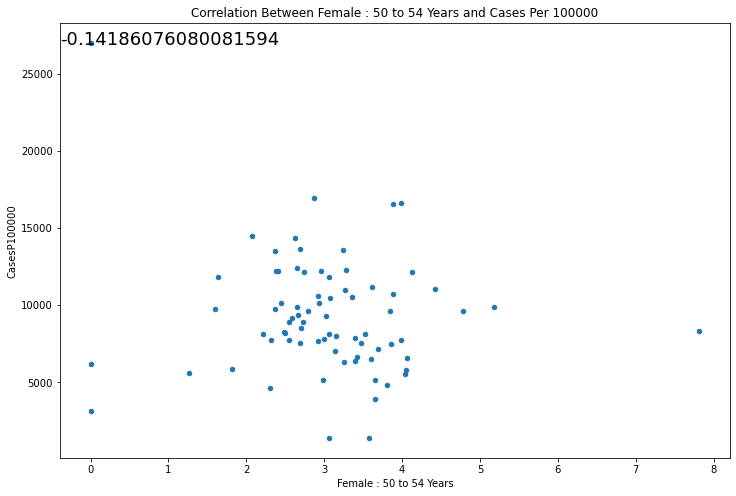

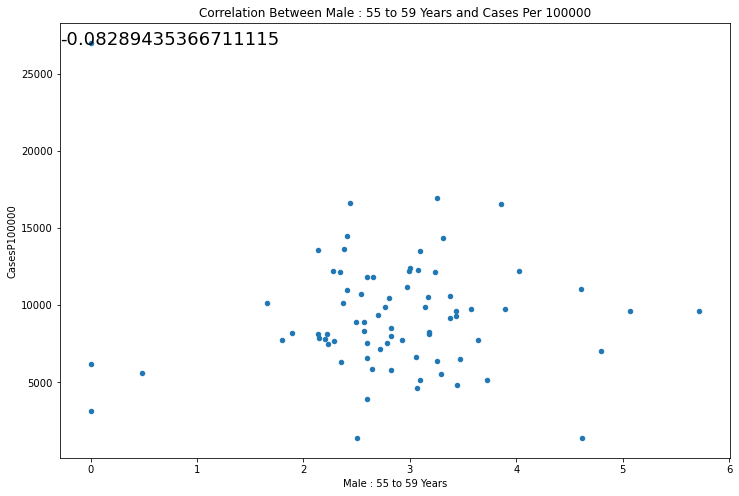

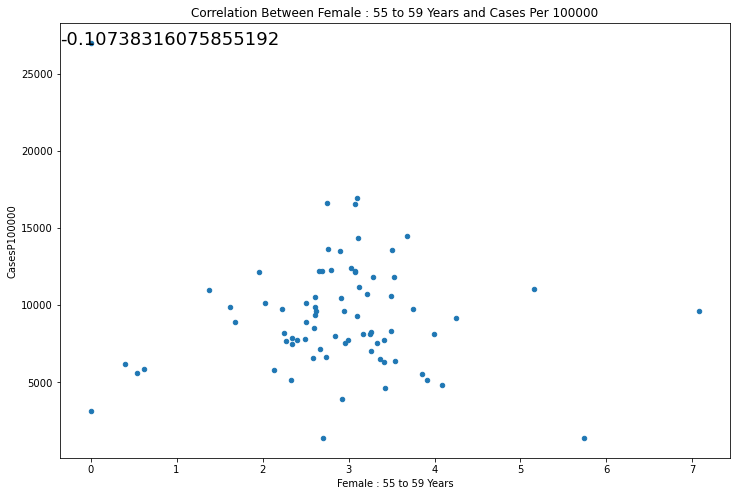

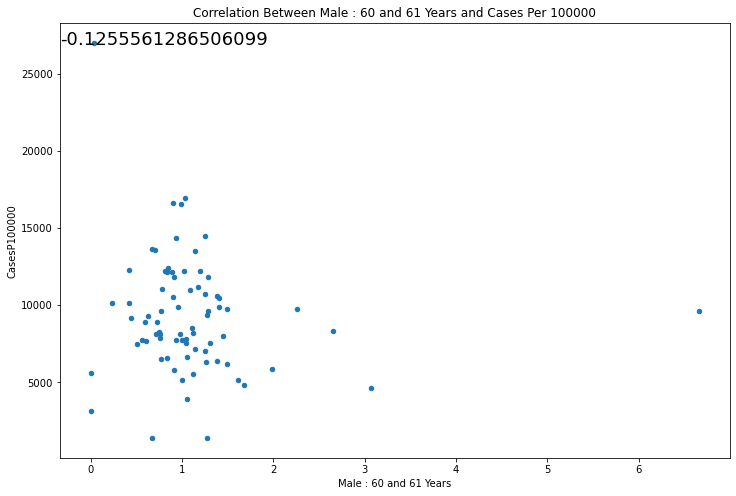

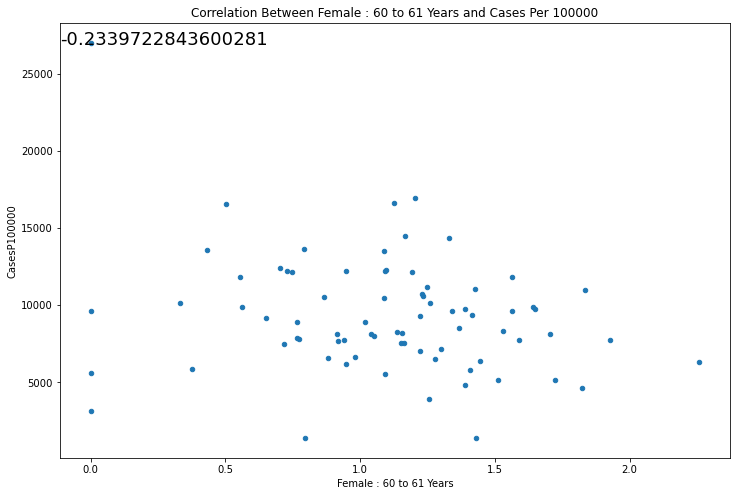

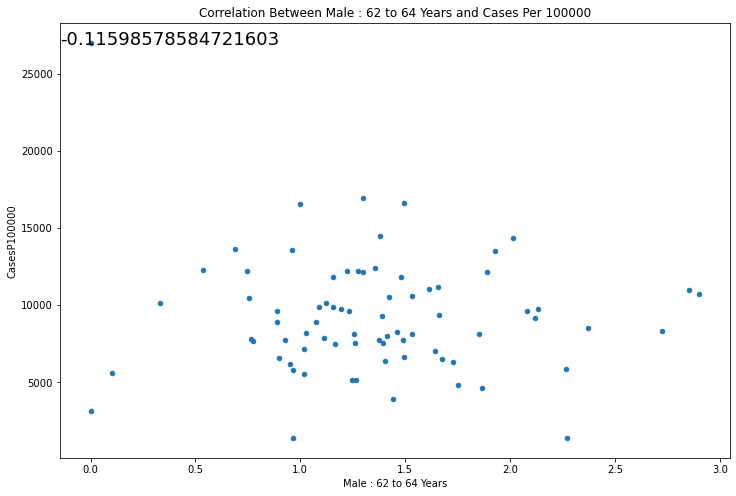

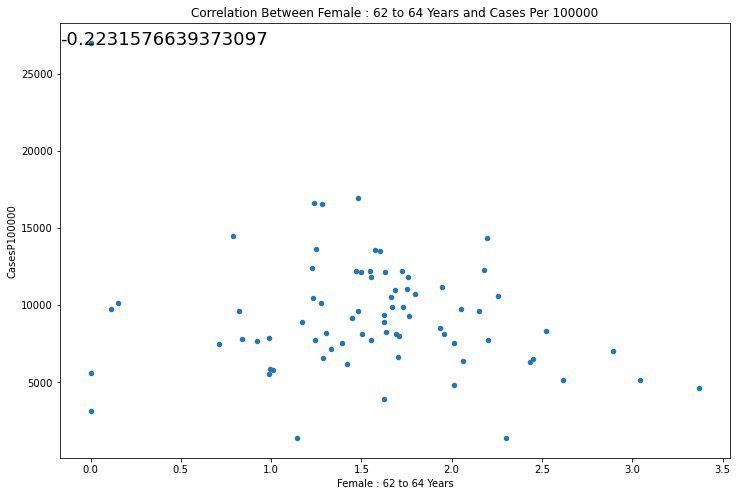

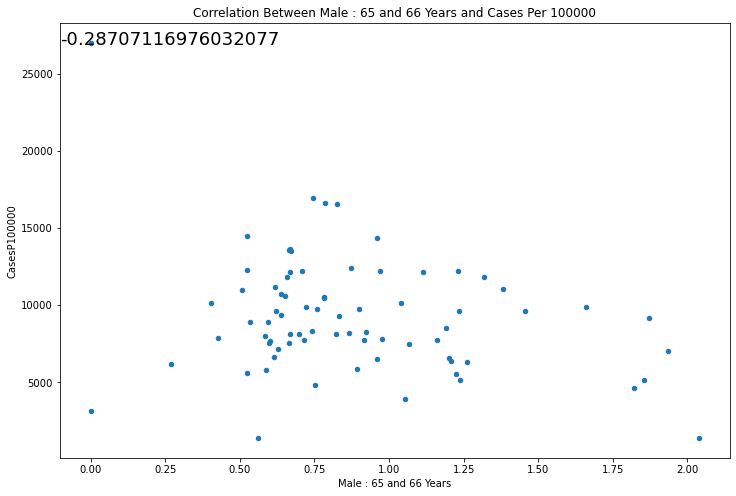

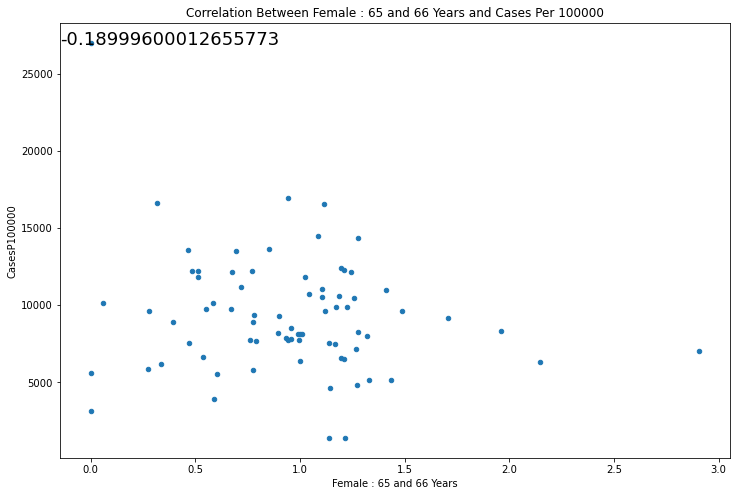

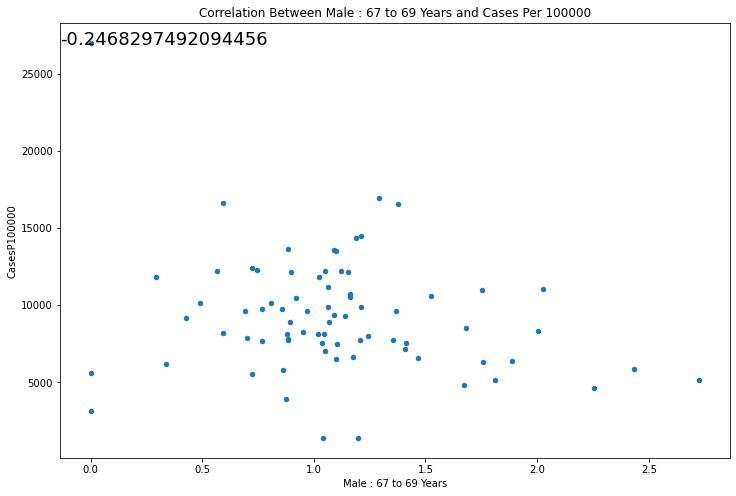

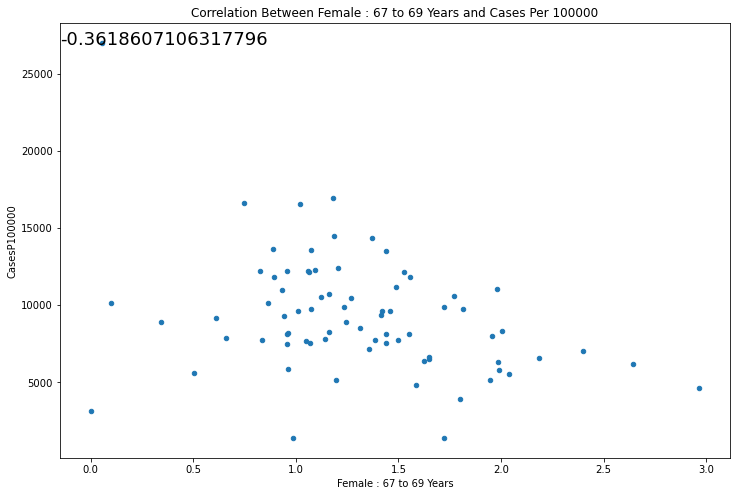

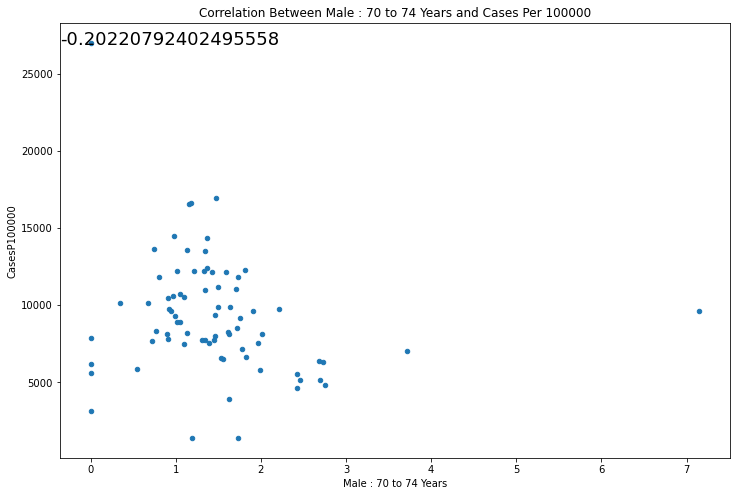

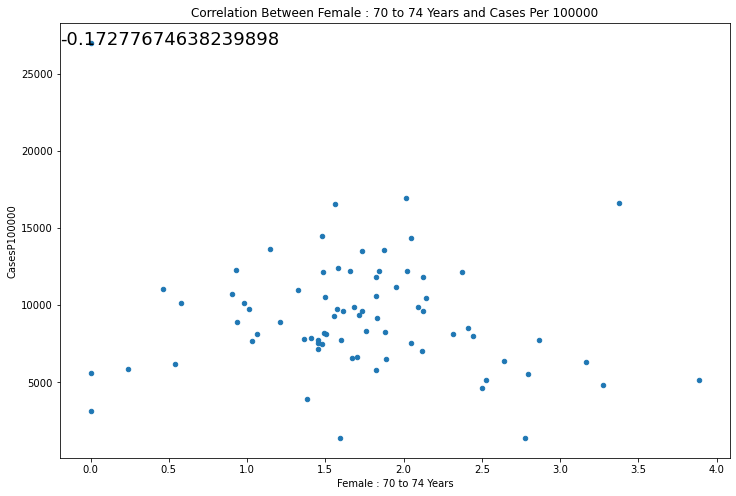

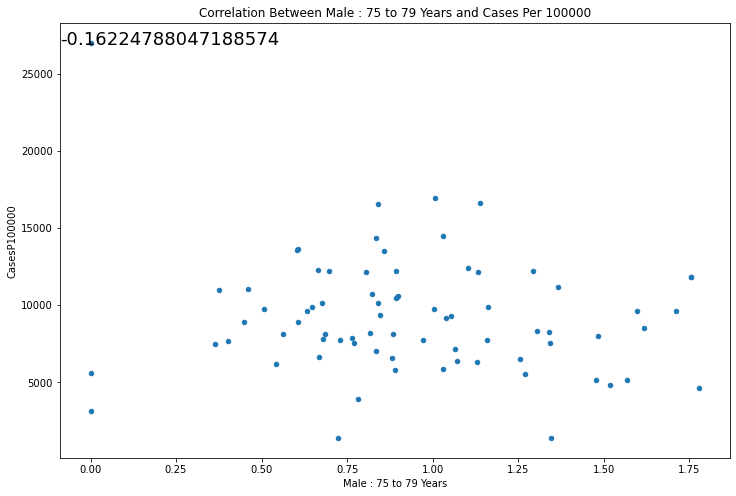

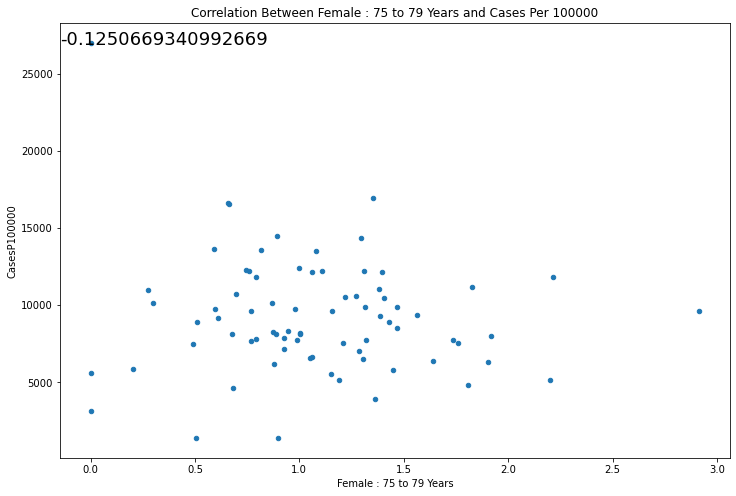

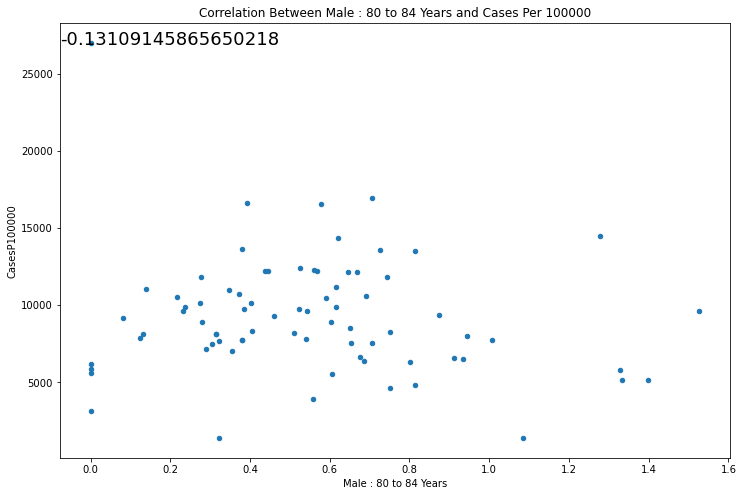

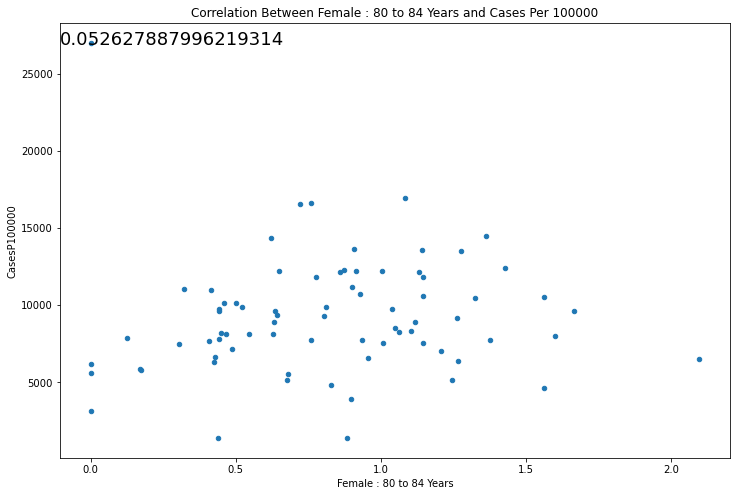

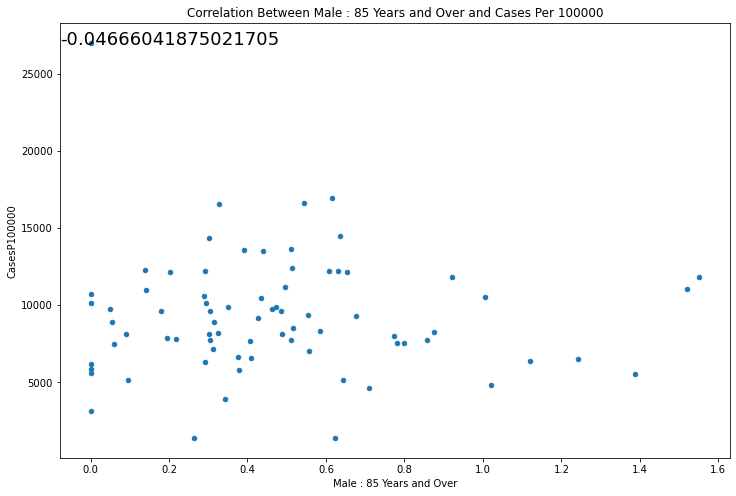

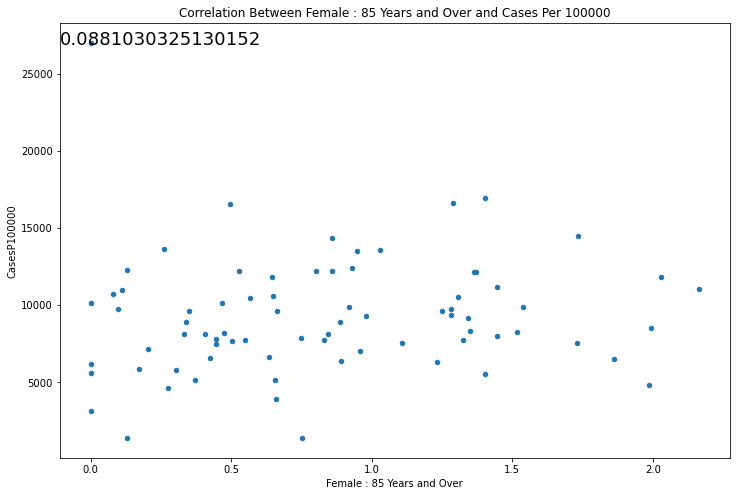

In [39]:
for element in age_list:
    age_percentage.plot.scatter(element,"CasesP100000", figsize = (12,8),title=f'Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(age_percentage[element],
                                 age_percentage["CasesP100000"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

### Age data filtered by income

In [40]:
#merge left onto the filter to get data for only those zip codes
age_belowmedian = pd.DataFrame
age_abovemedian = pd.DataFrame

age_belowmedian = pd.merge(belowmedian,age_percentage, on="ZipInt",how="left")
age_abovemedian = pd.merge(abovemedian,age_percentage, on= 'ZipInt', how = 'left')

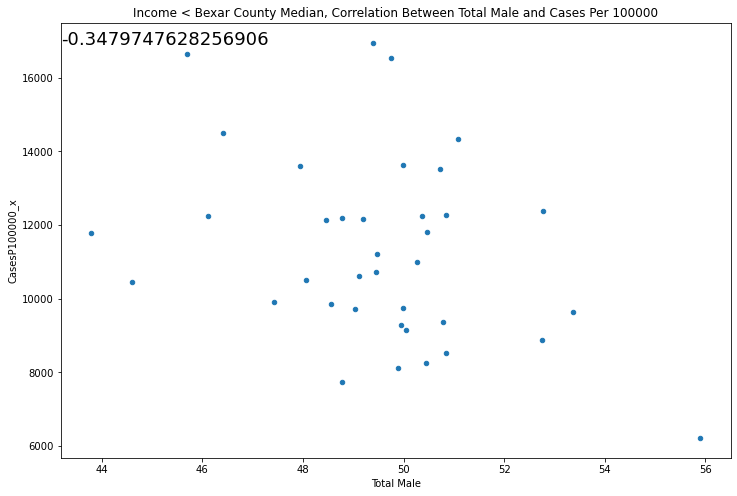

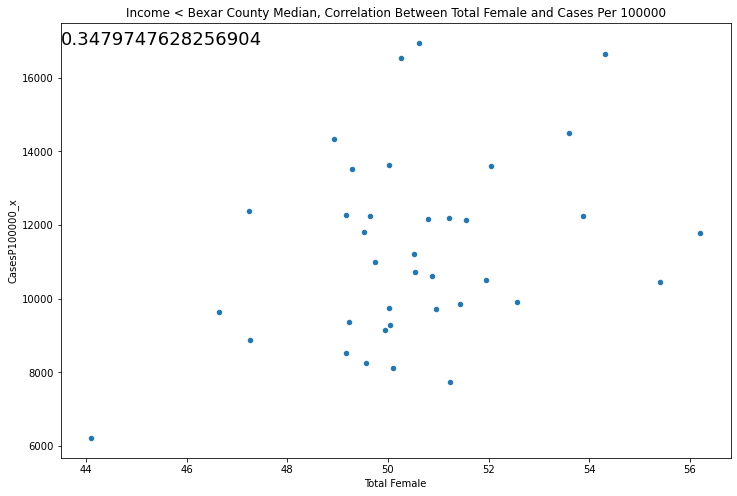

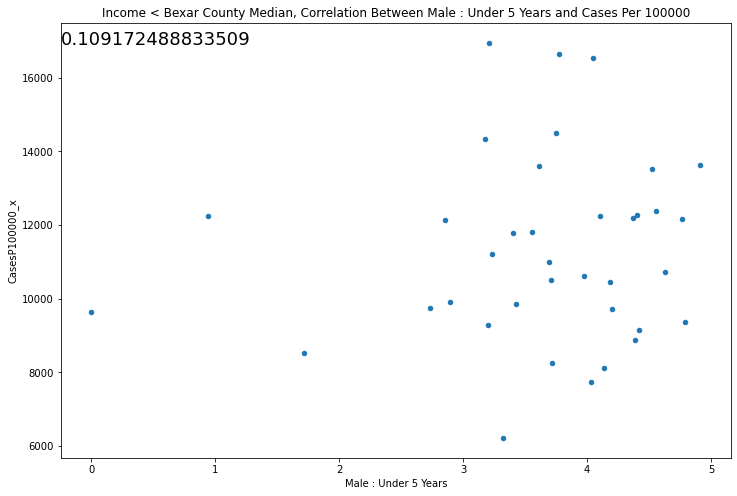

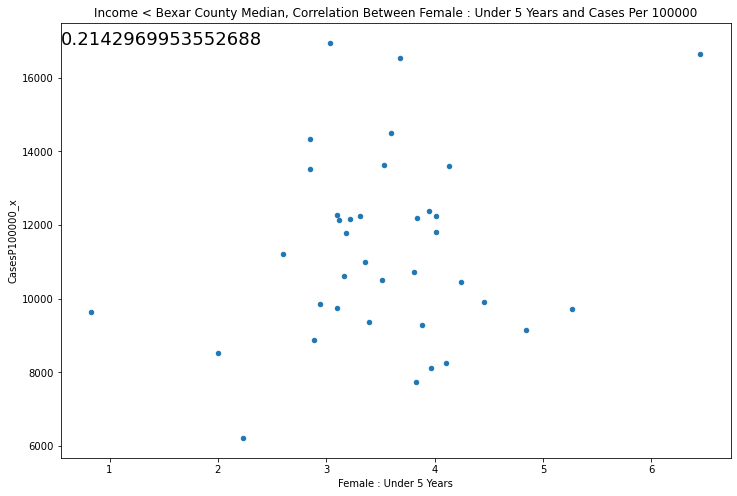

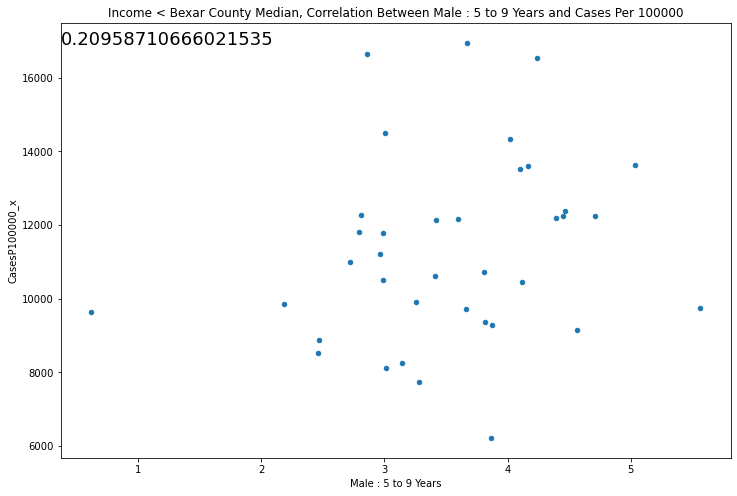

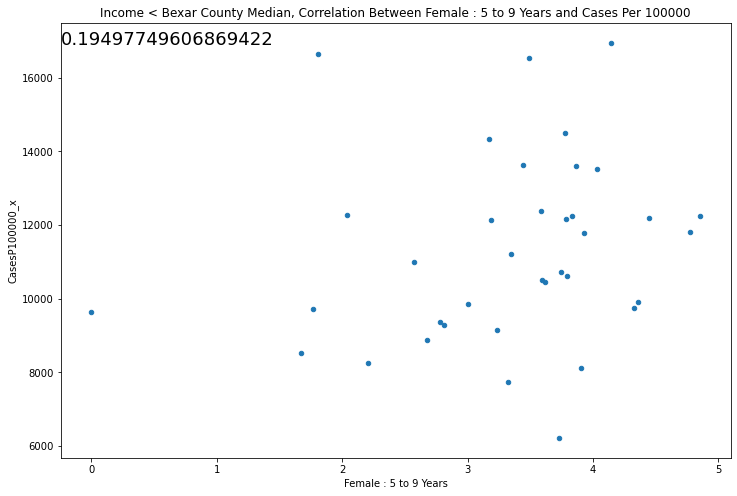

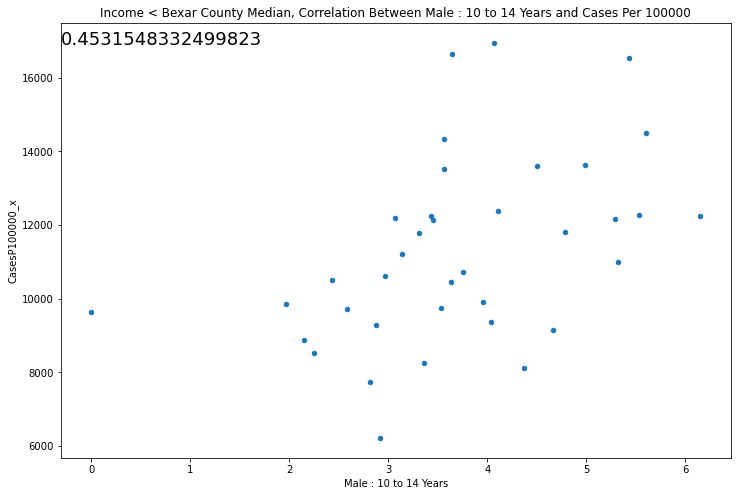

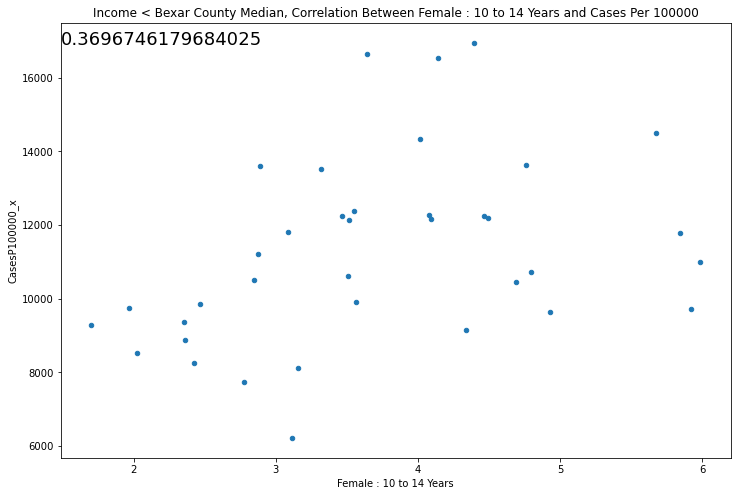

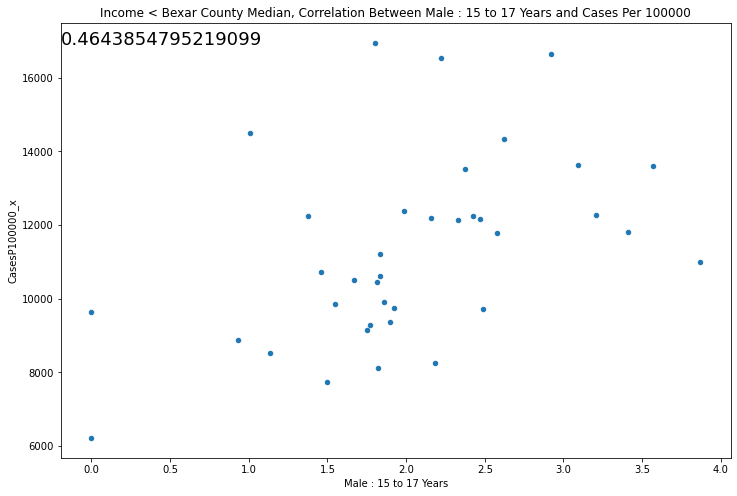

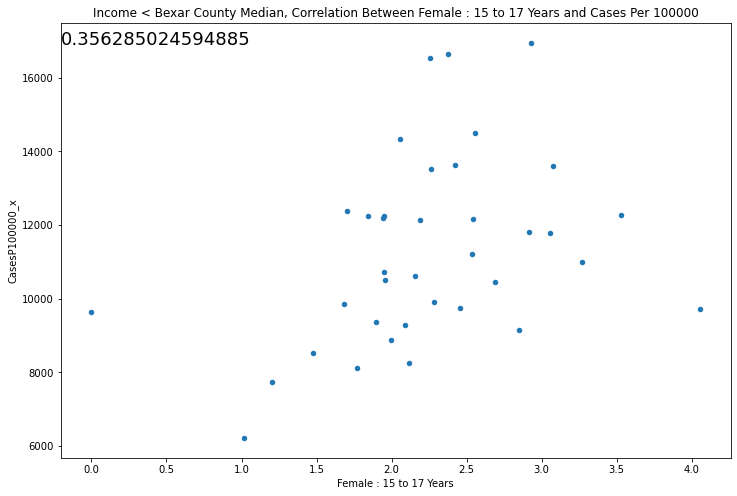

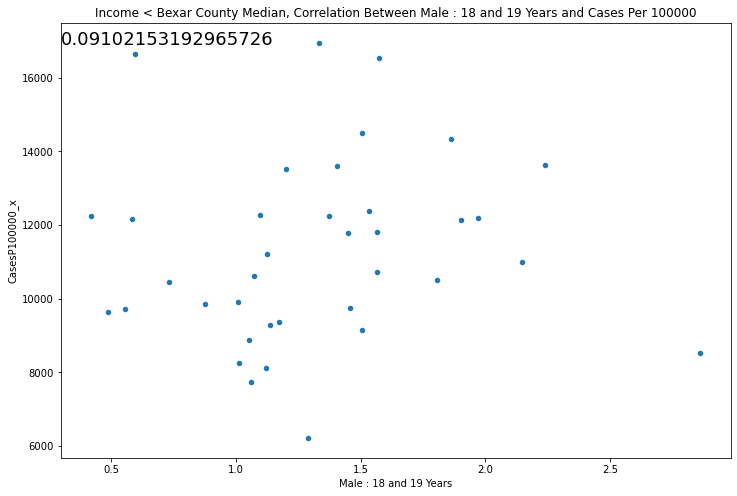

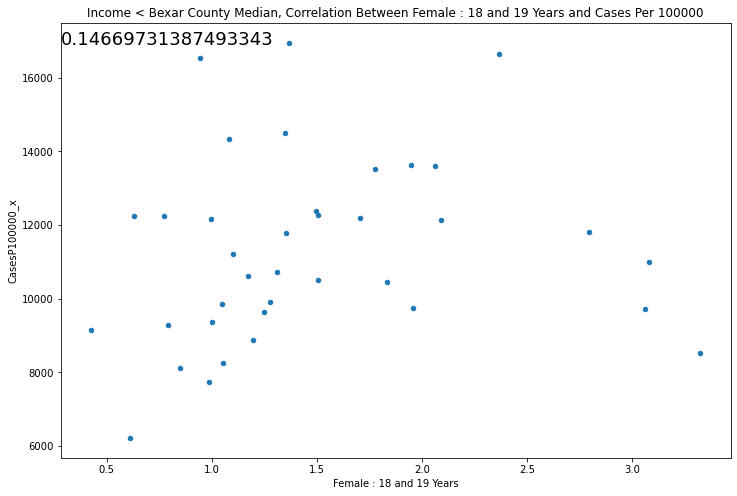

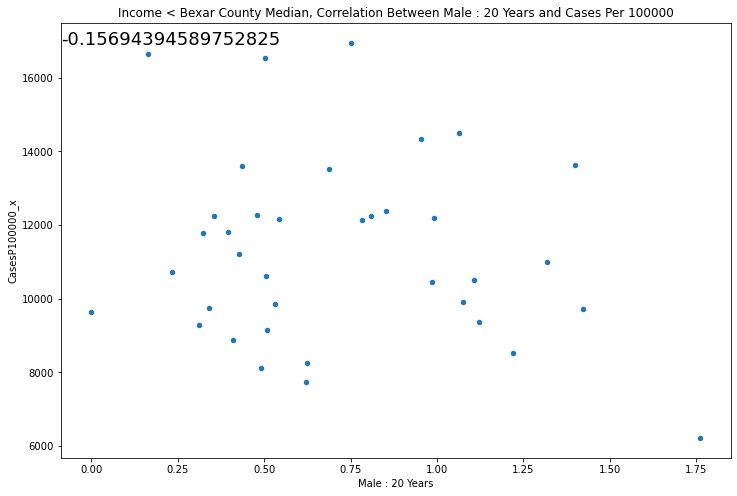

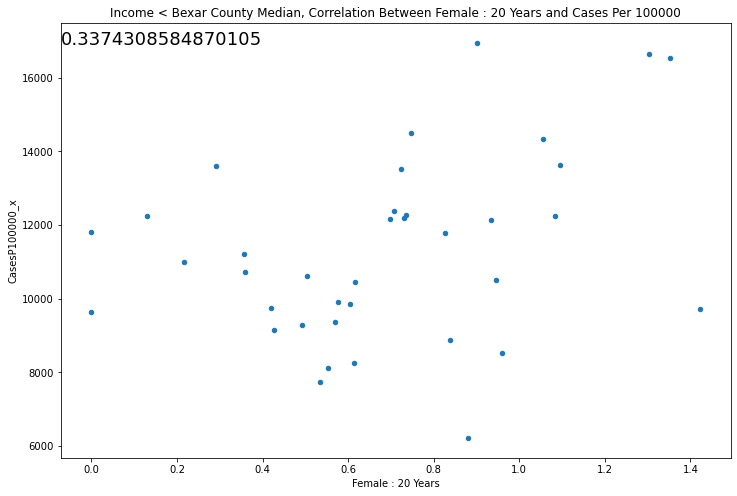

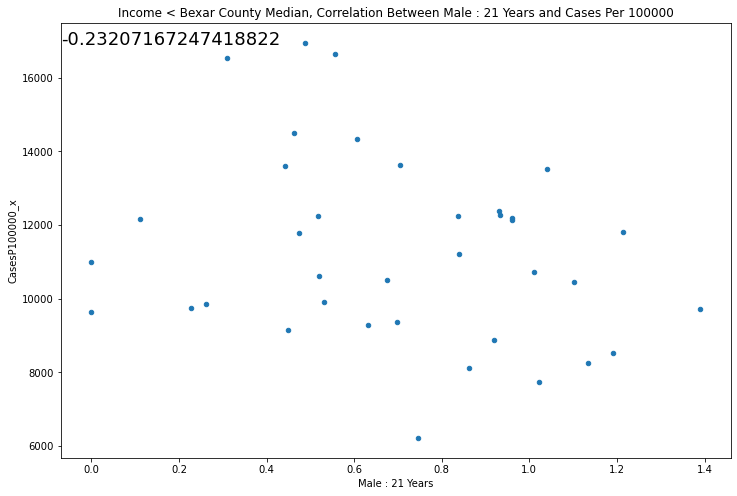

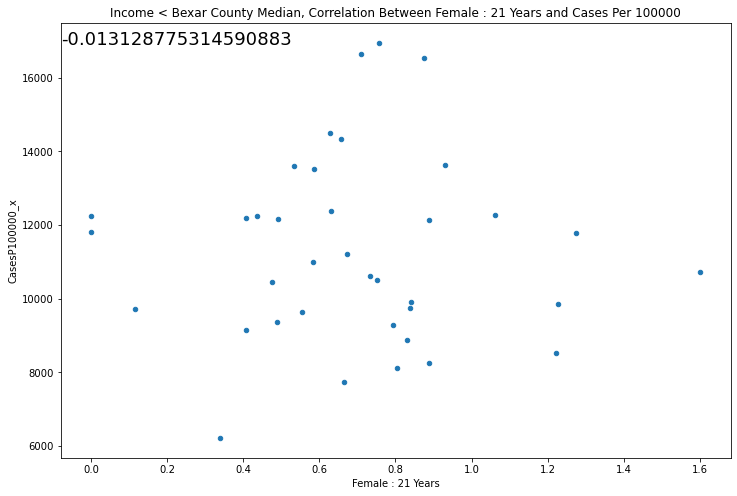

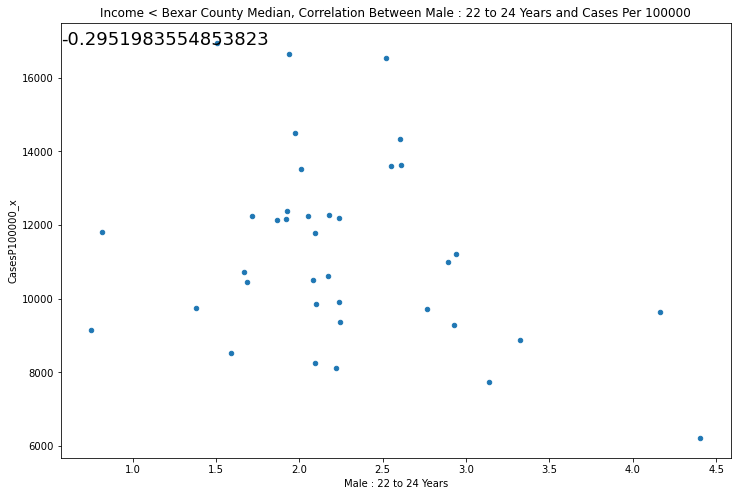

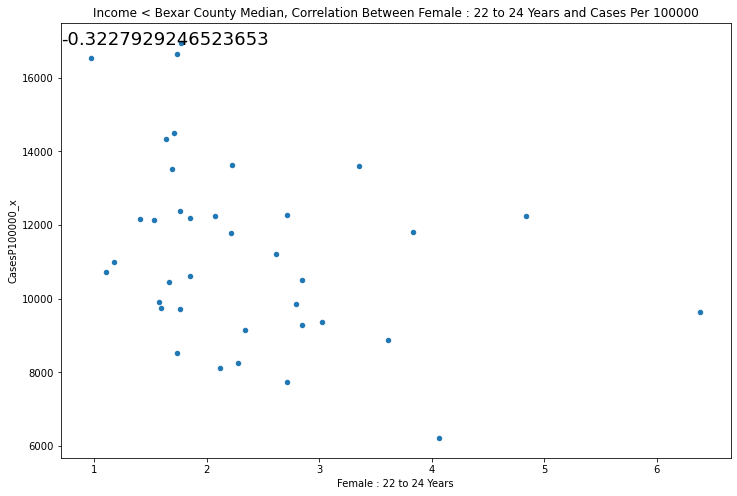

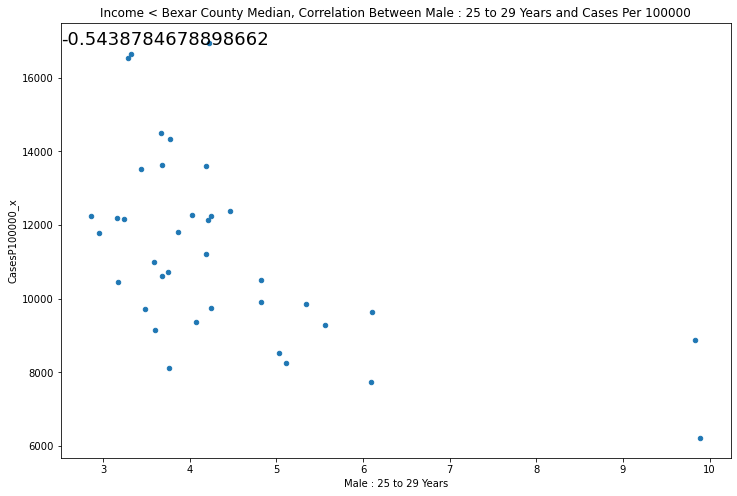

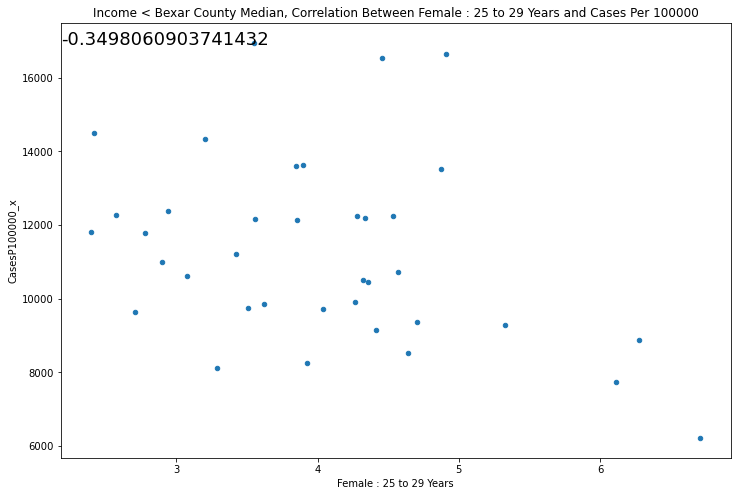

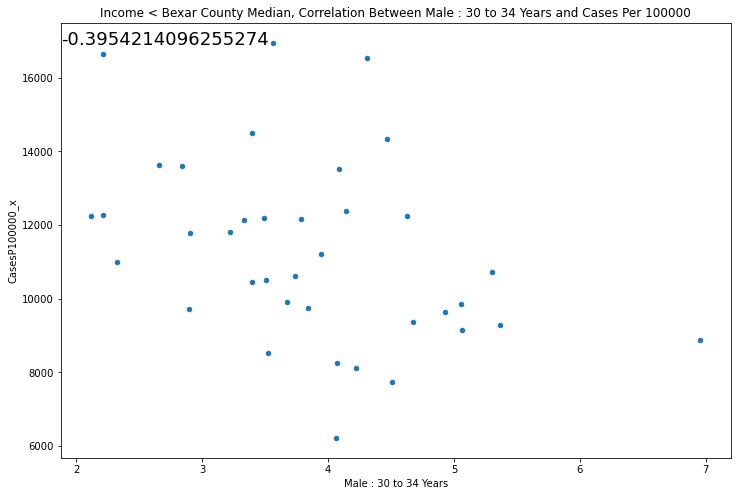

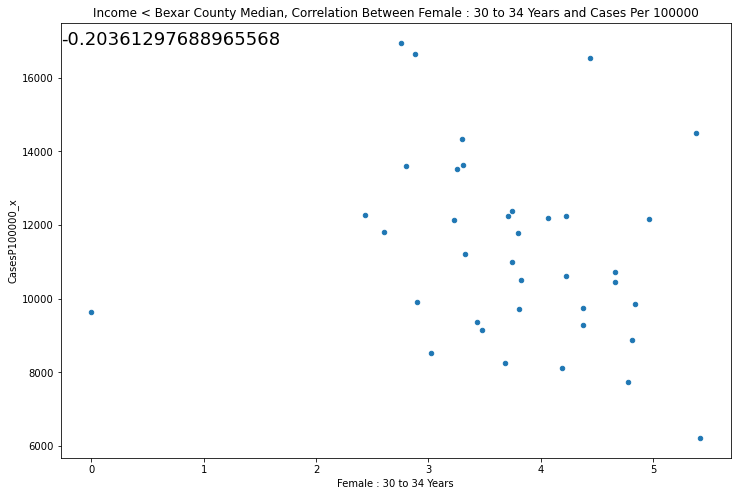

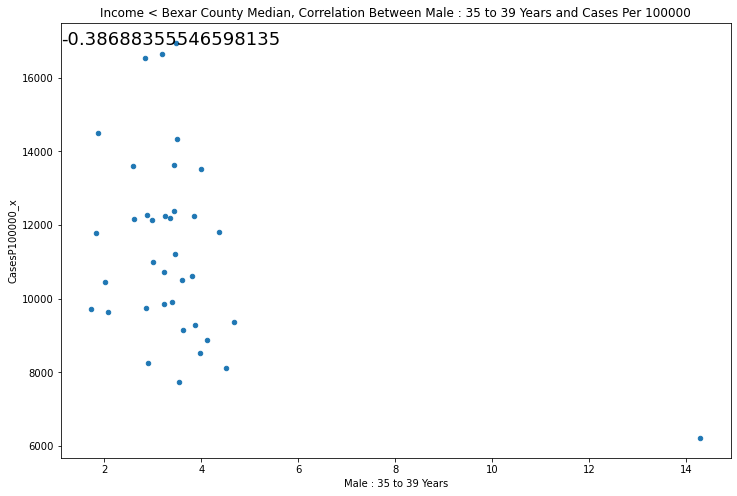

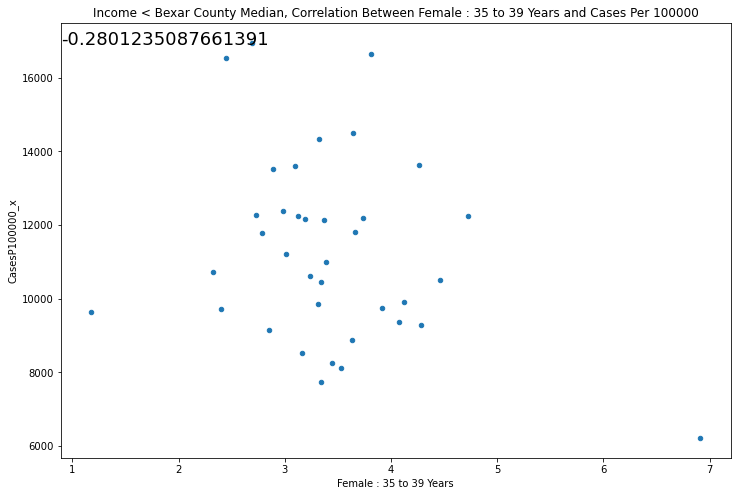

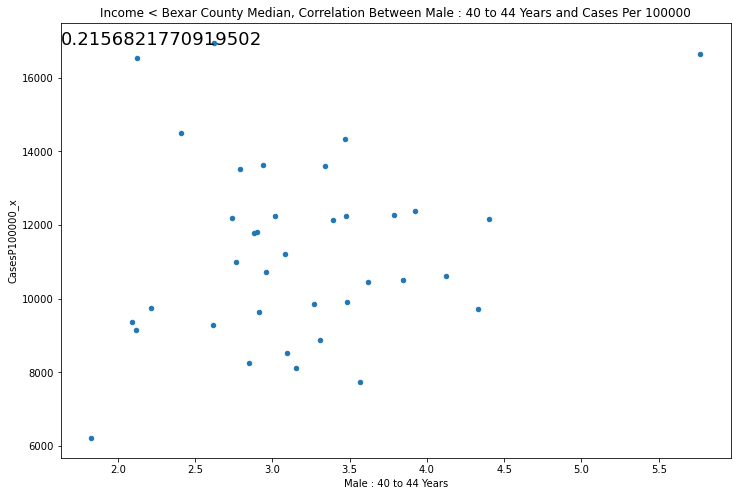

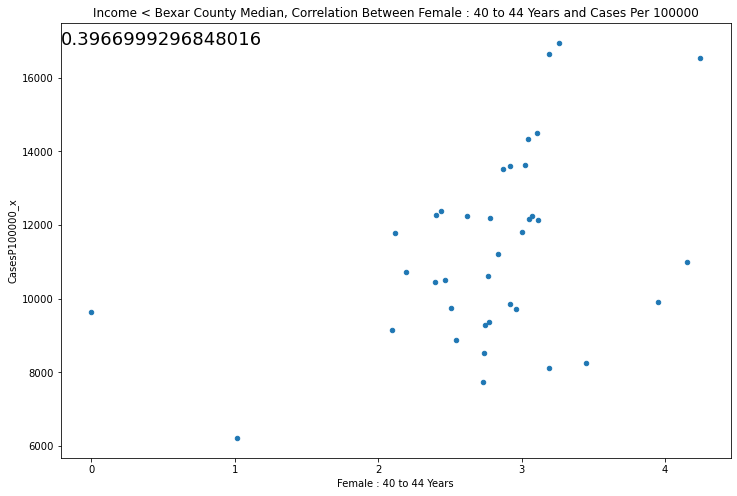

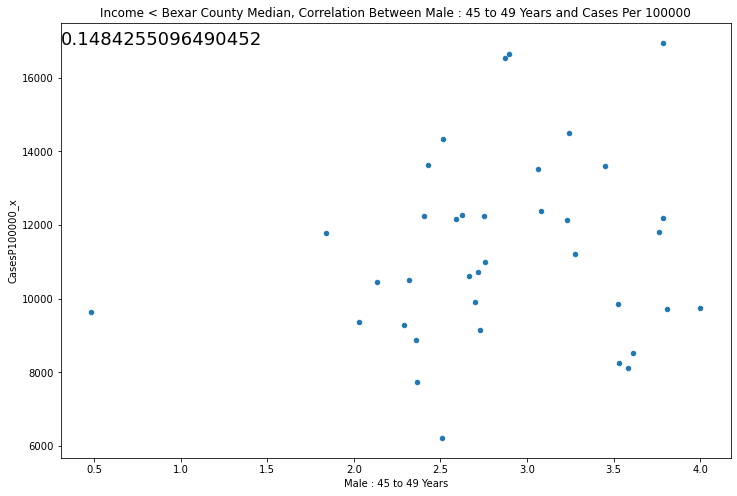

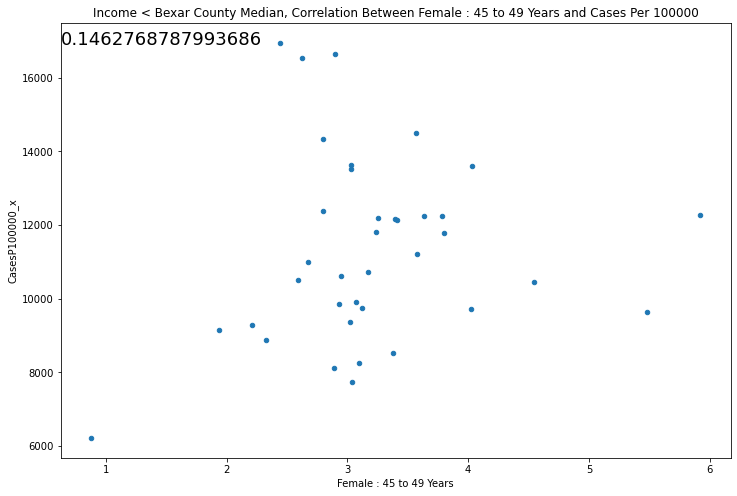

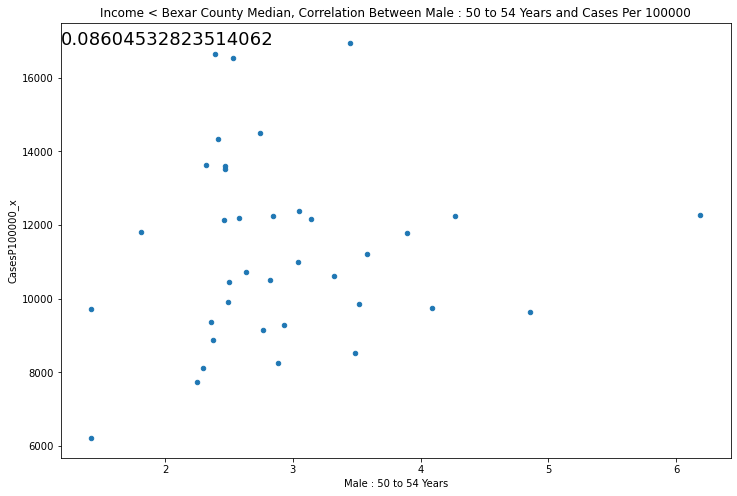

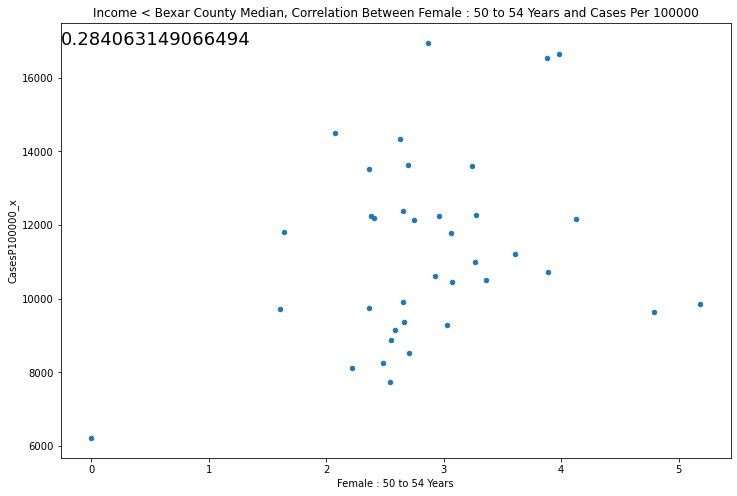

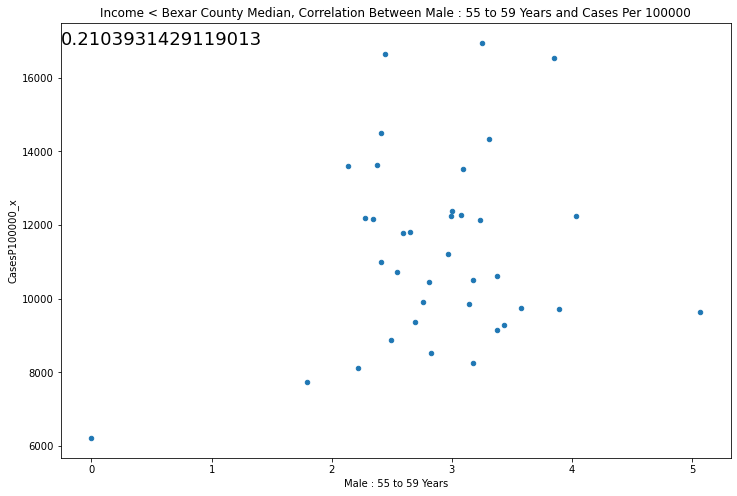

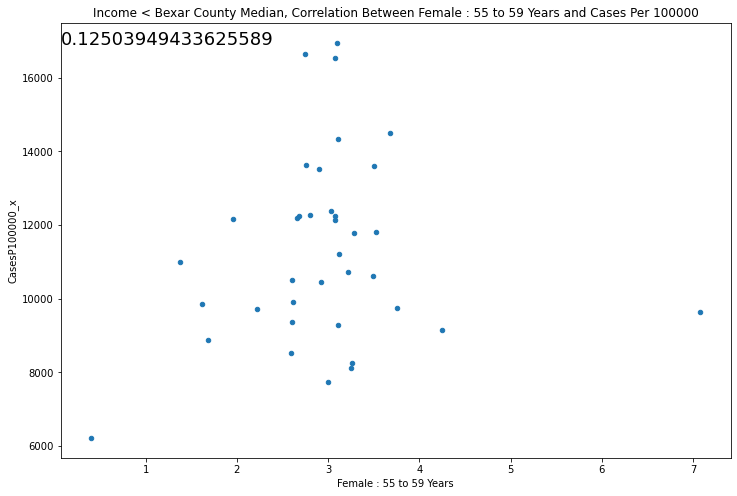

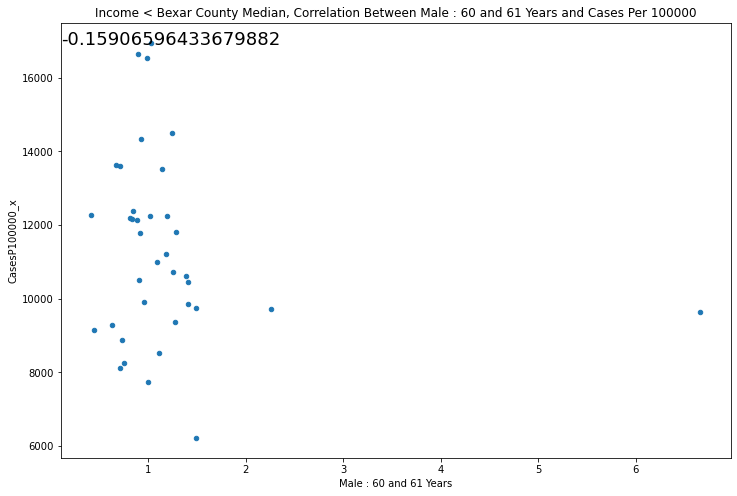

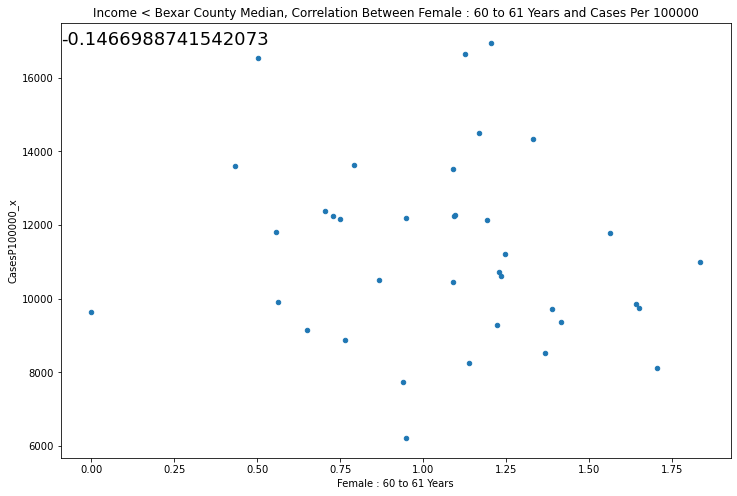

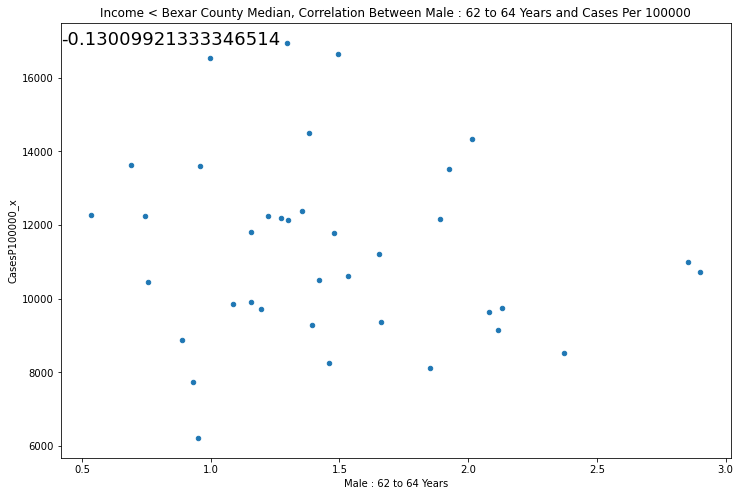

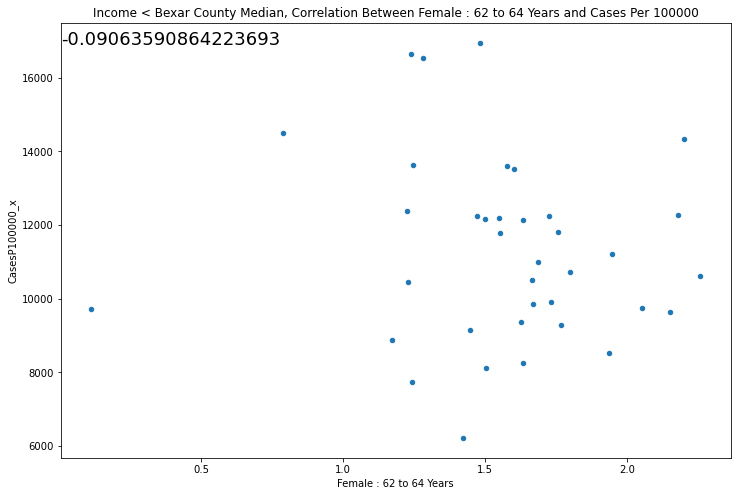

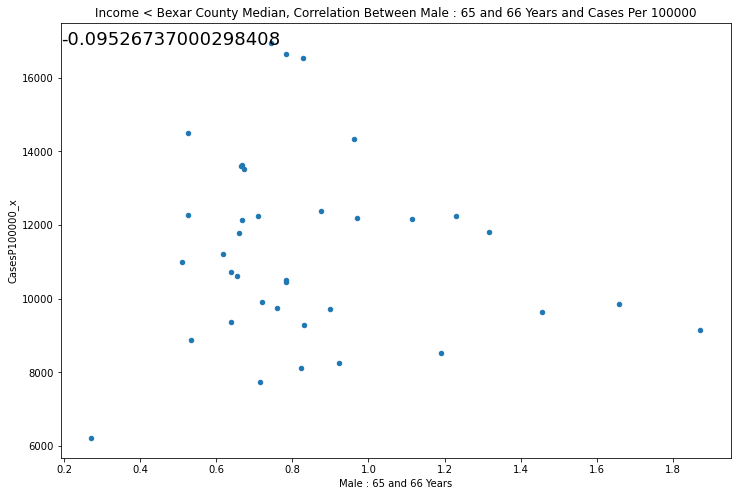

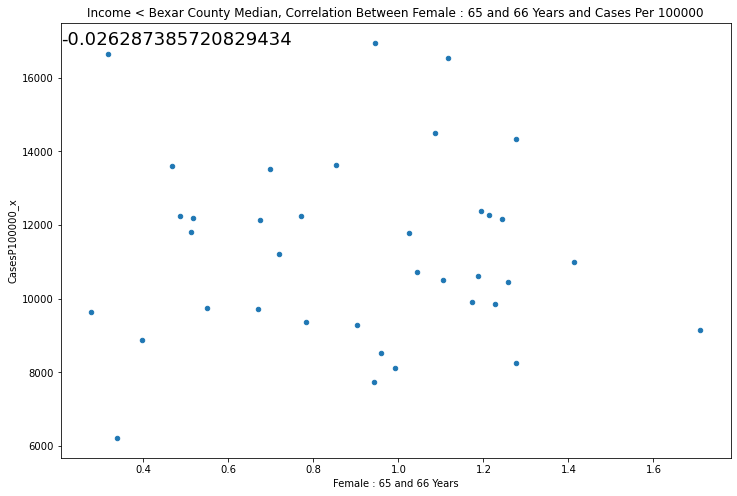

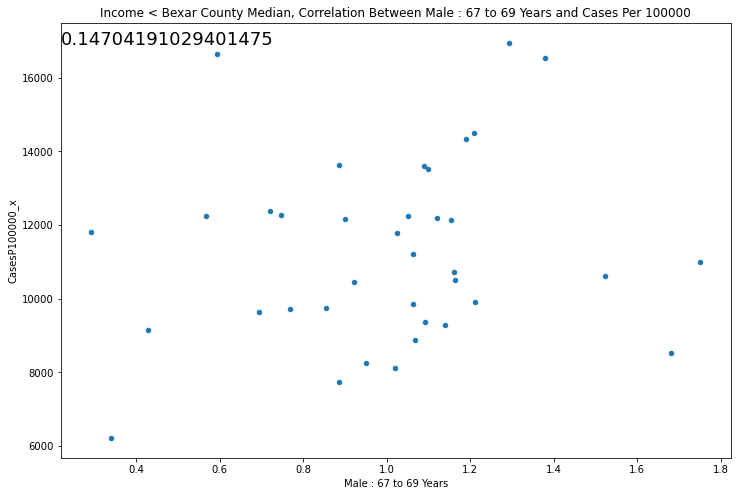

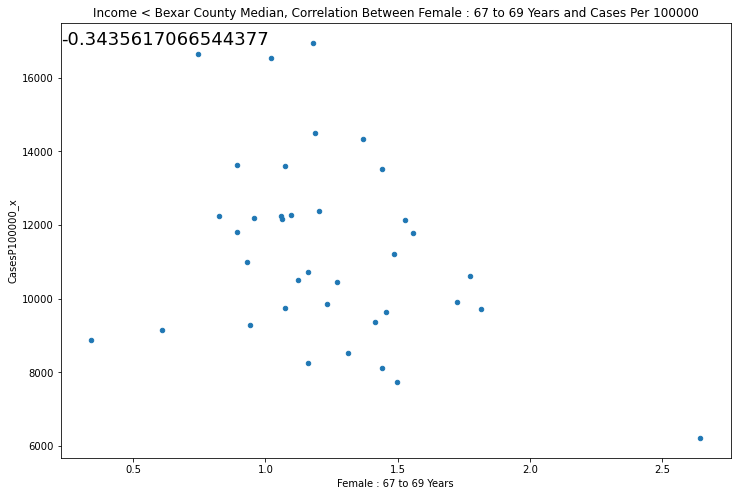

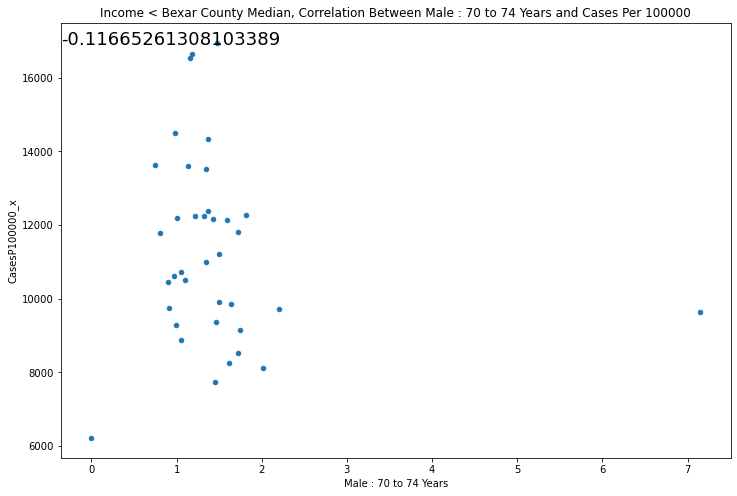

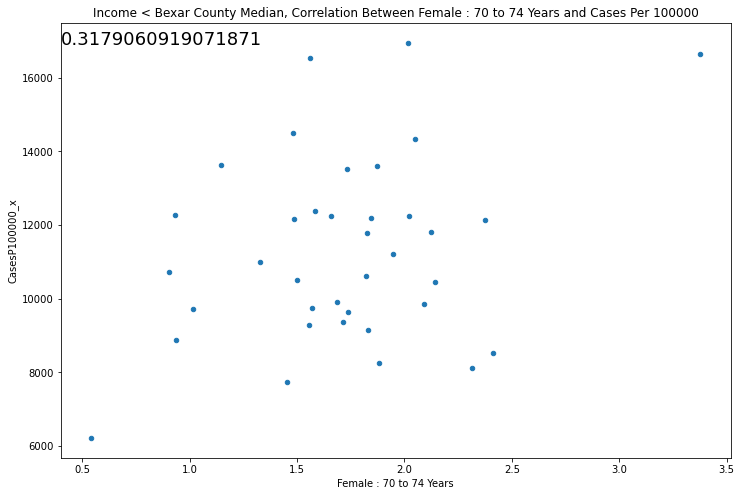

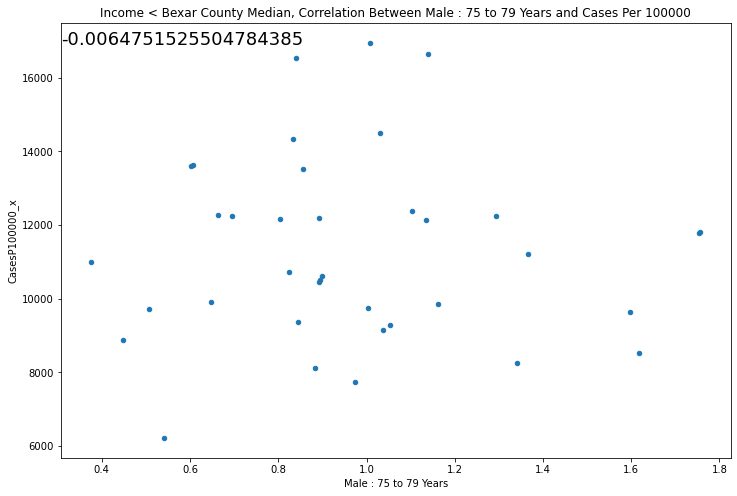

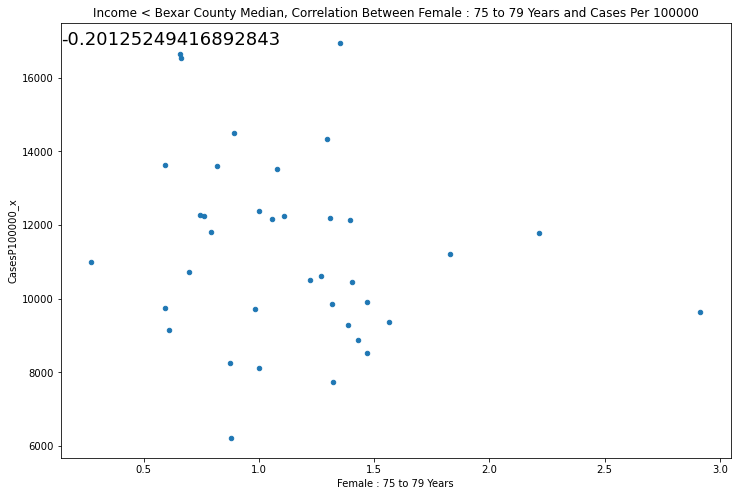

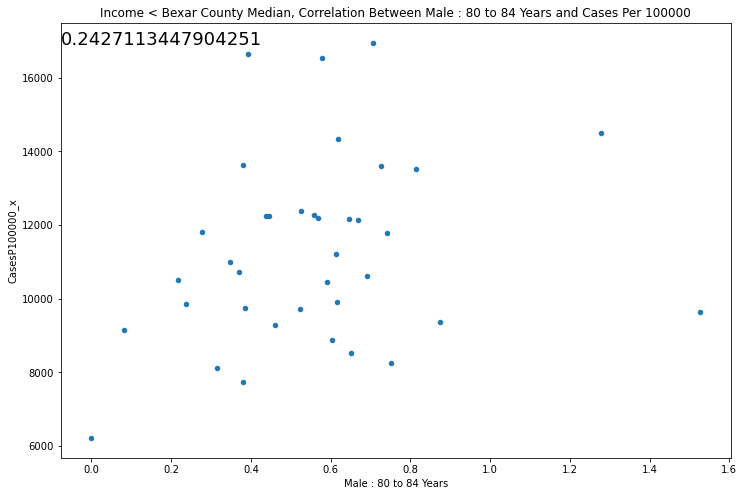

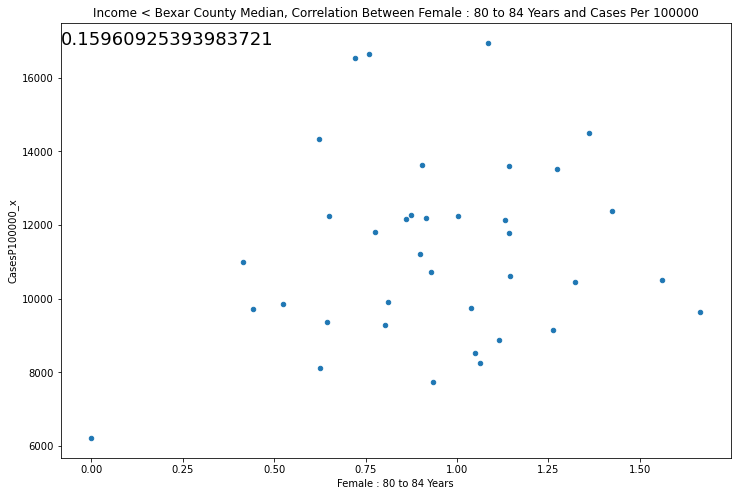

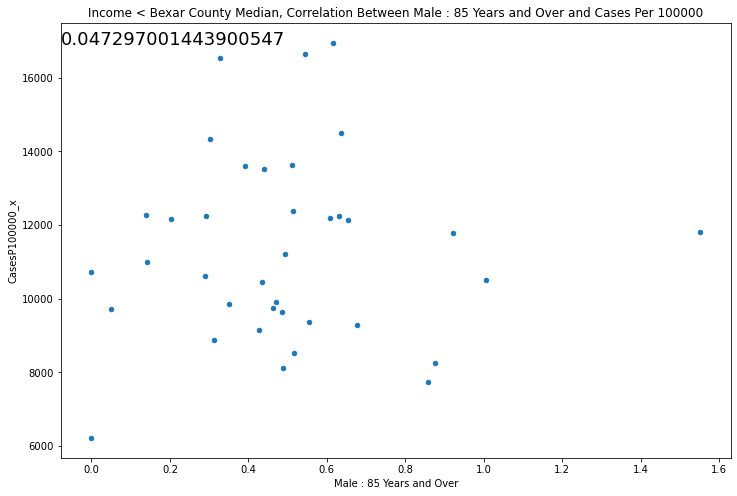

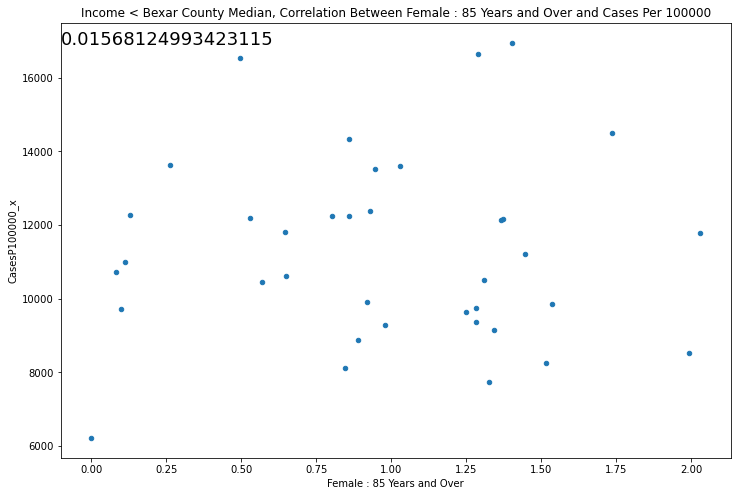

In [41]:
#Scatter plots for below median income
for element in age_list:
    age_belowmedian.plot.scatter(element,"CasesP100000_x", figsize = (12,8),title=f'Income < Bexar County Median, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(age_belowmedian[element],
                                 age_belowmedian["CasesP100000_x"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

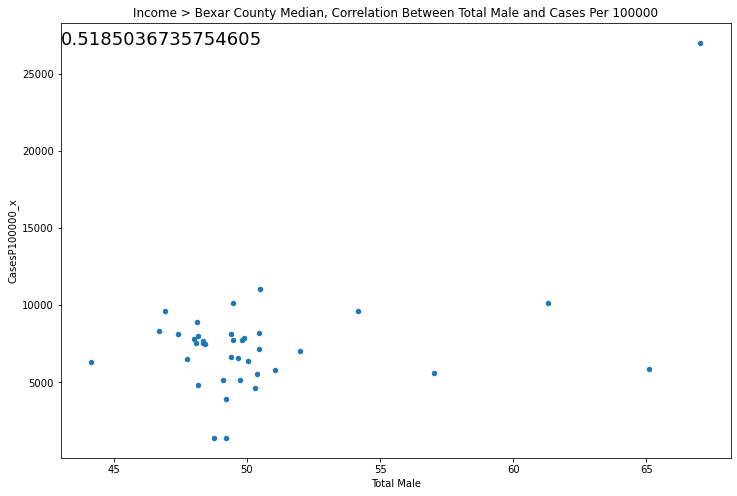

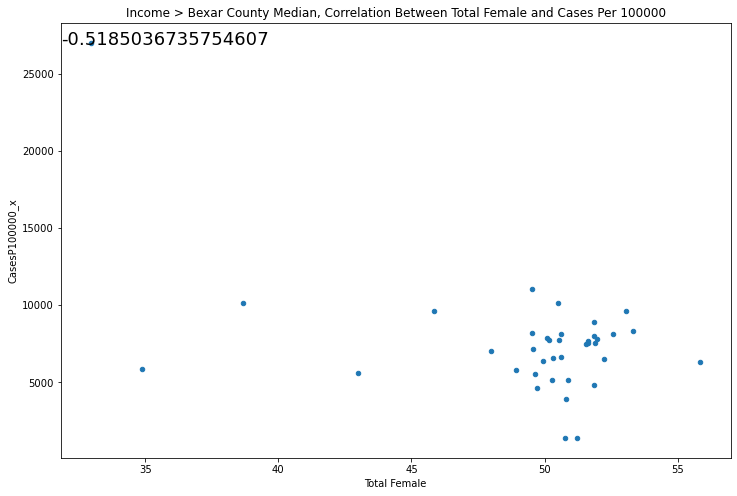

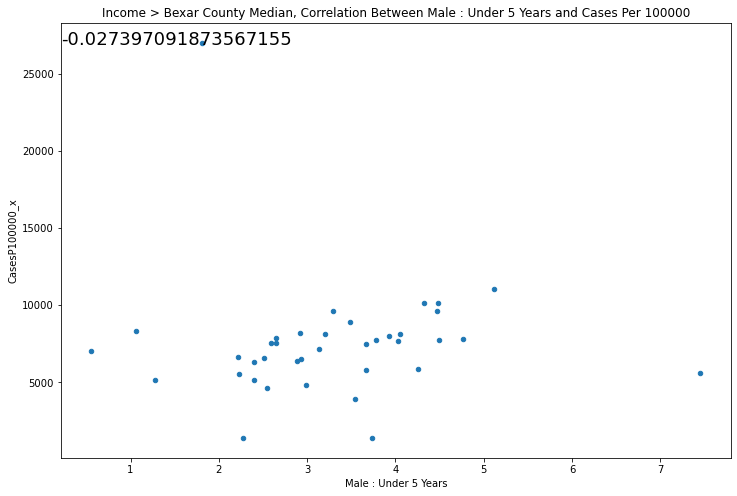

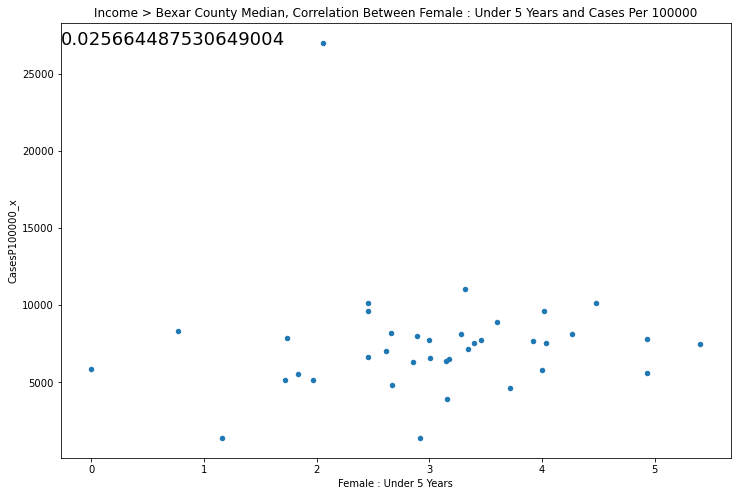

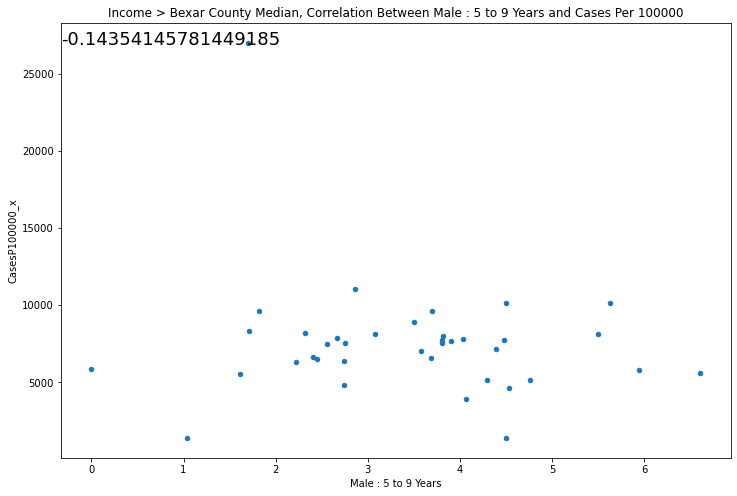

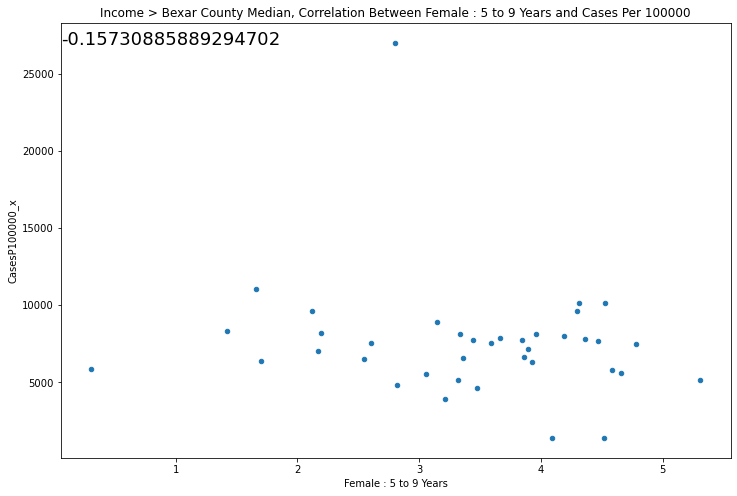

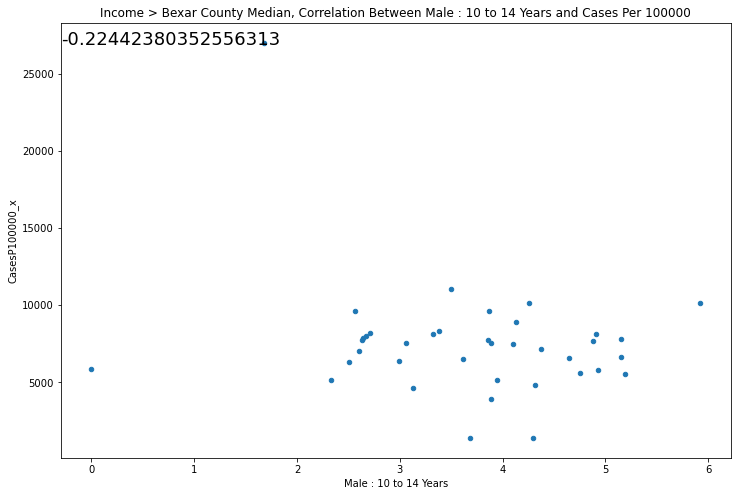

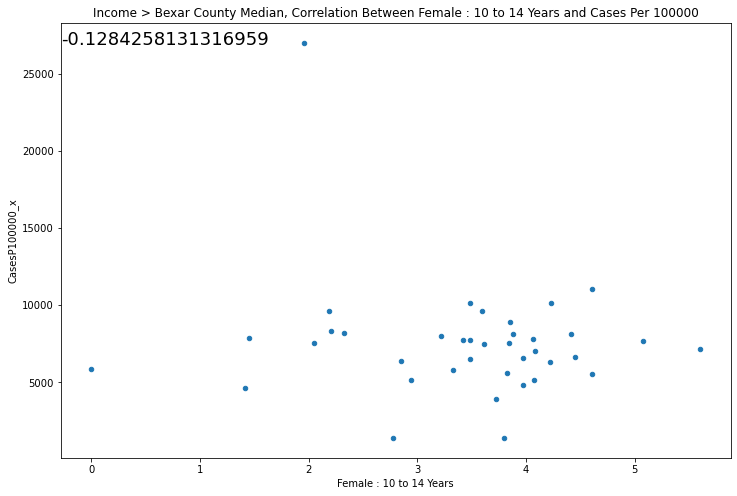

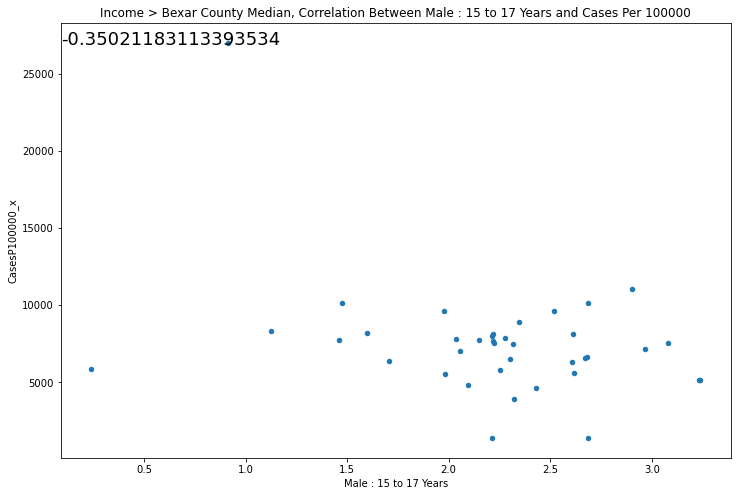

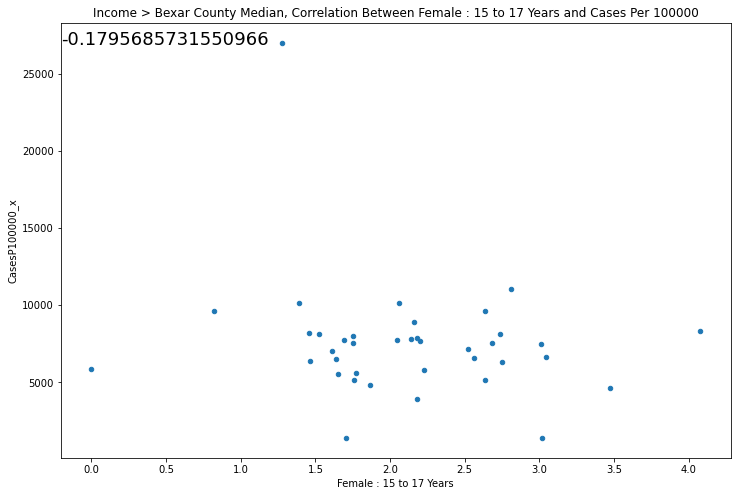

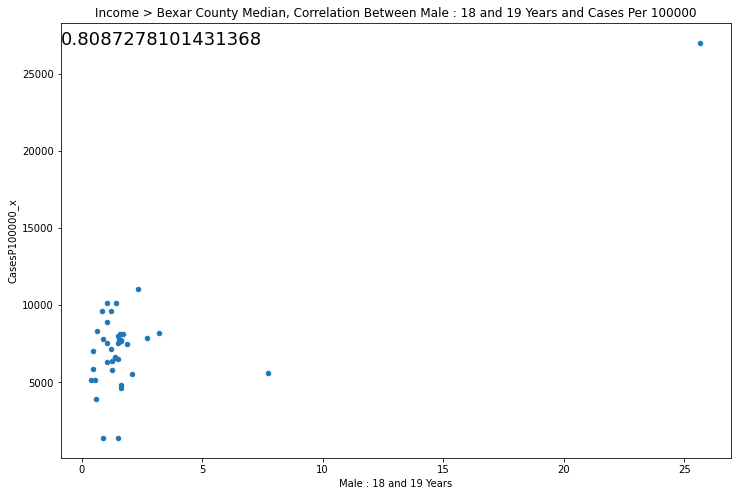

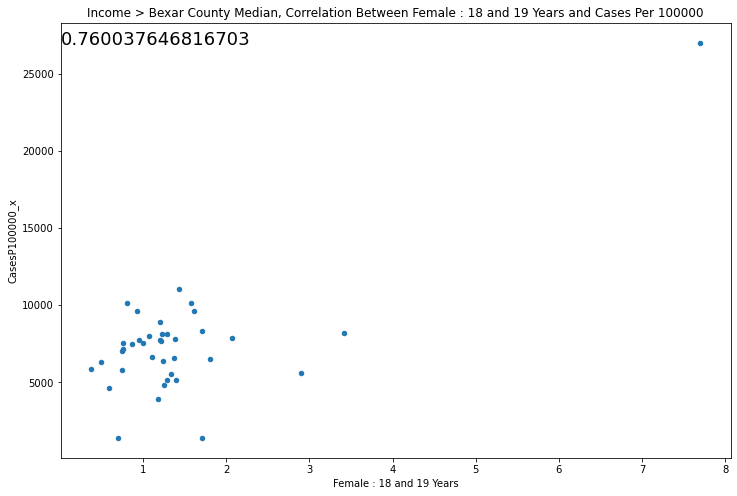

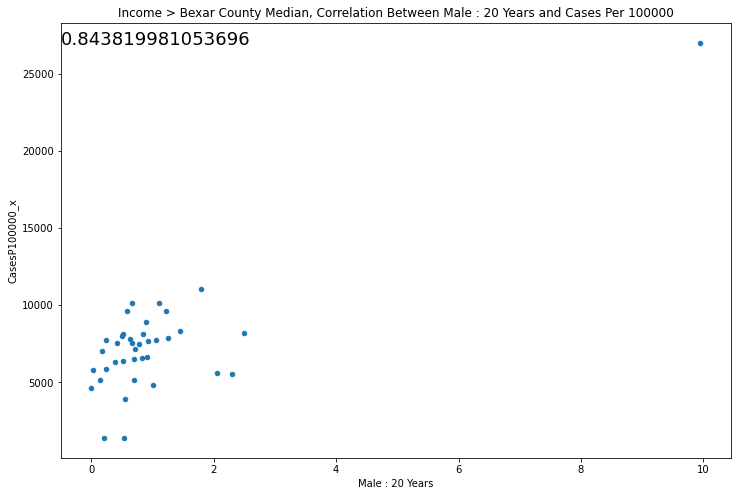

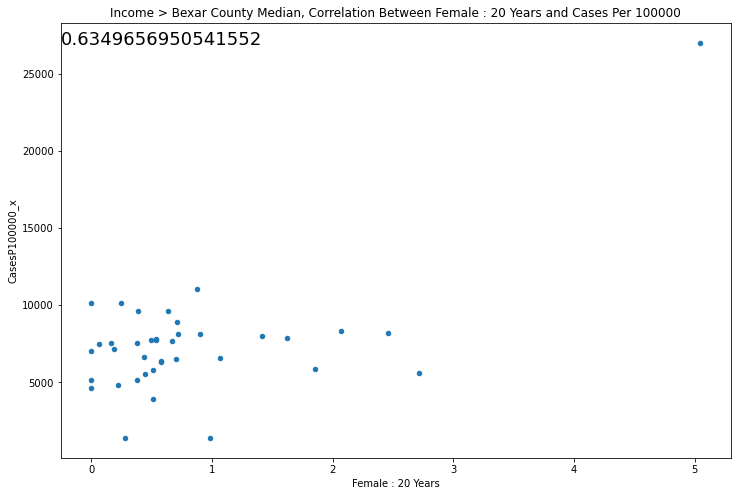

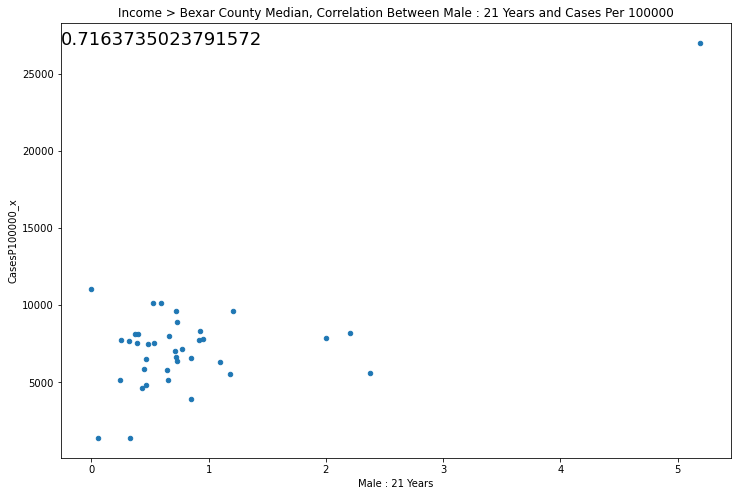

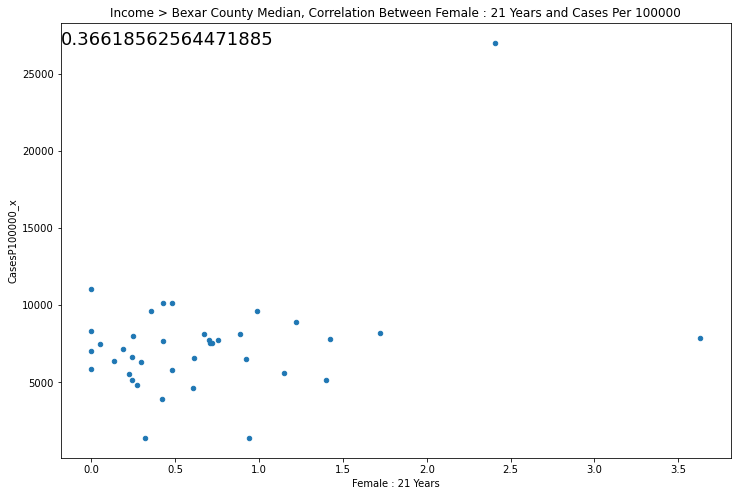

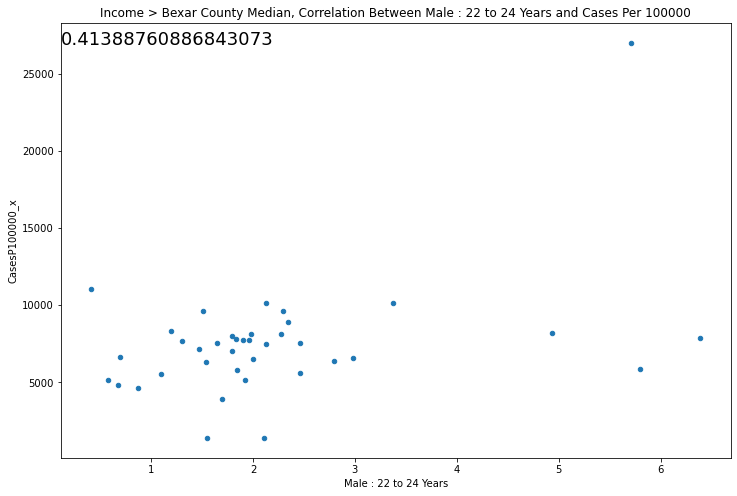

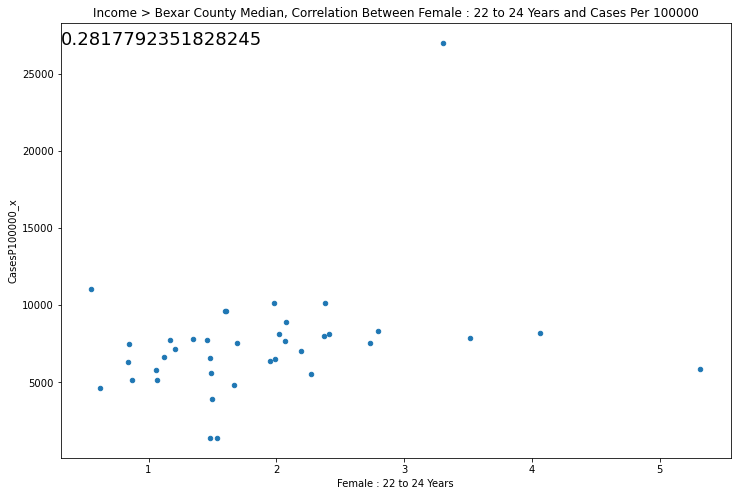

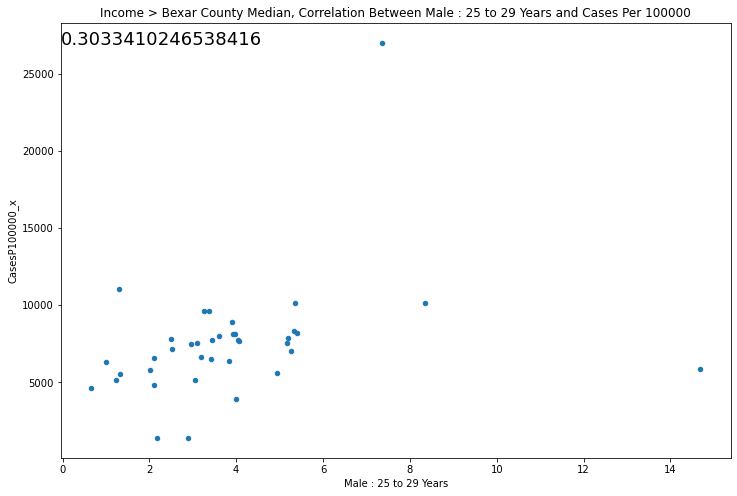

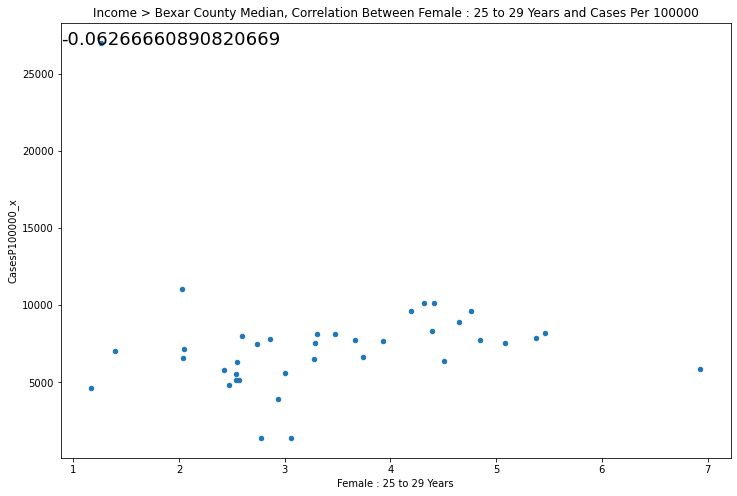

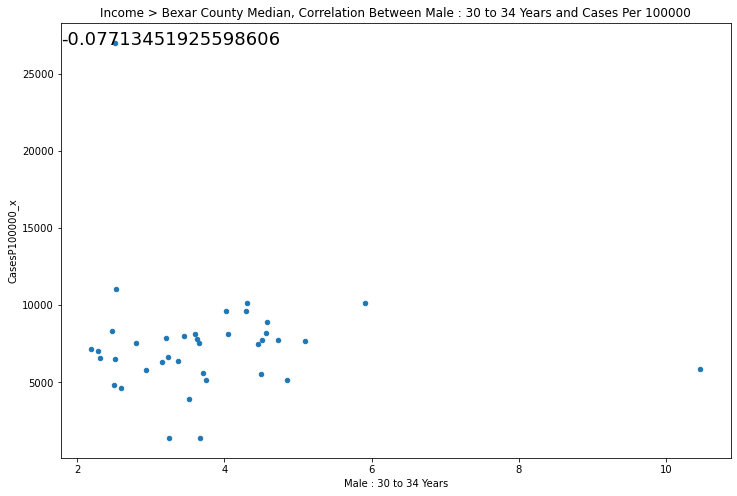

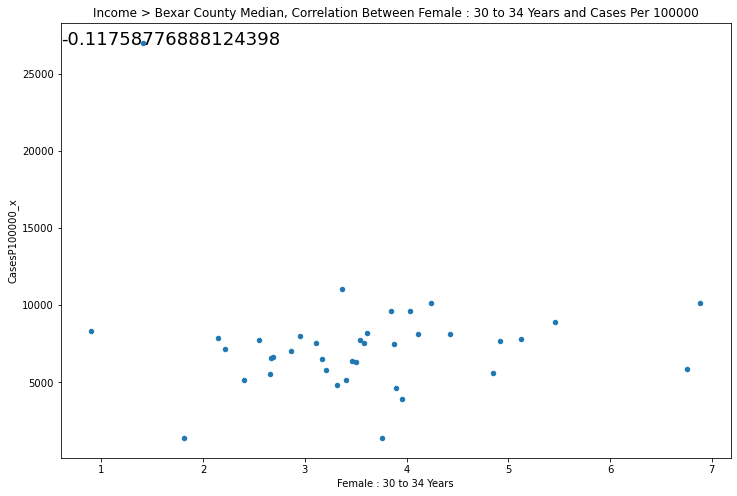

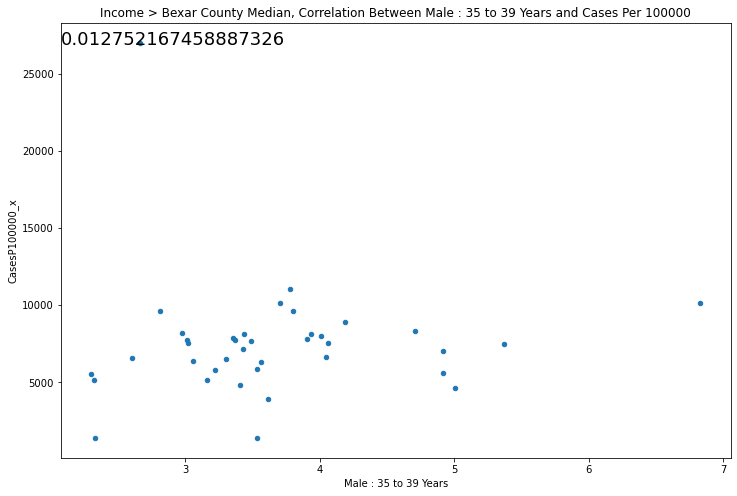

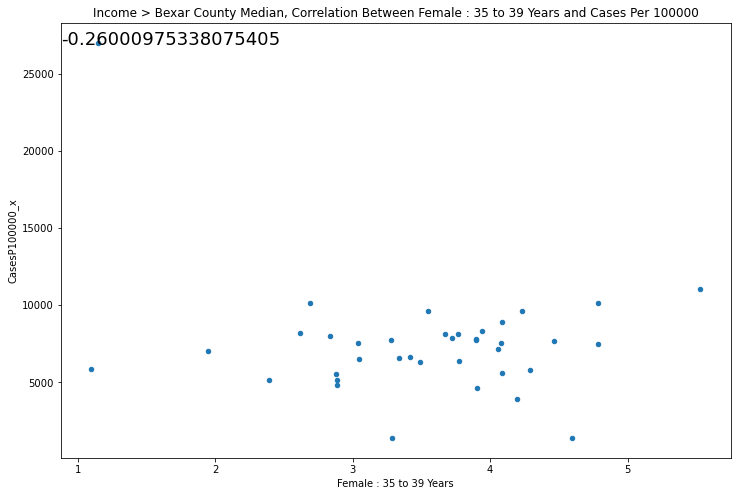

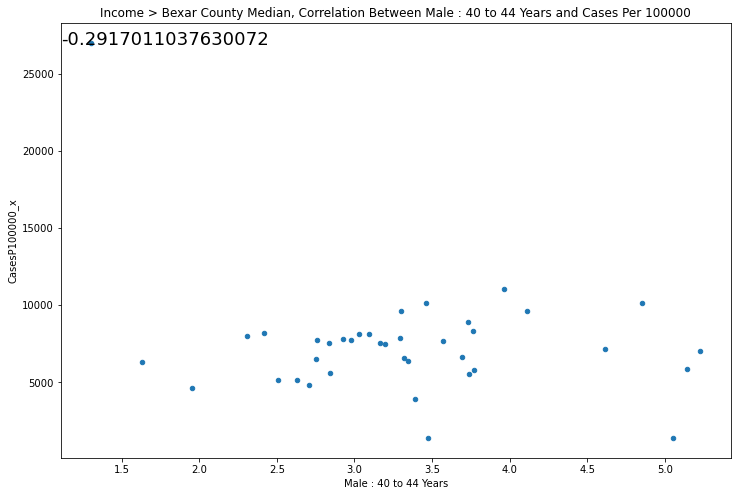

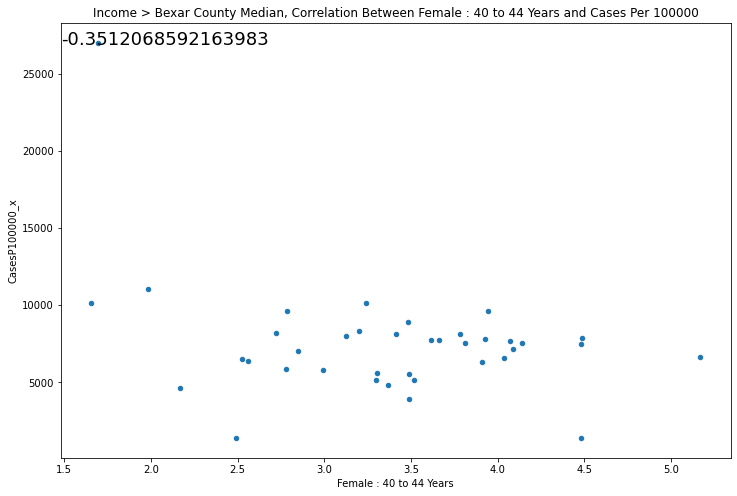

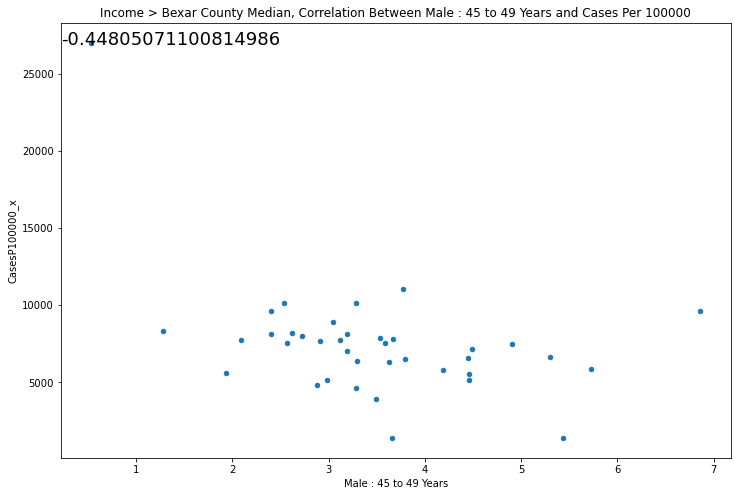

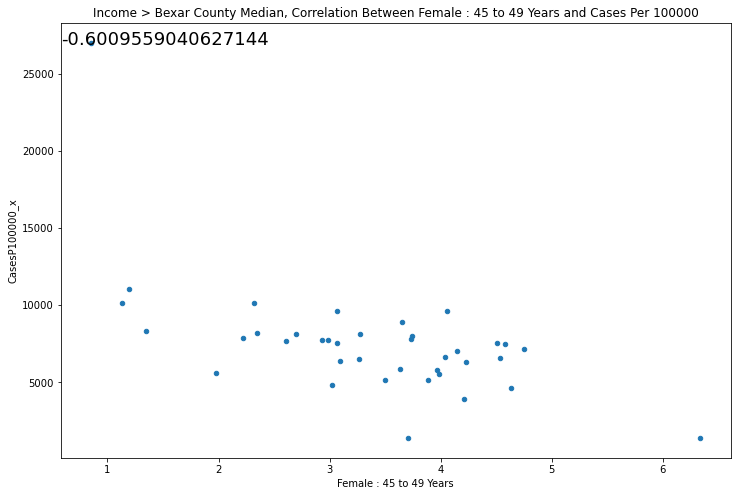

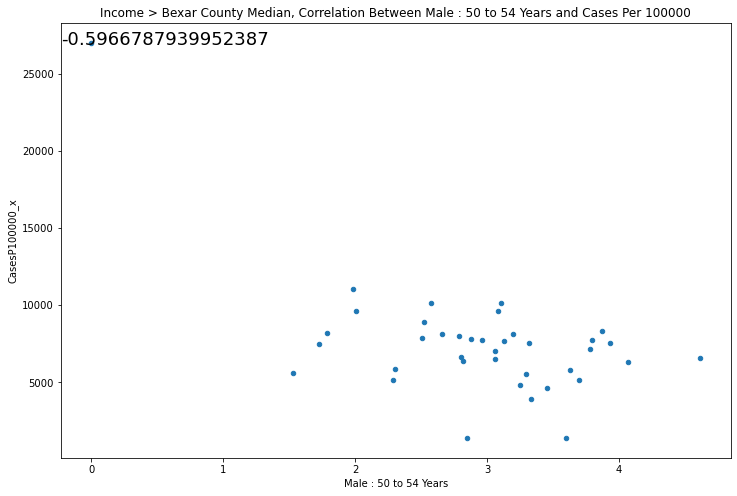

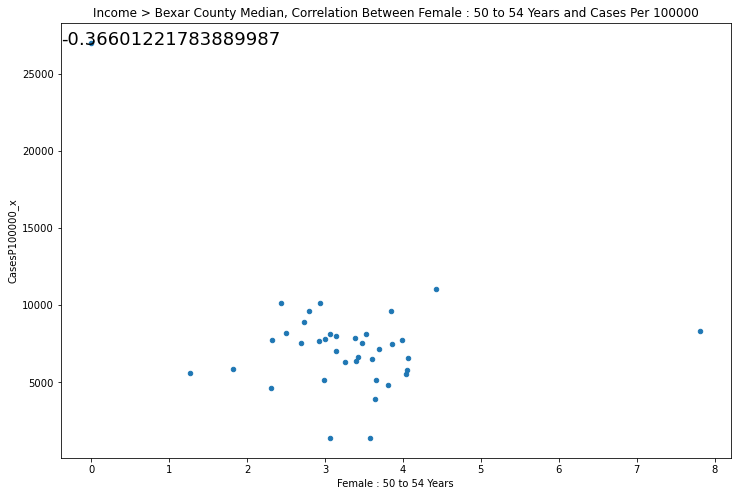

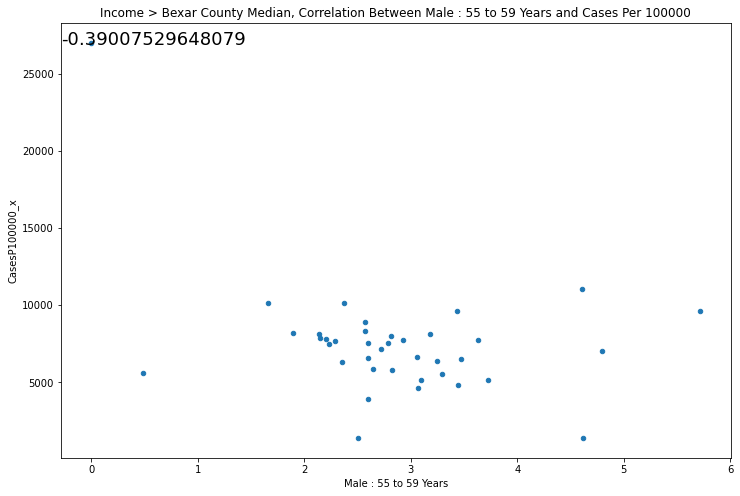

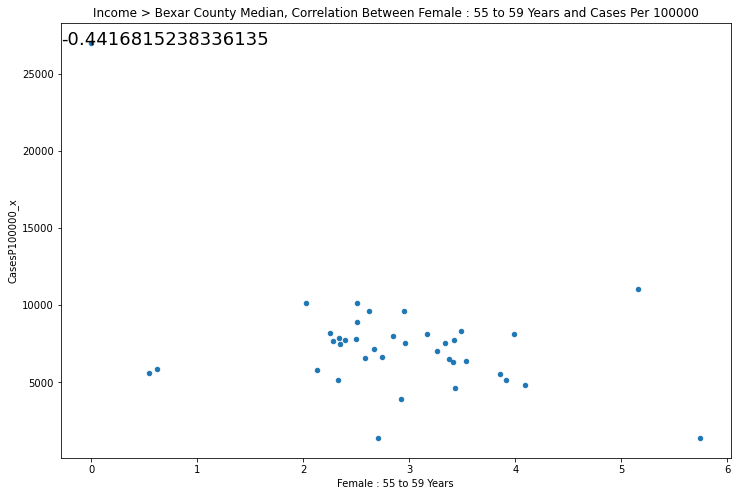

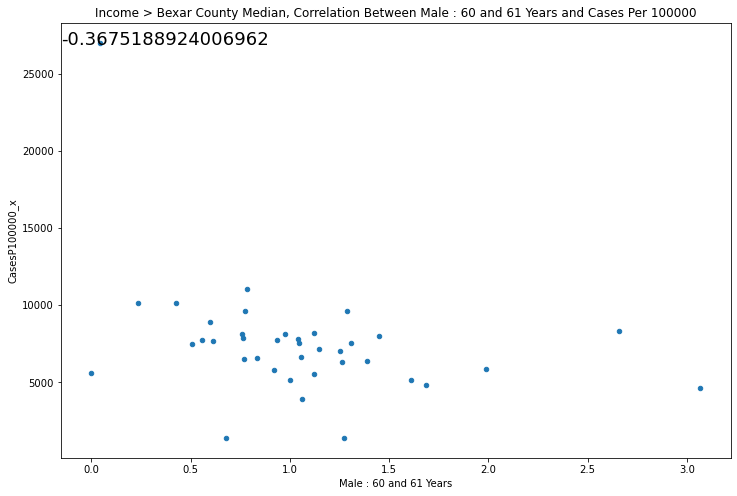

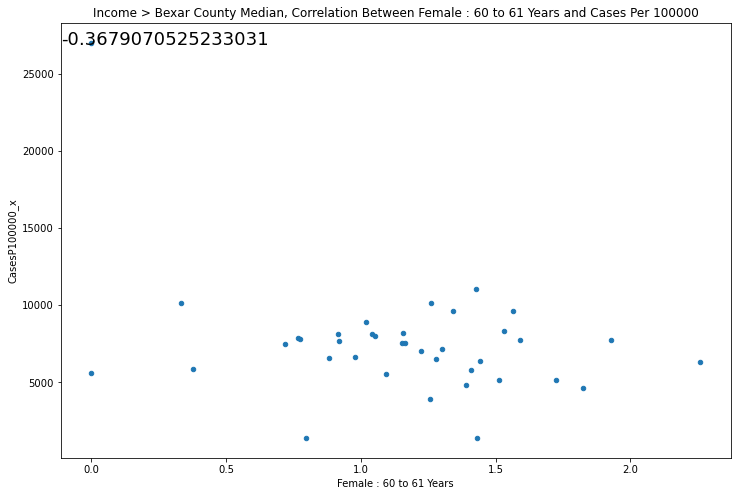

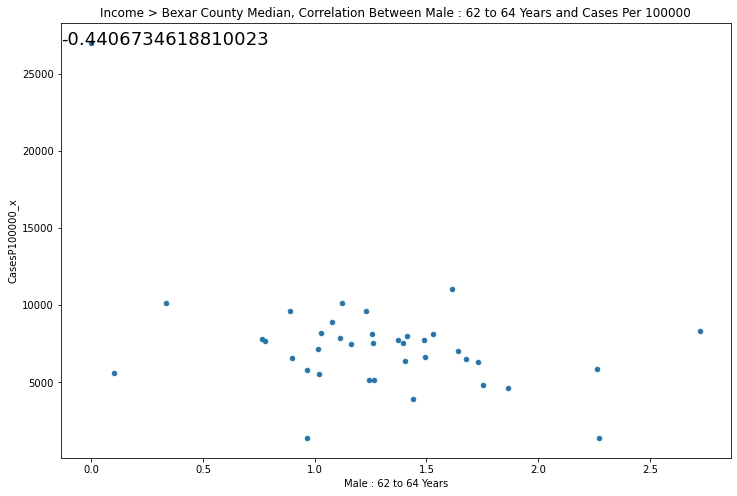

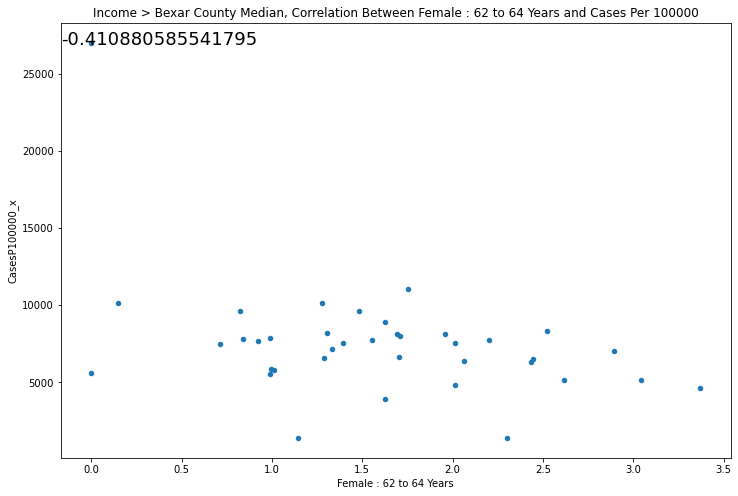

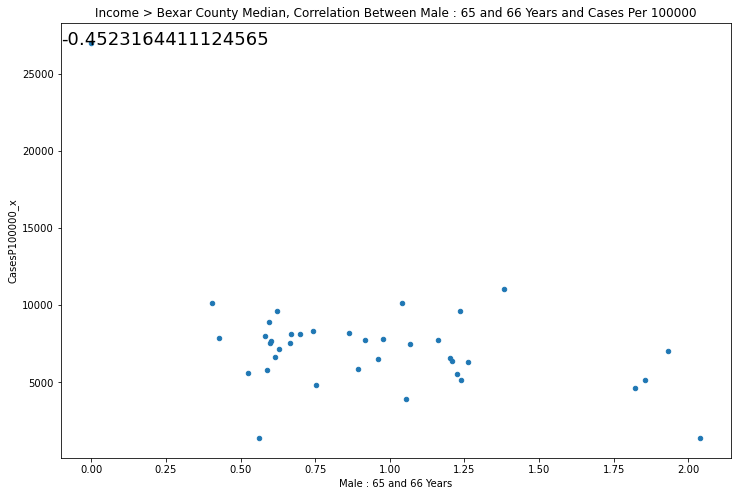

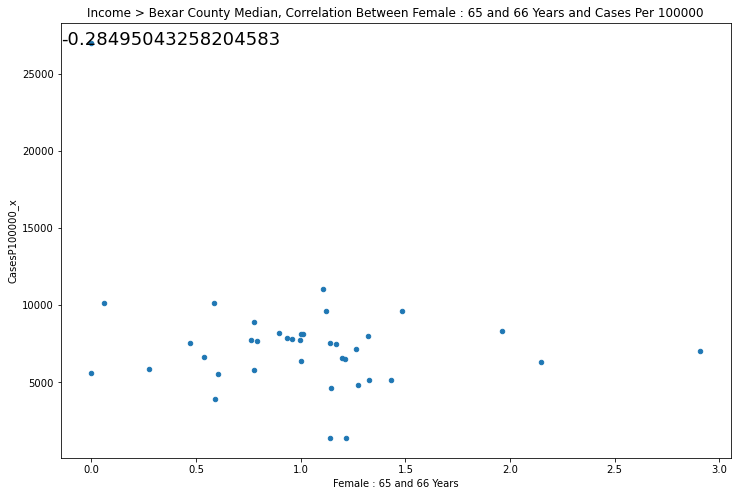

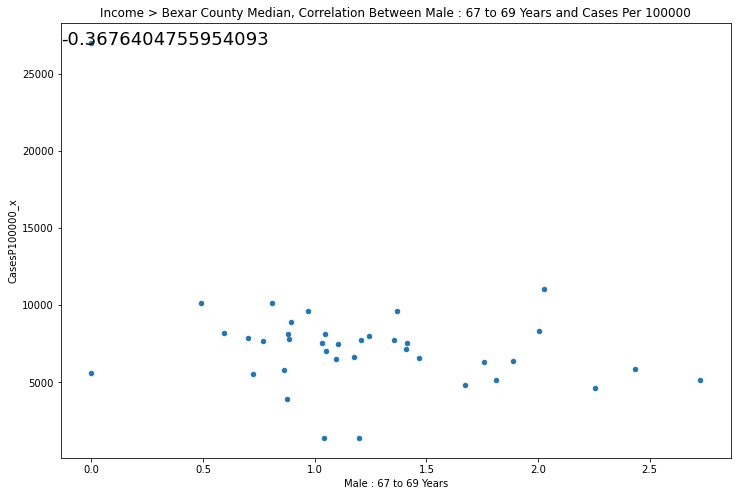

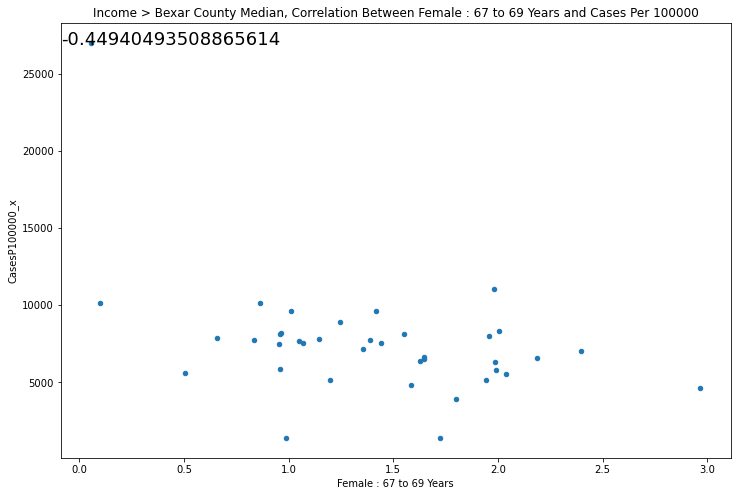

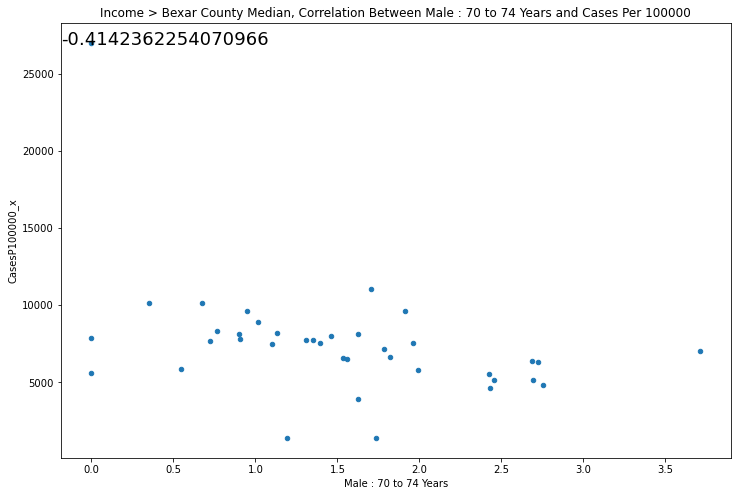

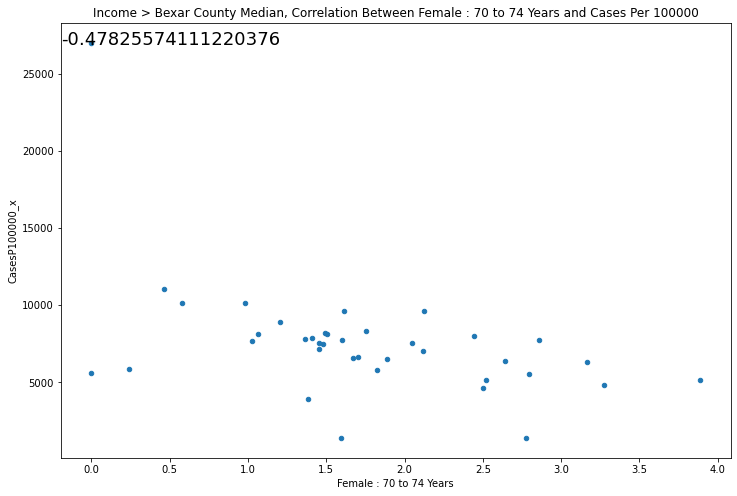

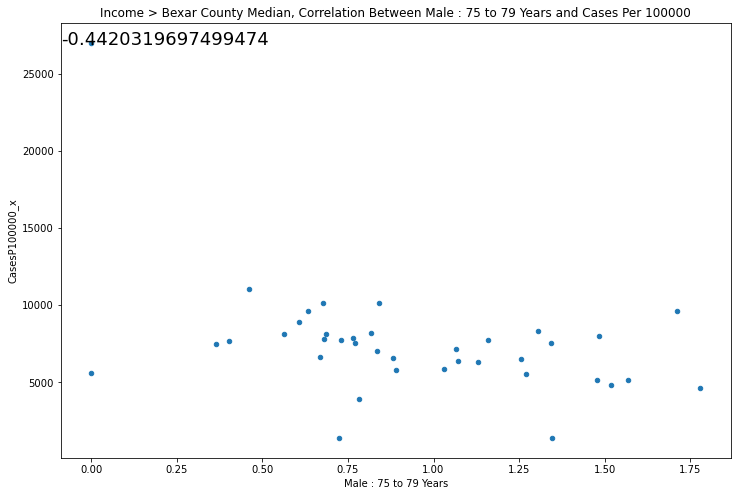

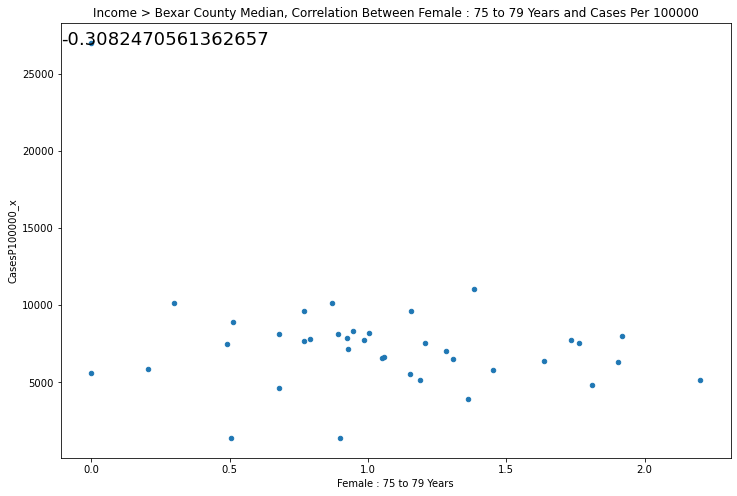

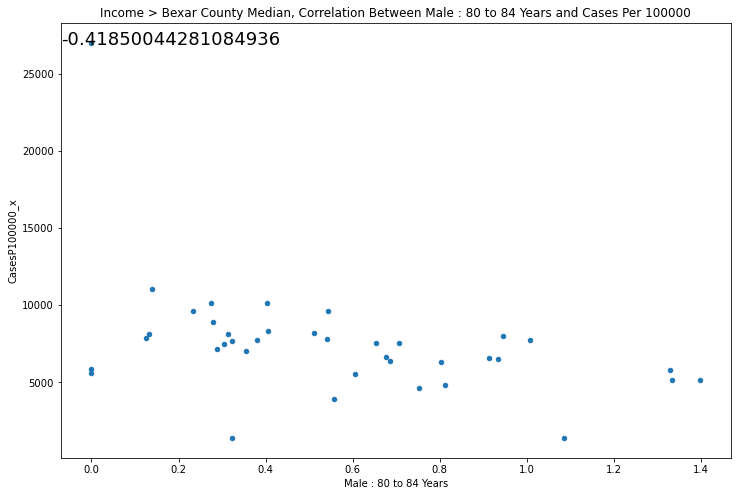

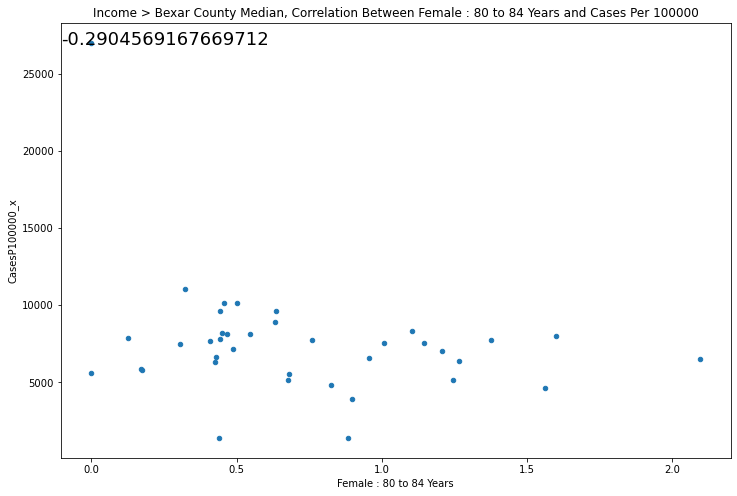

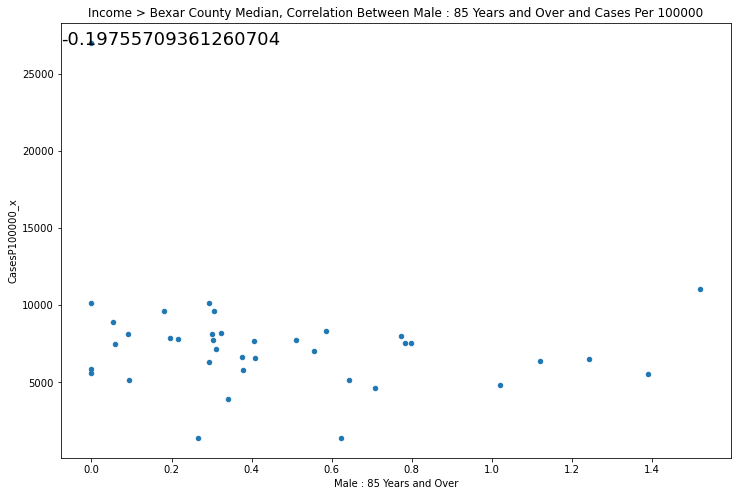

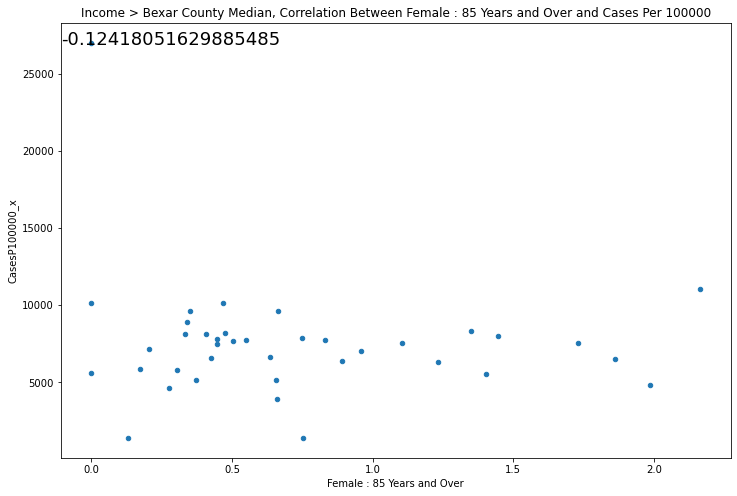

In [42]:
#Scatter plots for above median income
for element in age_list:
    age_abovemedian.plot.scatter(element,"CasesP100000_x", figsize = (12,8),title=f'Income > Bexar County Median, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(age_abovemedian[element],
                                 age_abovemedian["CasesP100000_x"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

### Age filtered by ethnicity

In [43]:
#merge left onto the filter to get data for only those zip codes
agepercentage_majhf = pd.DataFrame
ageperentage_majnhf = pd.DataFrame
agepercentage_majhf = pd.merge(majorityhispanic,age_percentage, on="ZipInt",how="left")
agepercentage_majnhf = pd.merge(majoritynonhispanic,age_percentage, on= 'ZipInt', how = 'left')

#remove  JBSA zipcode 78150 
agepercentage_majnhf = agepercentage_majnhf.drop(8)

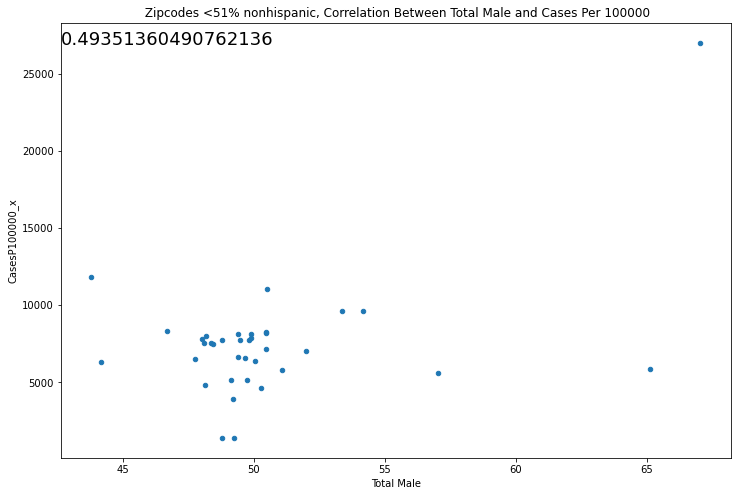

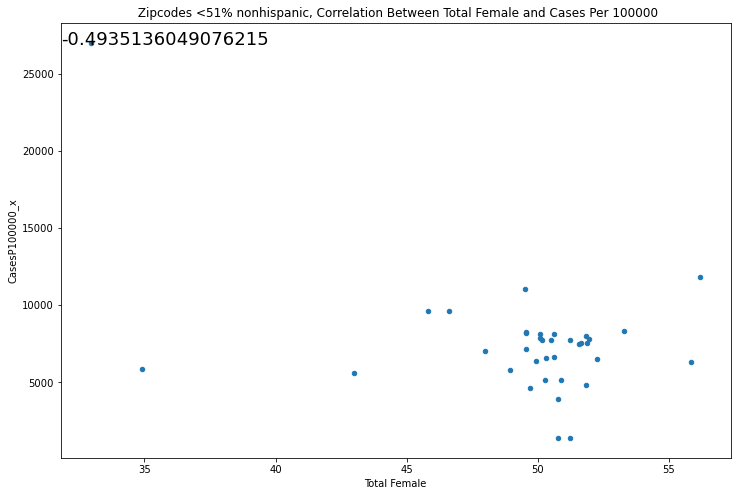

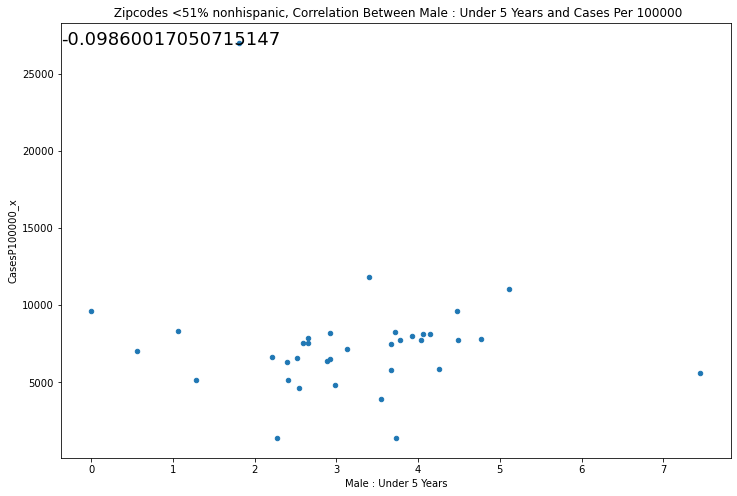

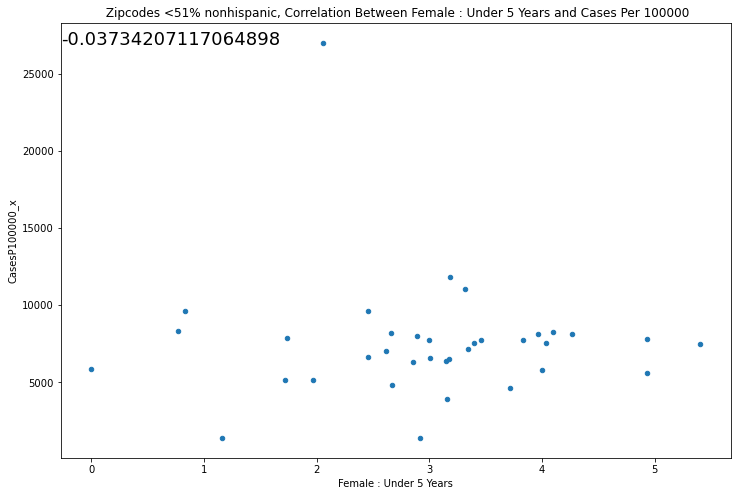

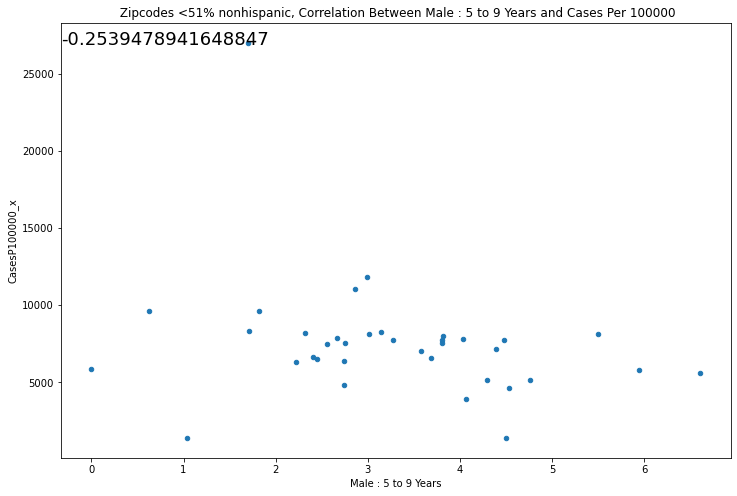

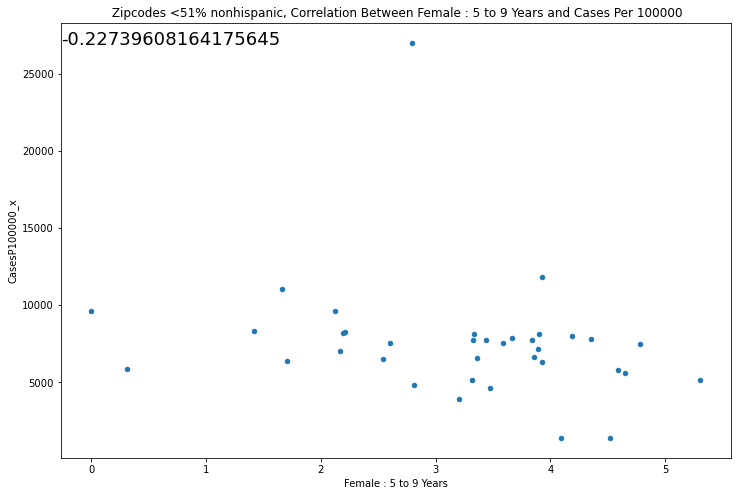

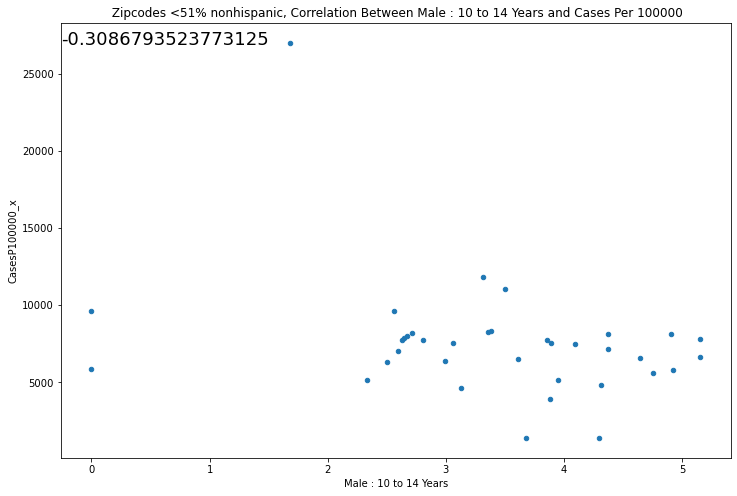

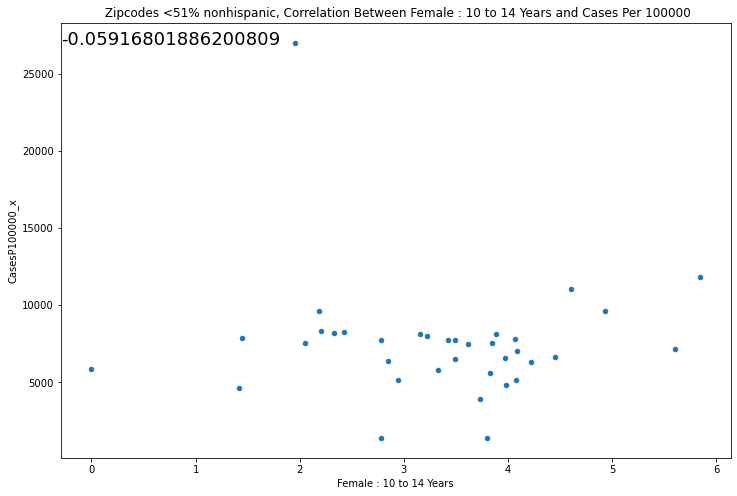

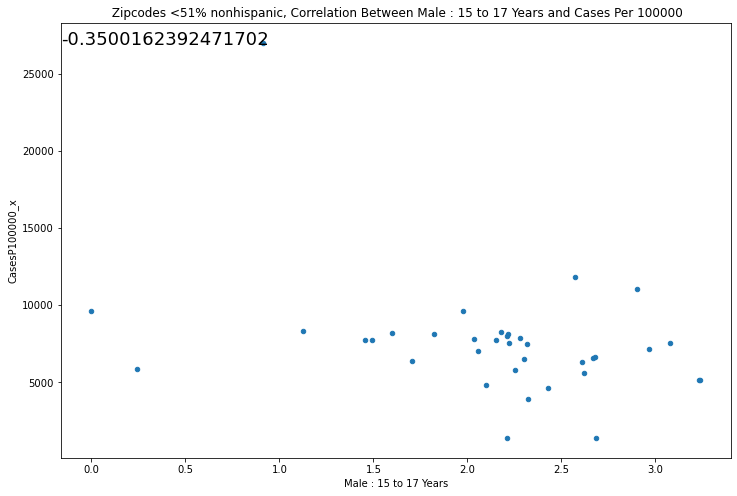

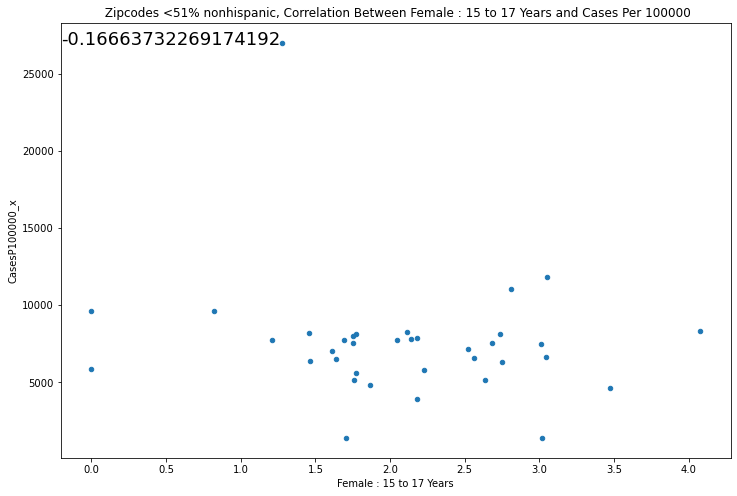

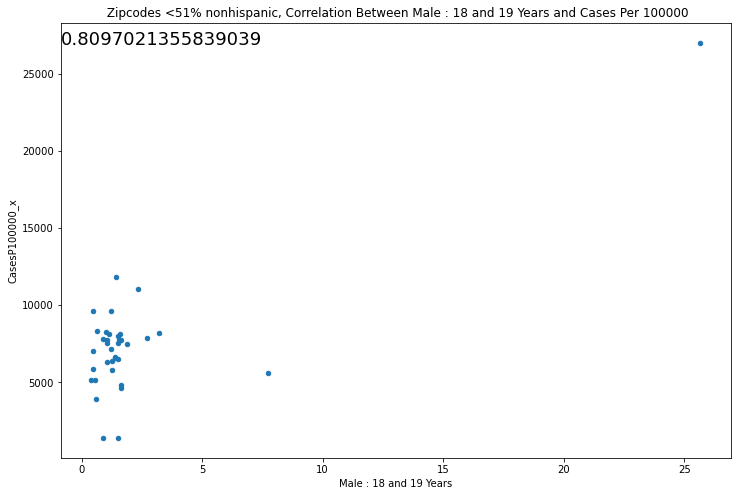

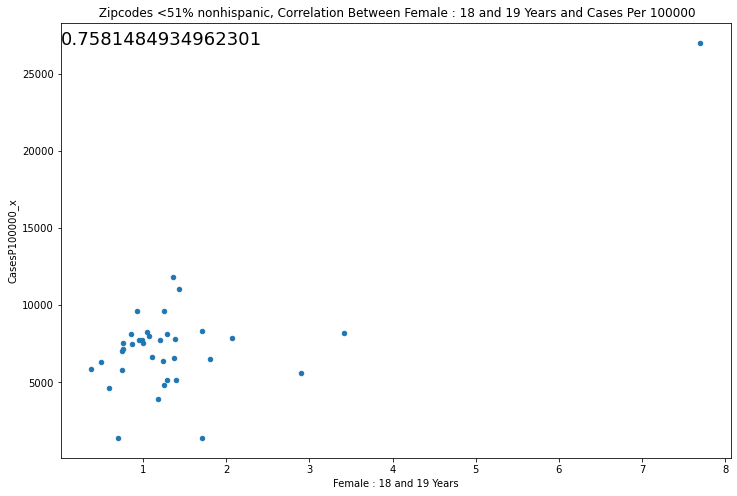

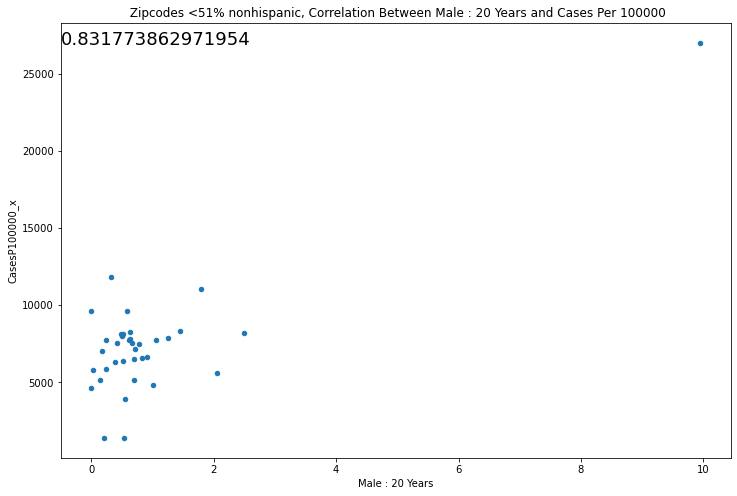

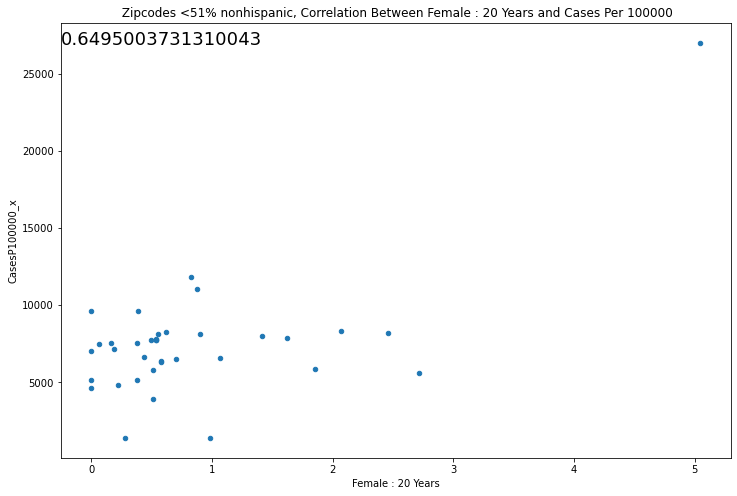

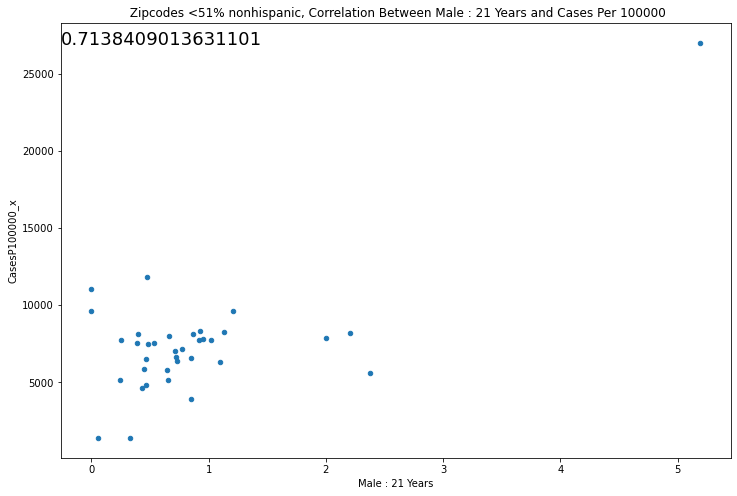

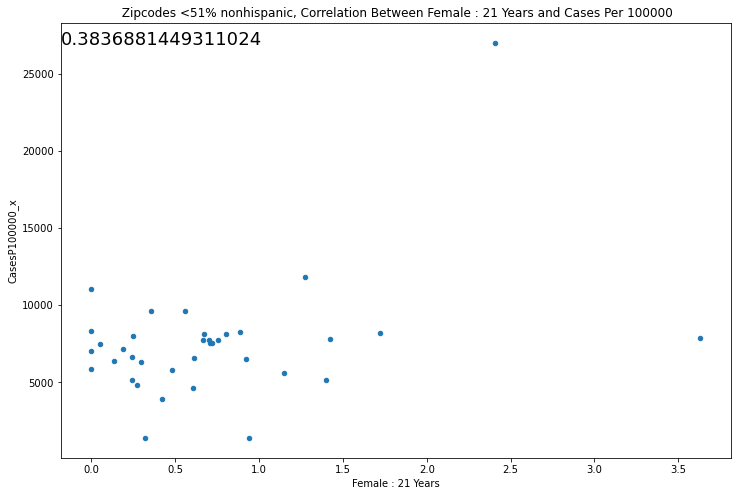

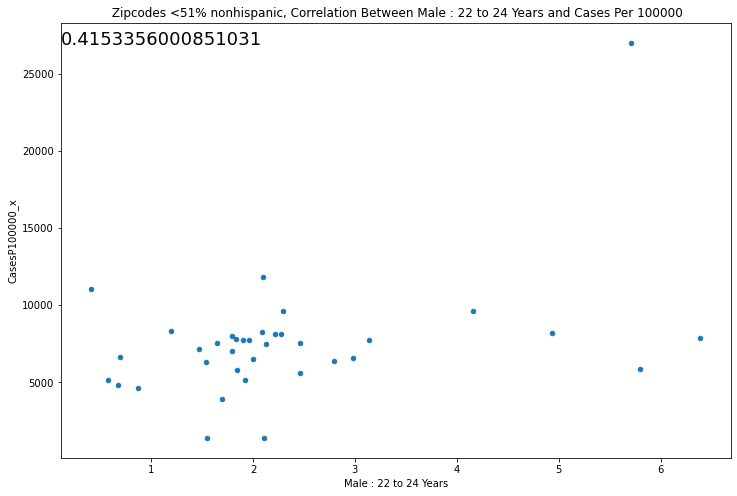

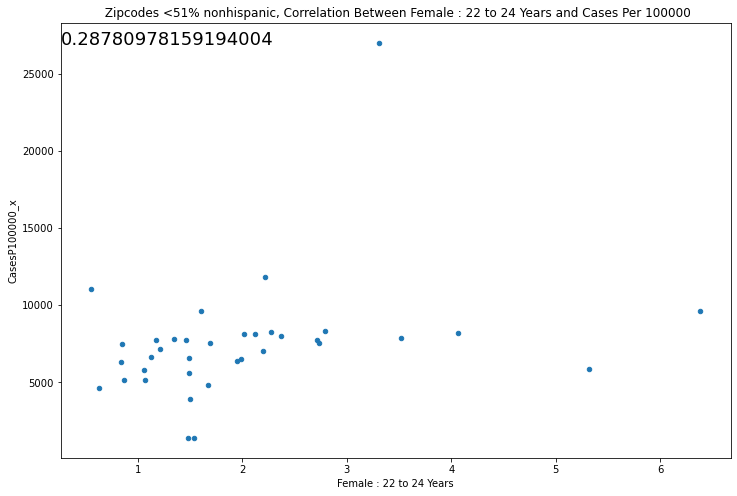

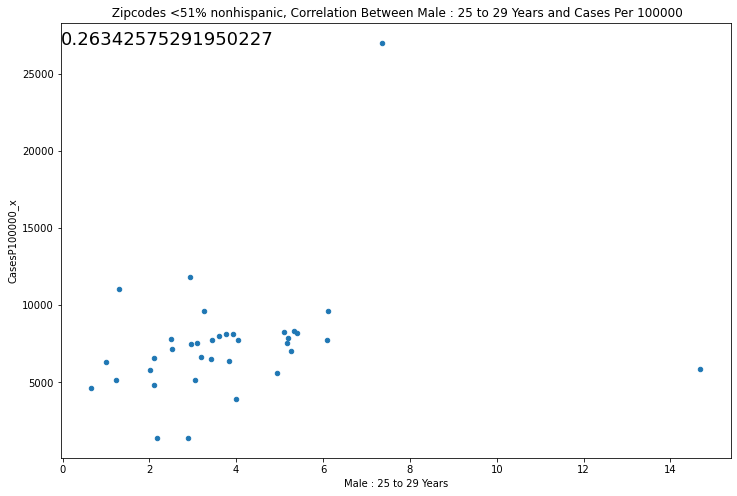

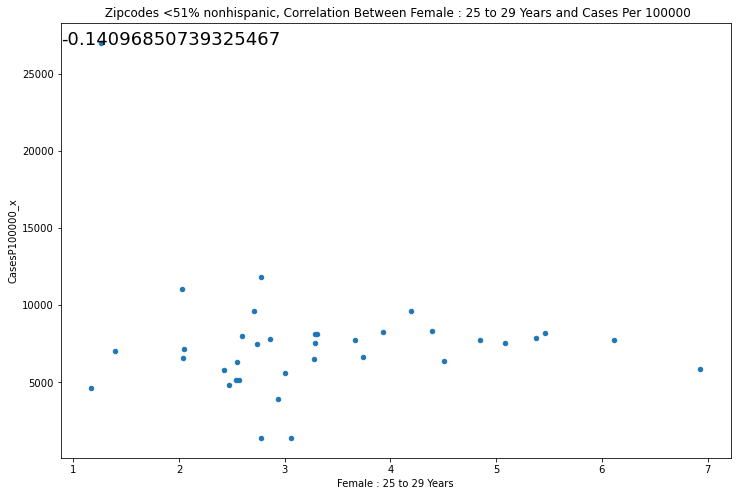

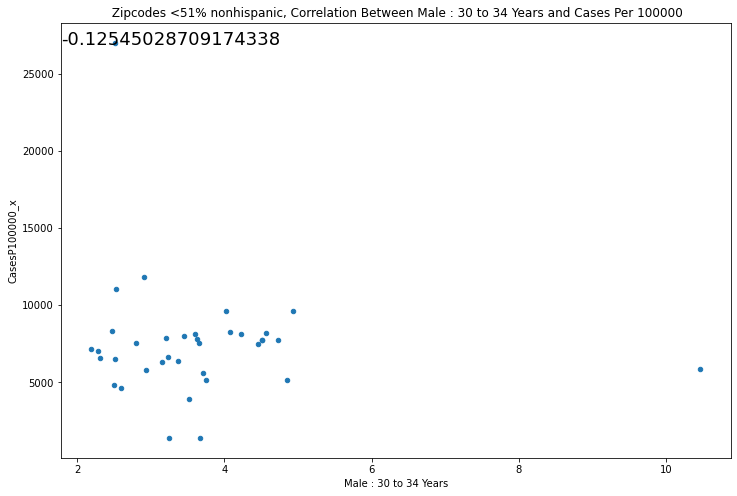

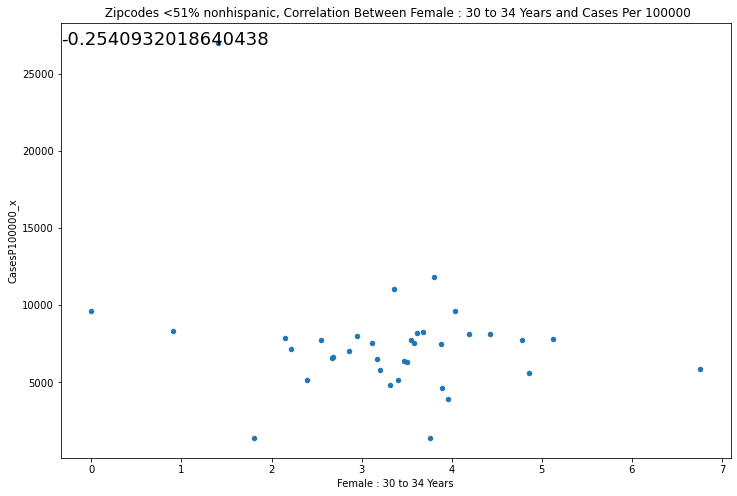

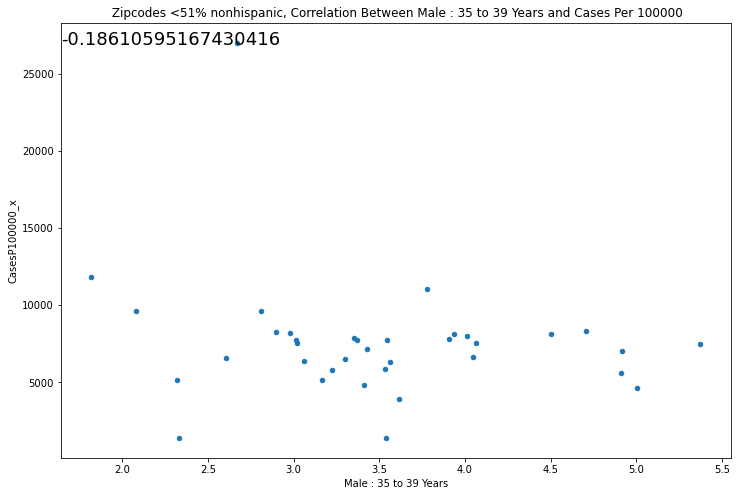

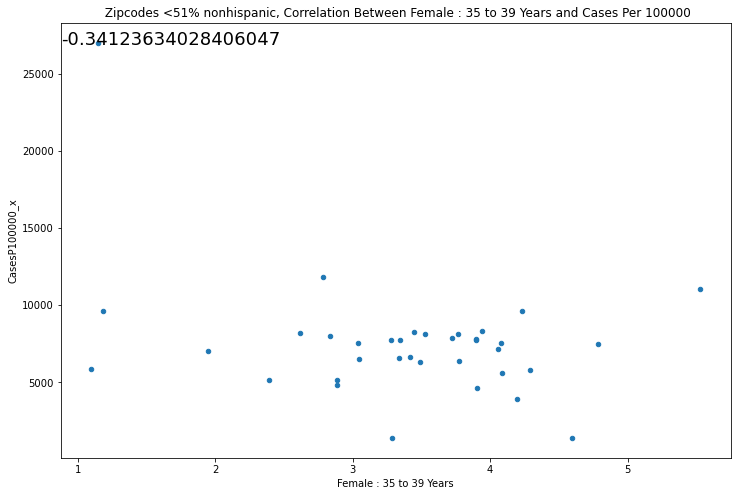

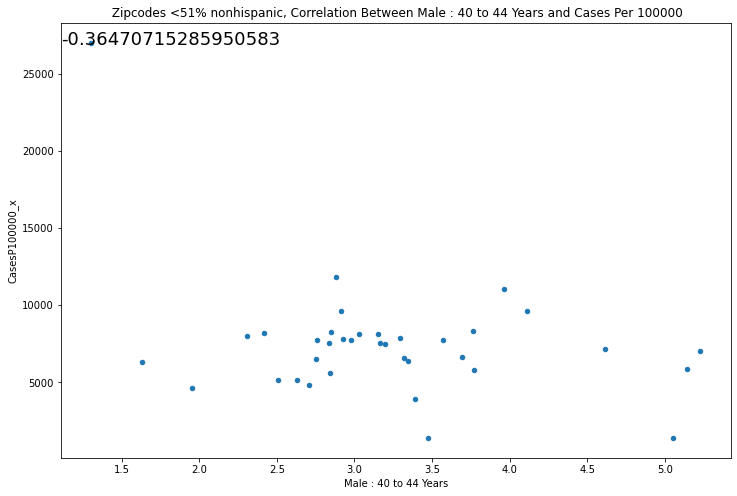

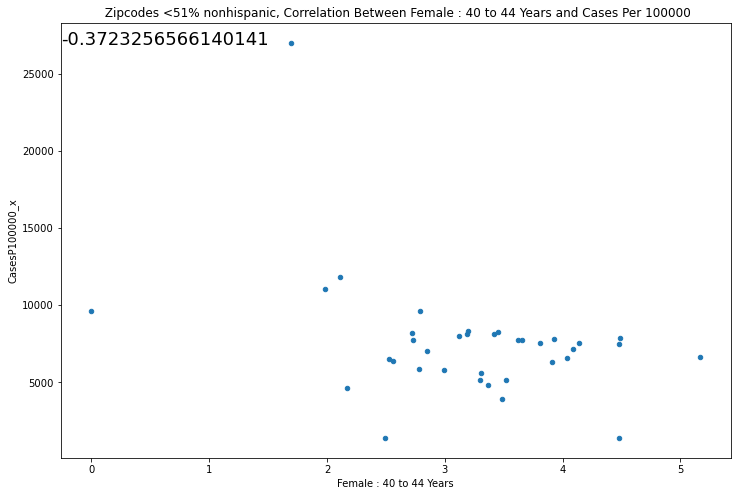

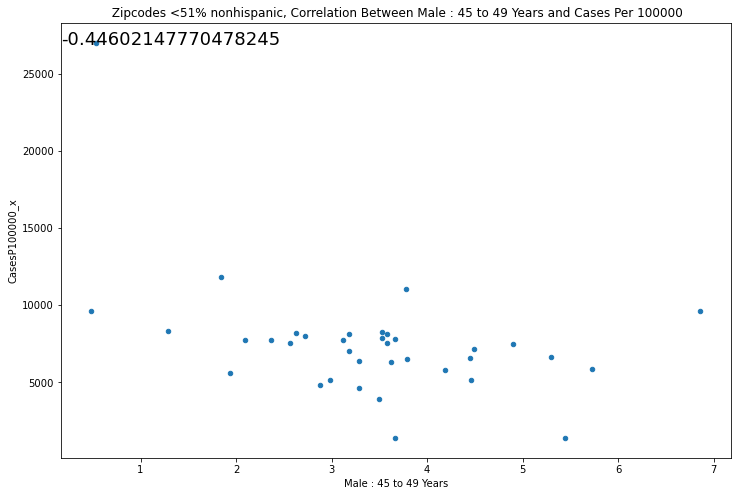

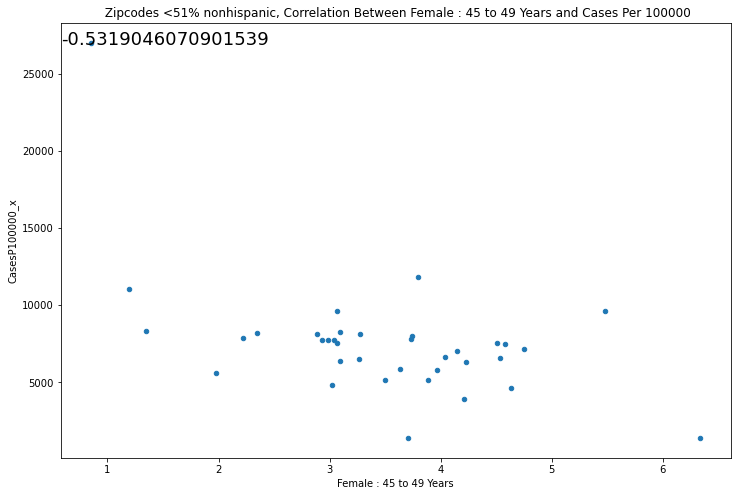

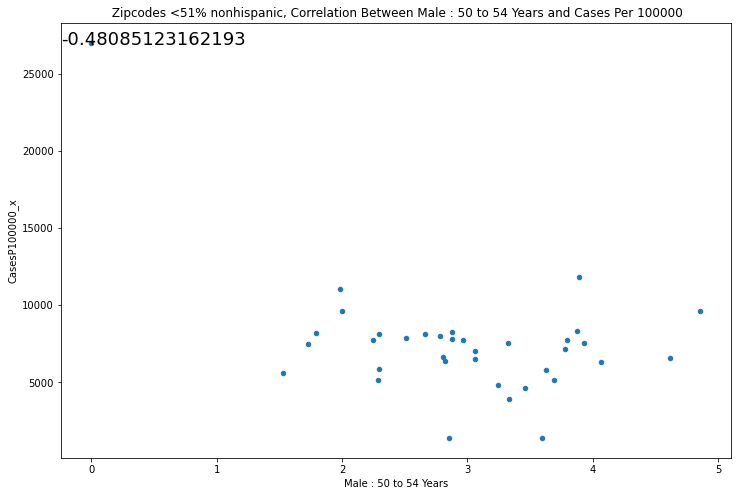

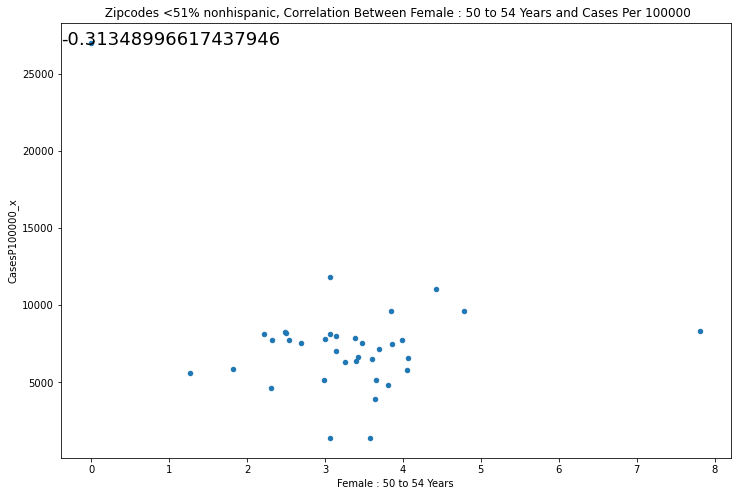

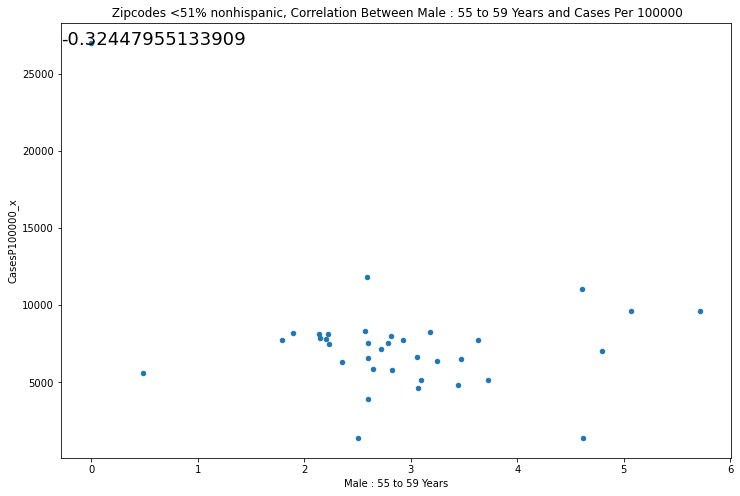

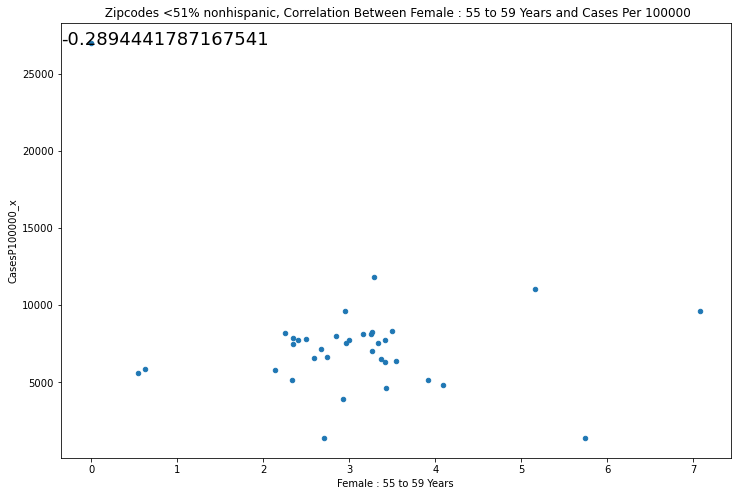

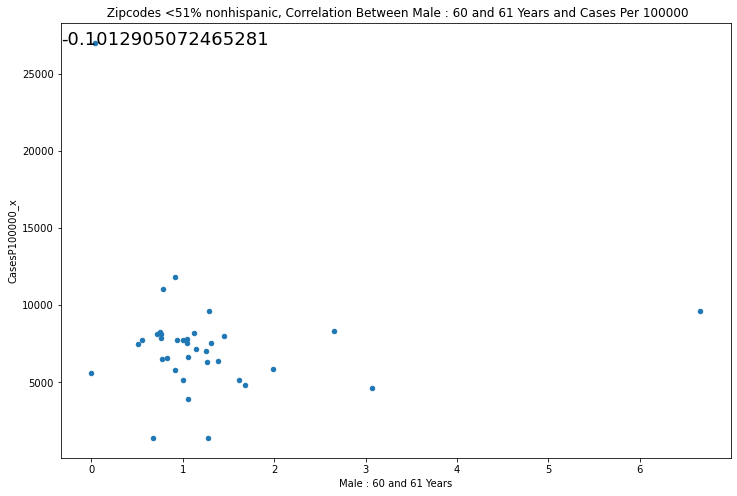

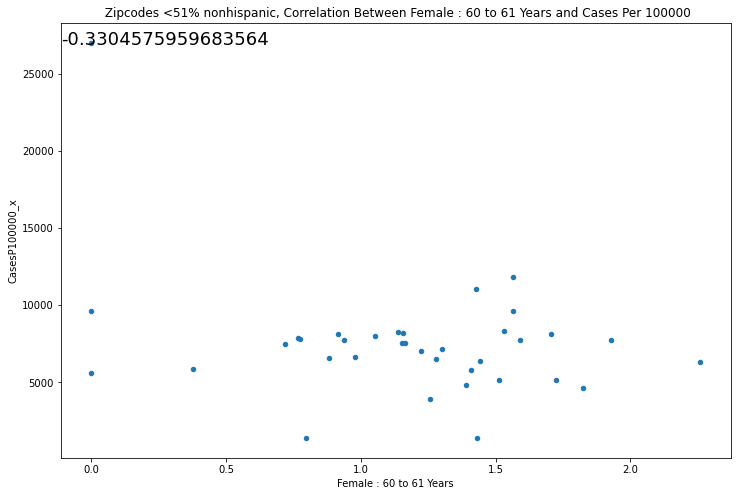

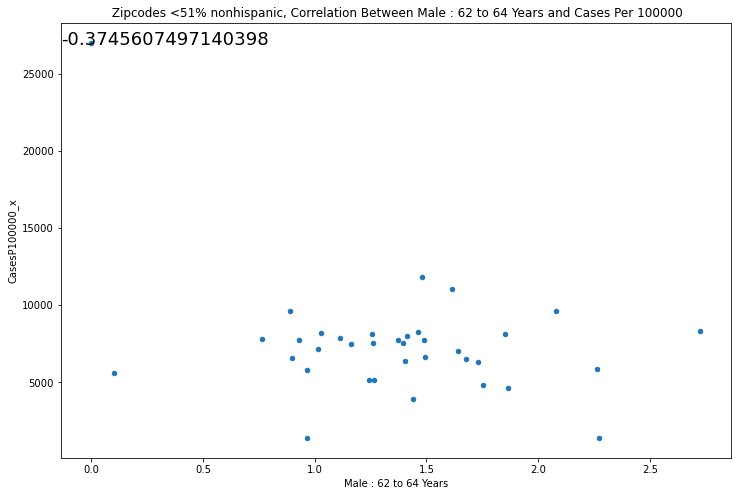

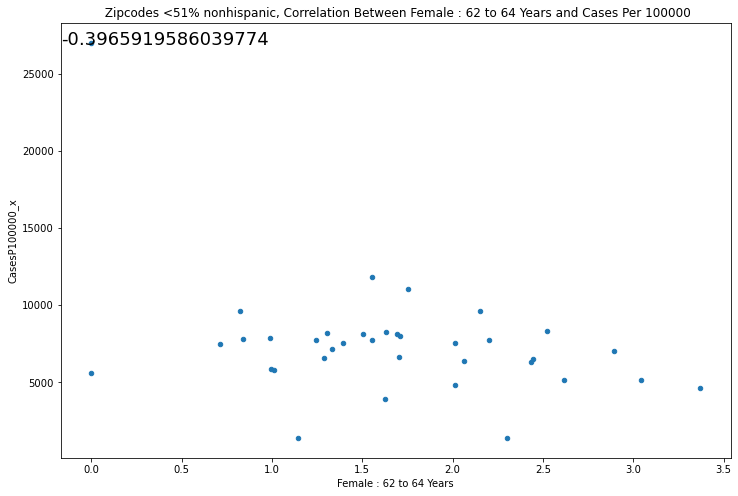

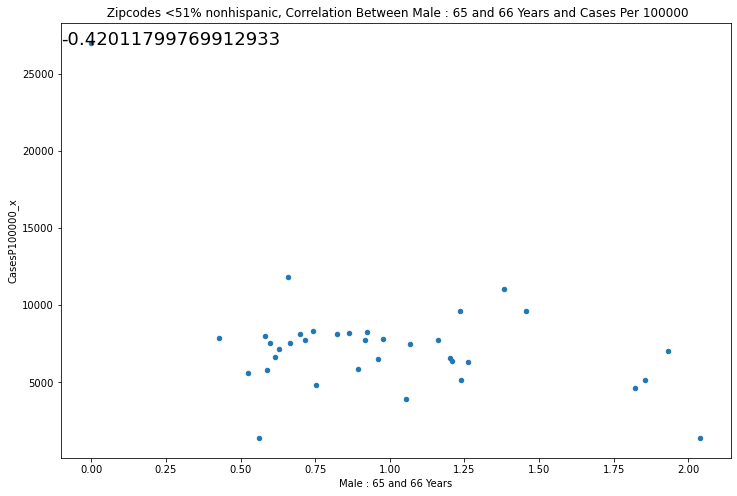

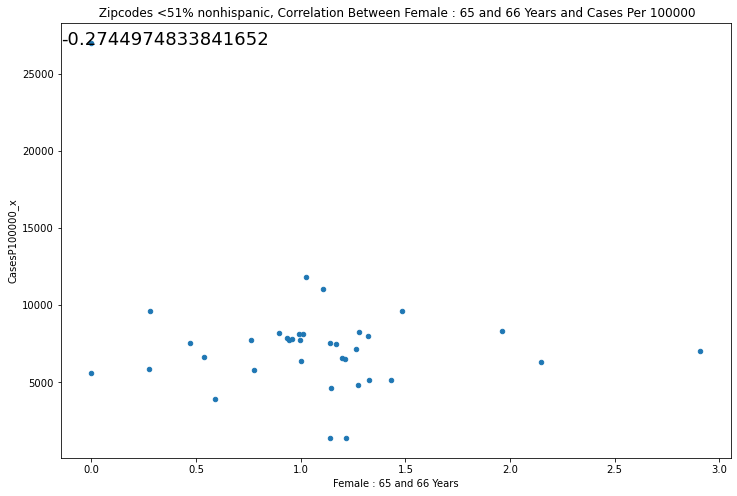

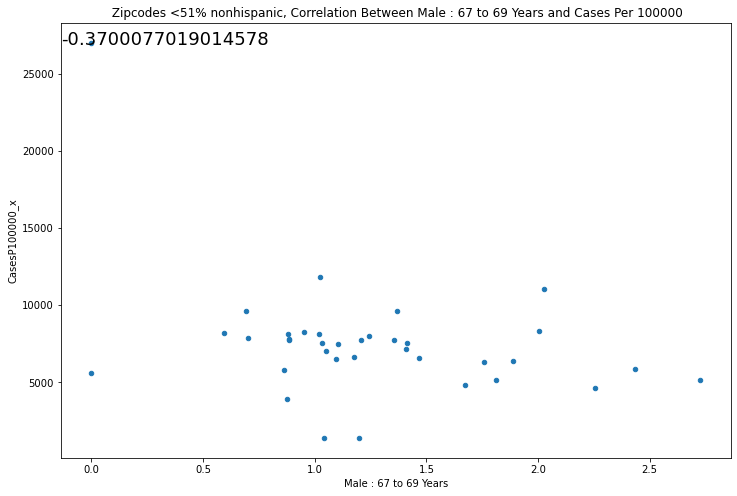

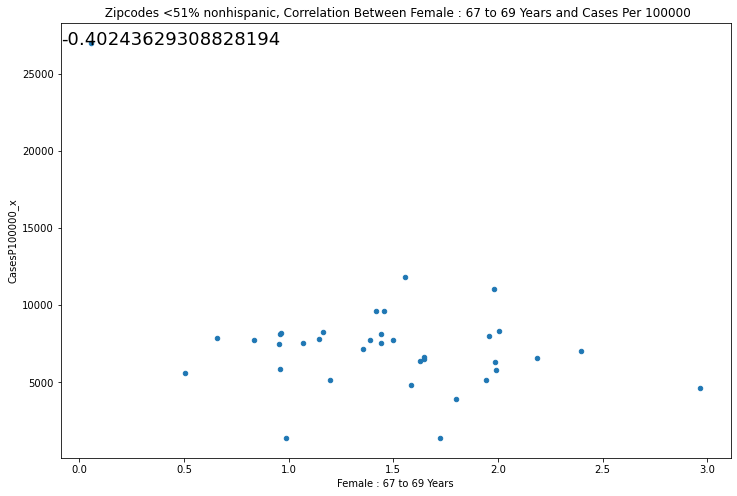

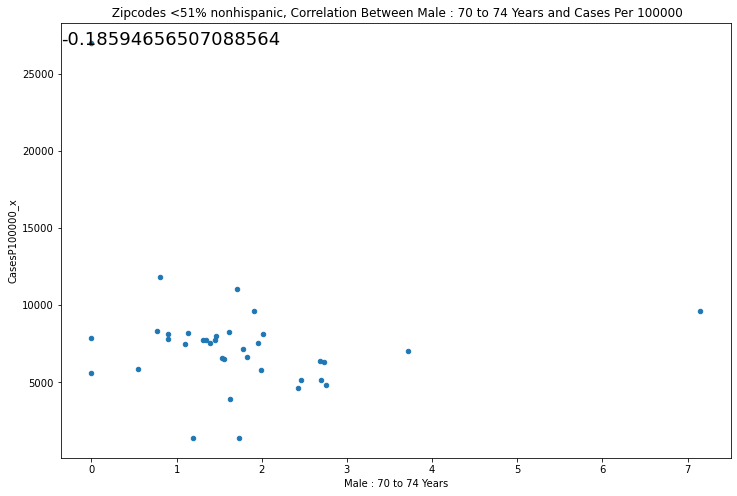

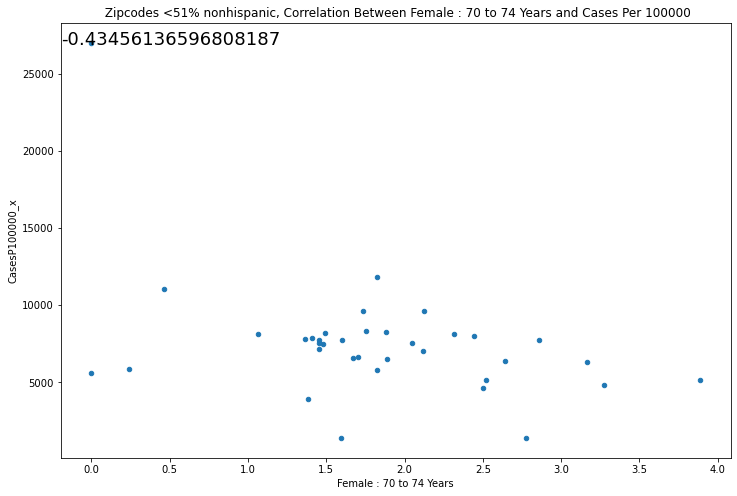

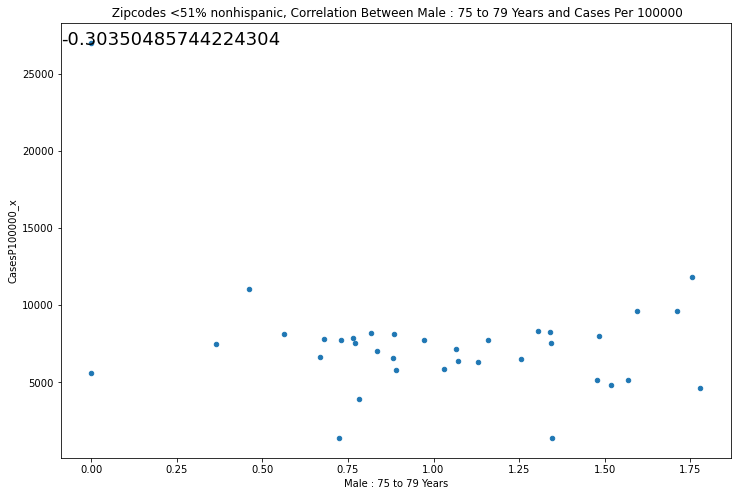

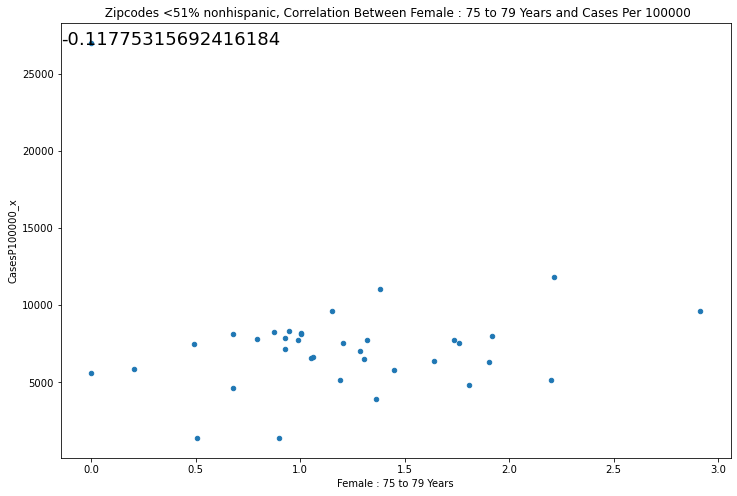

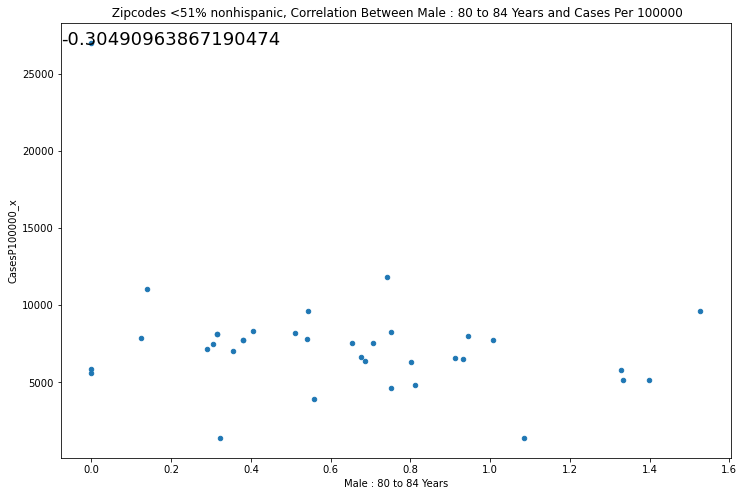

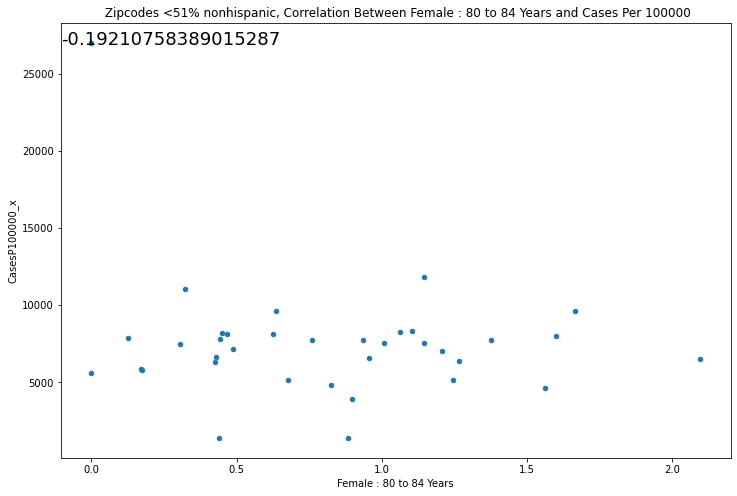

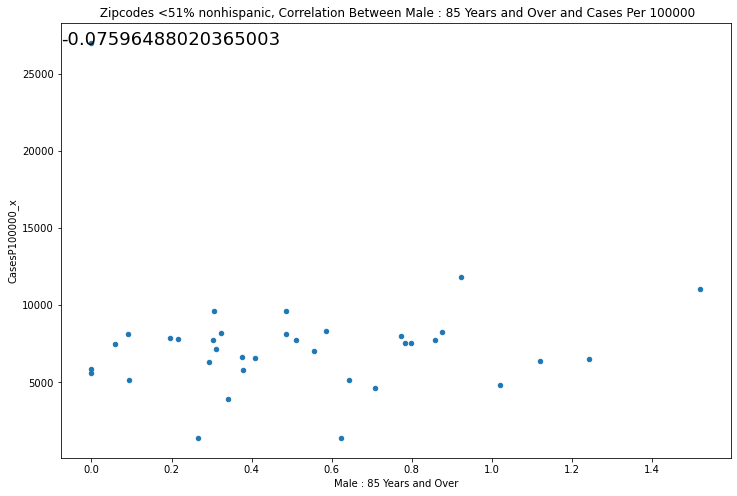

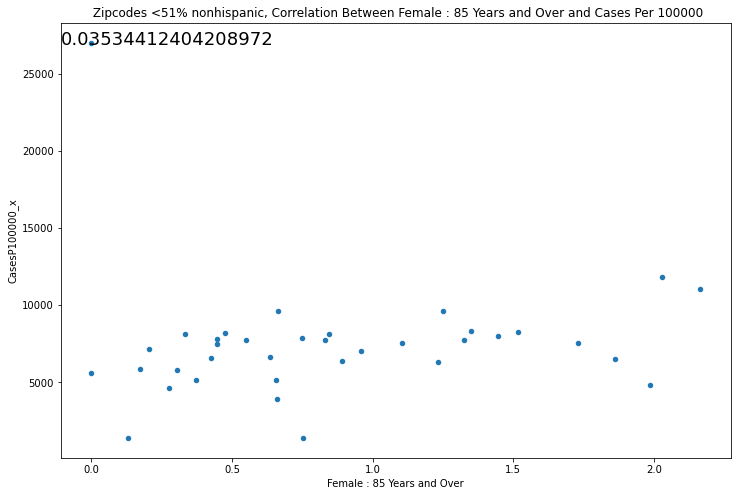

In [44]:
# Scatter plots for majority nonhispanic zipcodes
for element in age_list:
    agepercentage_majnhf.plot.scatter(element,"CasesP100000_x", figsize = (12,8),title=f' Zipcodes <51% nonhispanic, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(agepercentage_majnhf[element],
                                 agepercentage_majnhf["CasesP100000_x"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

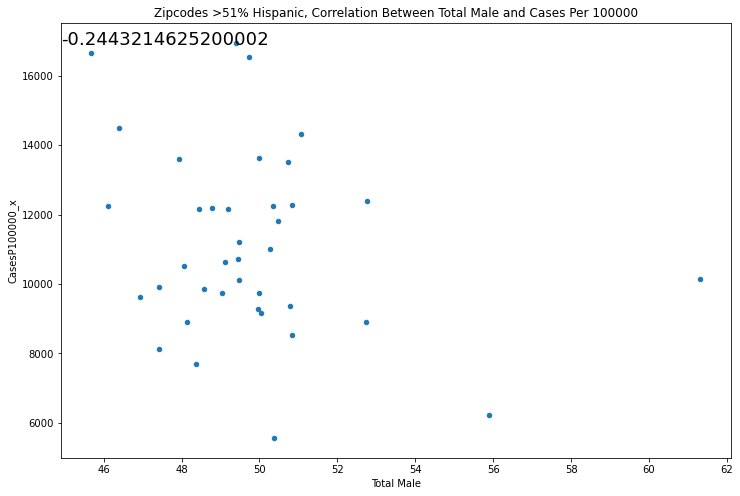

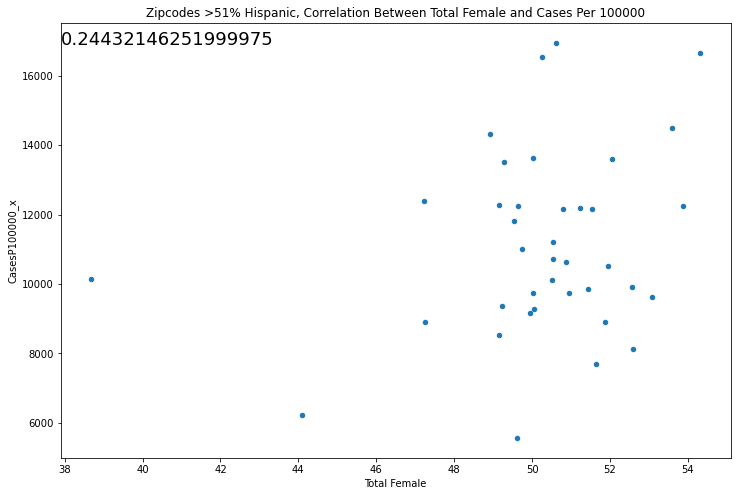

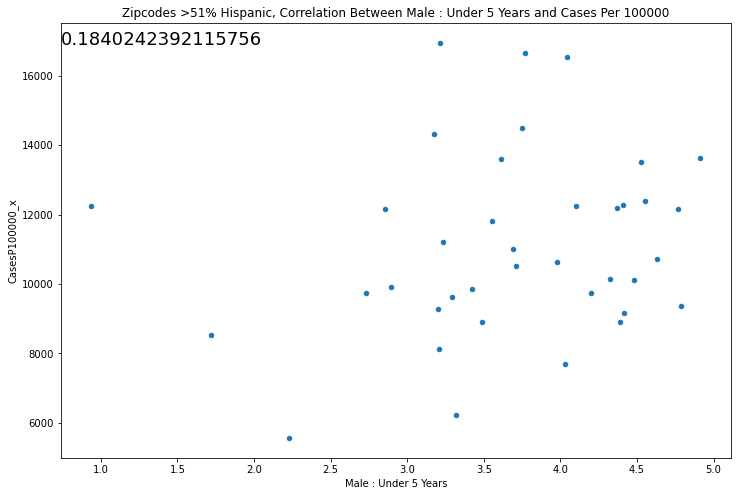

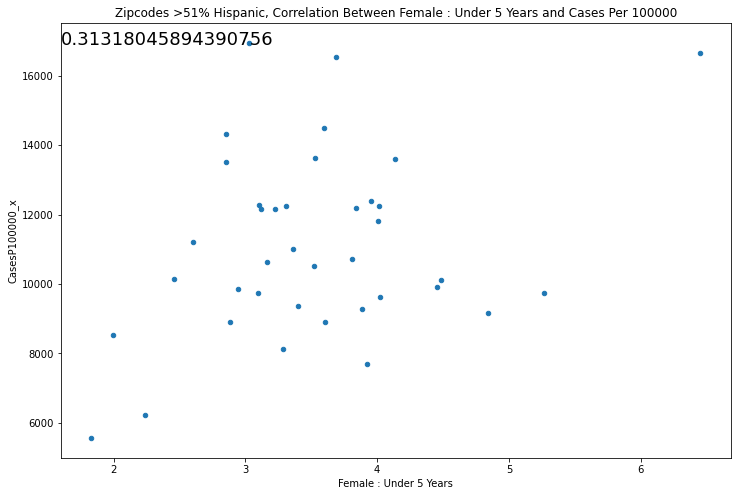

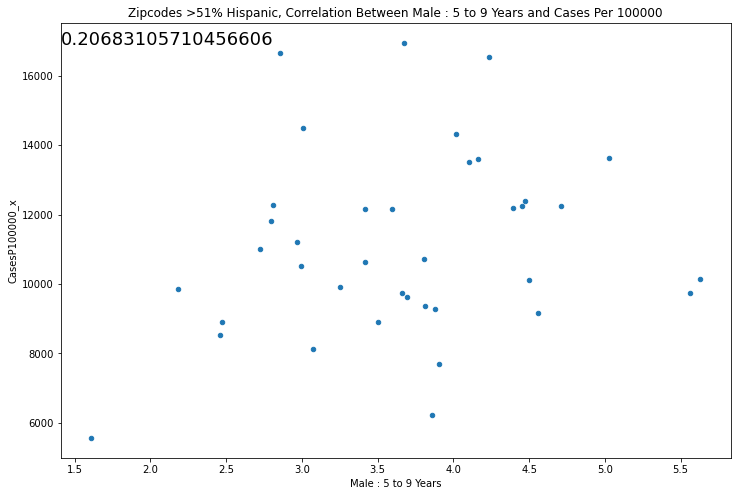

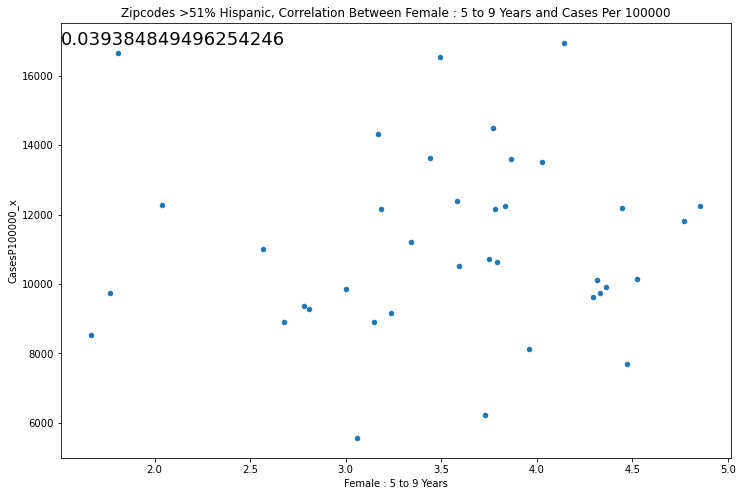

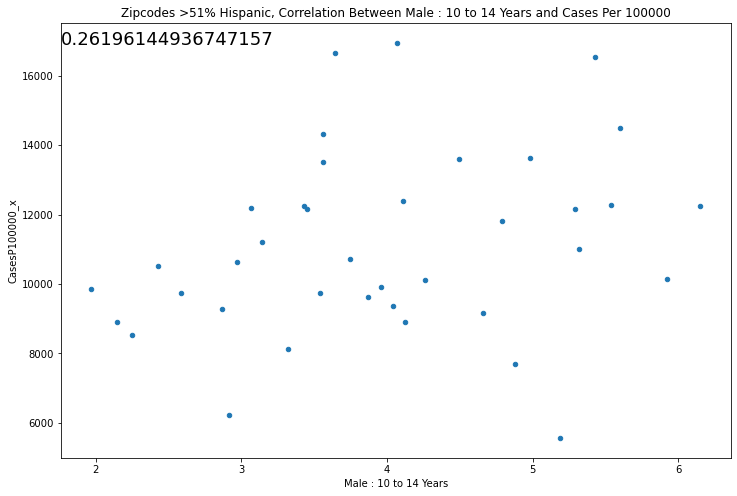

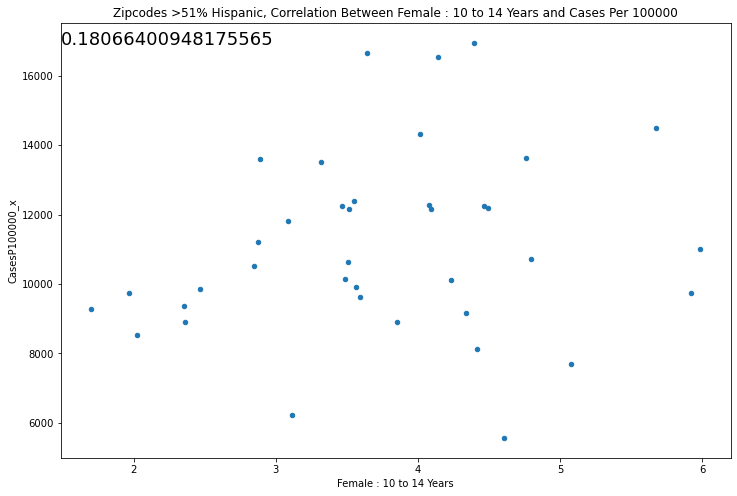

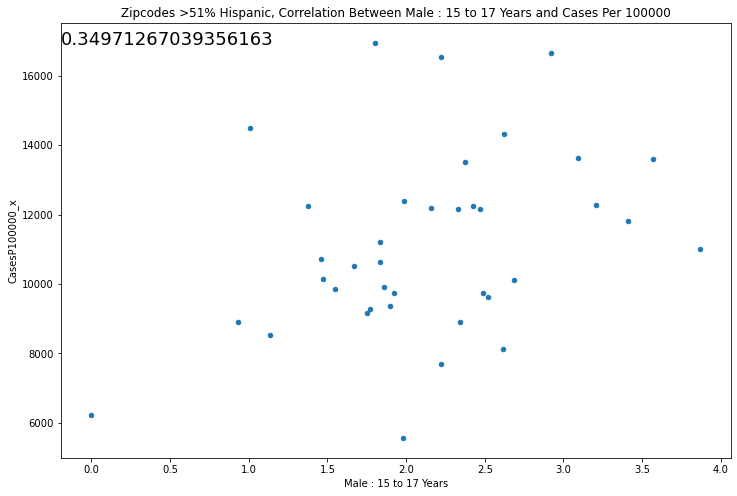

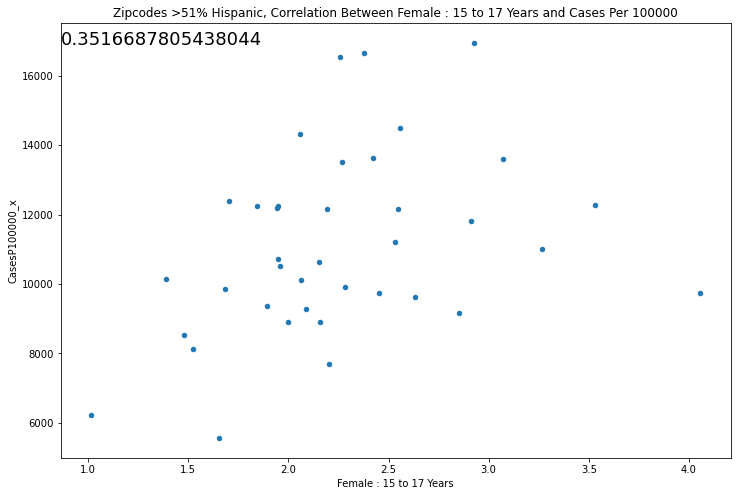

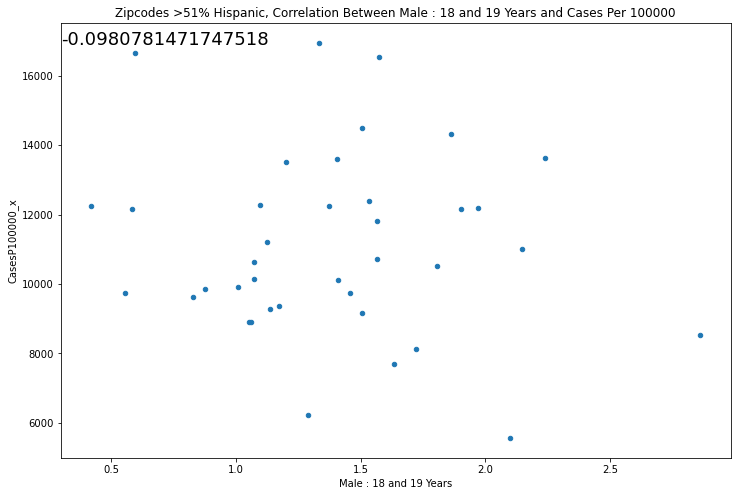

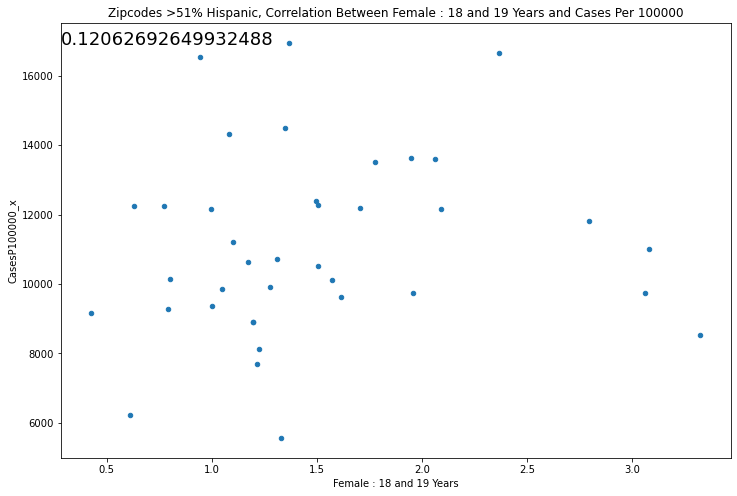

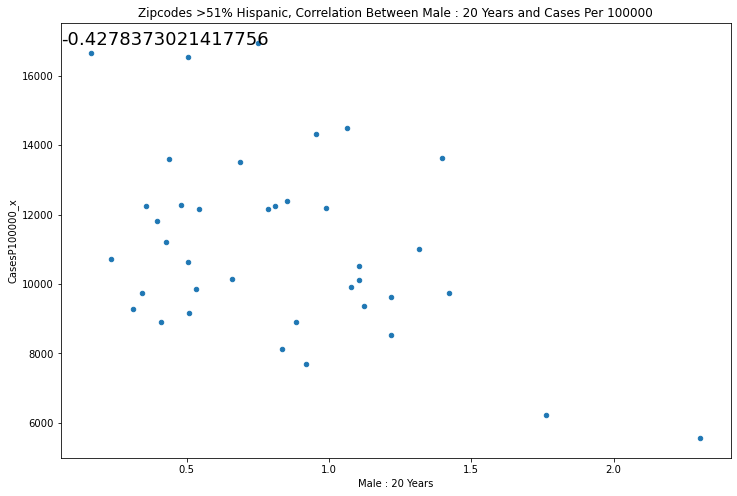

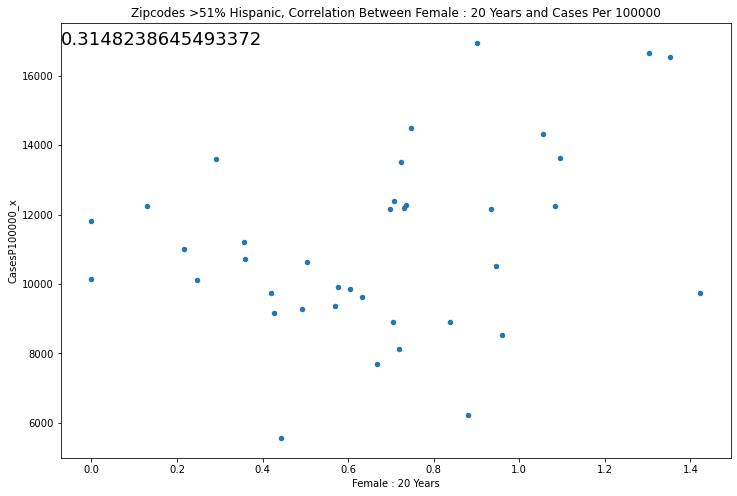

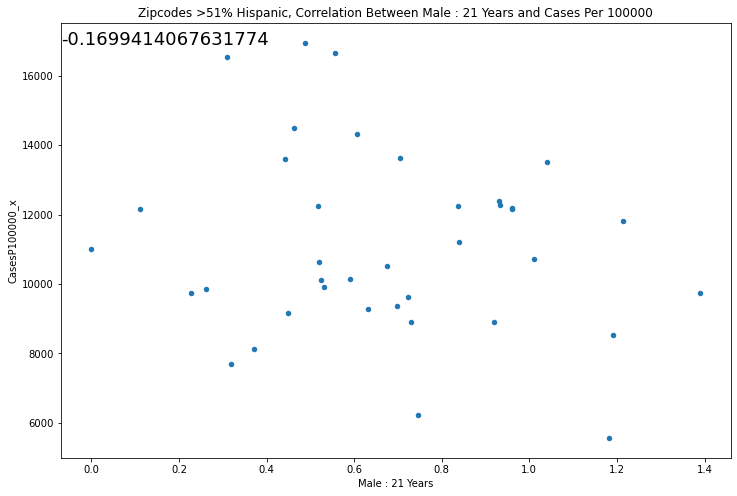

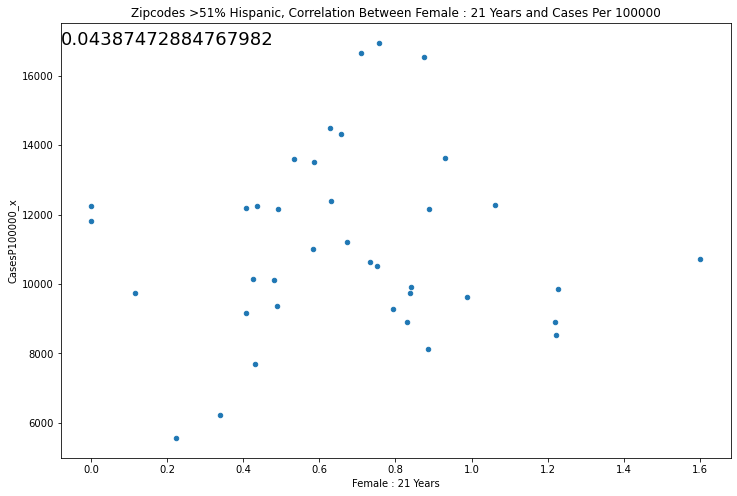

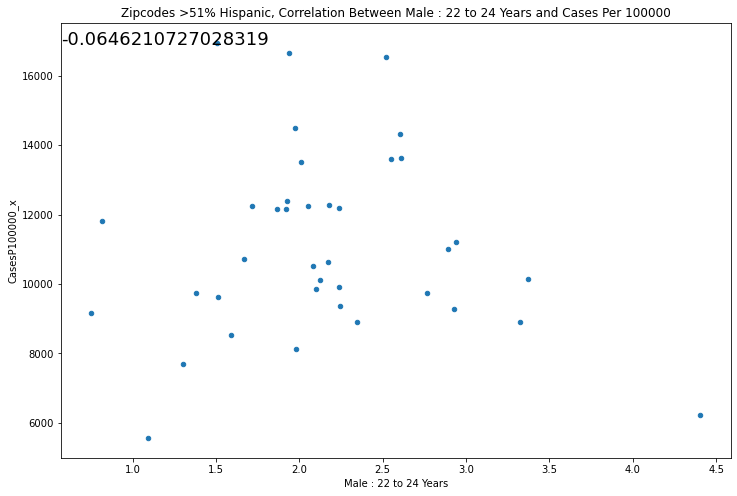

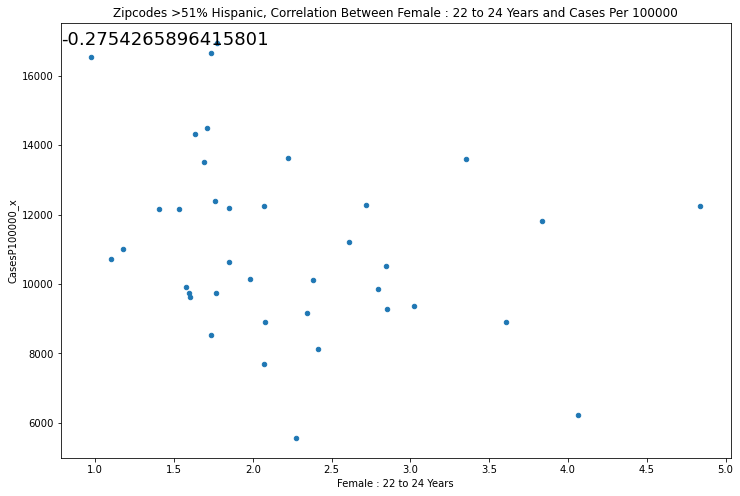

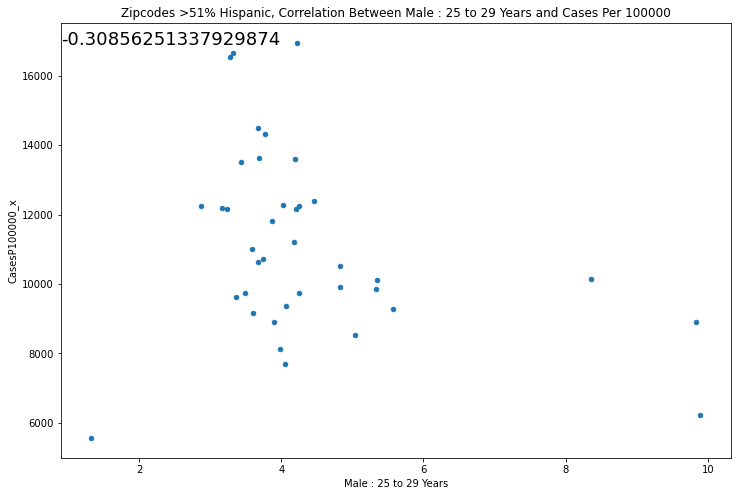

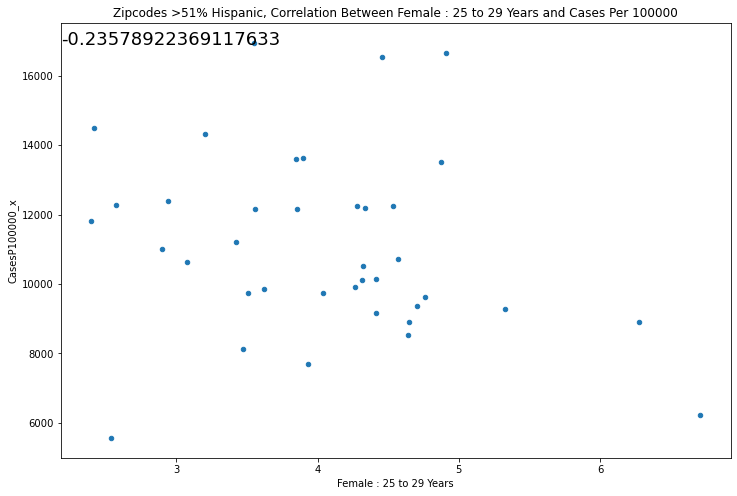

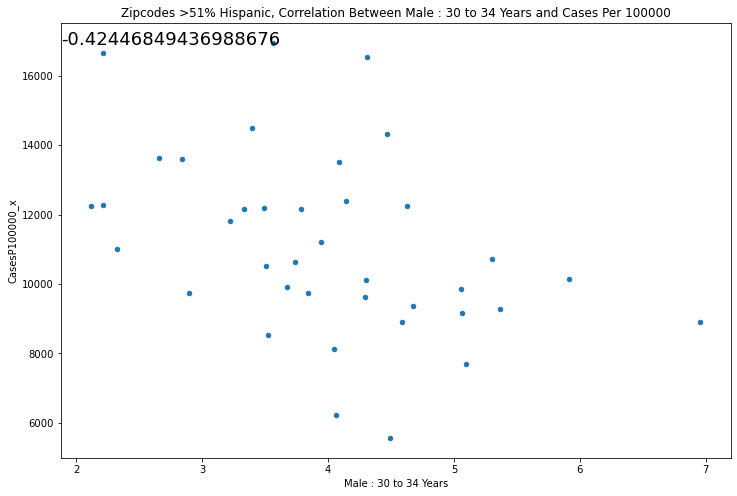

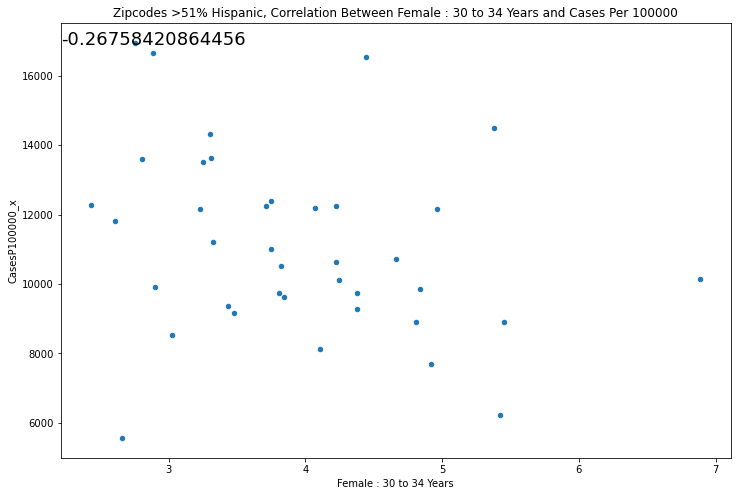

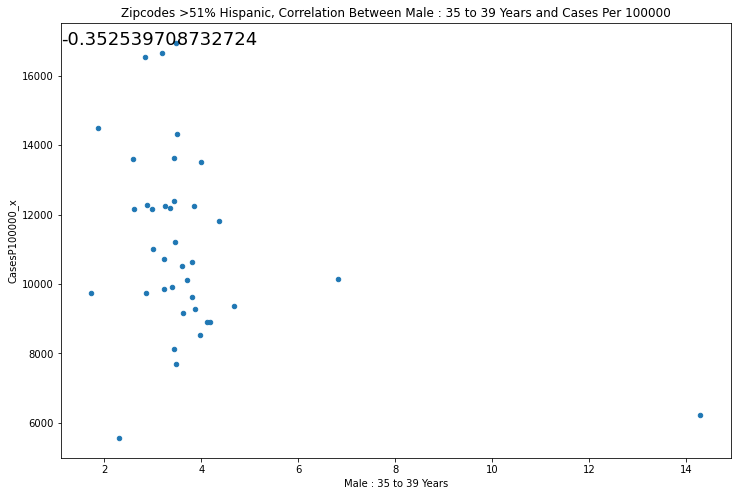

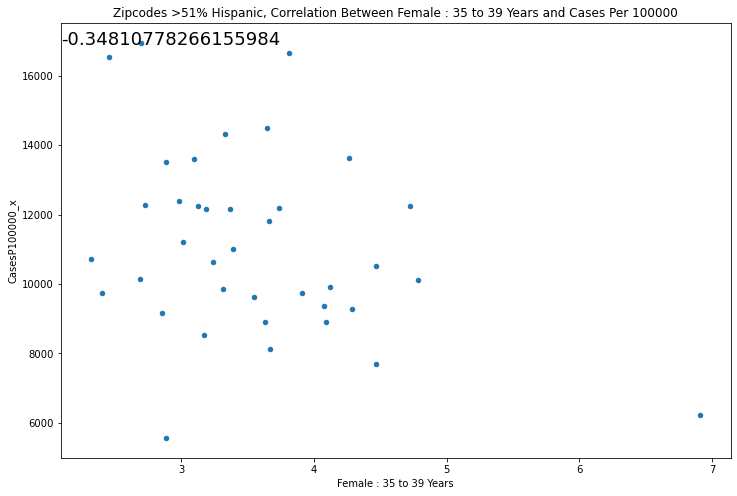

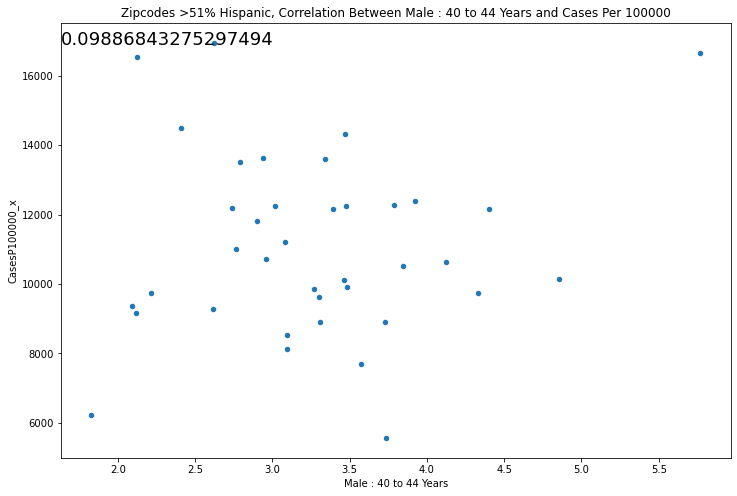

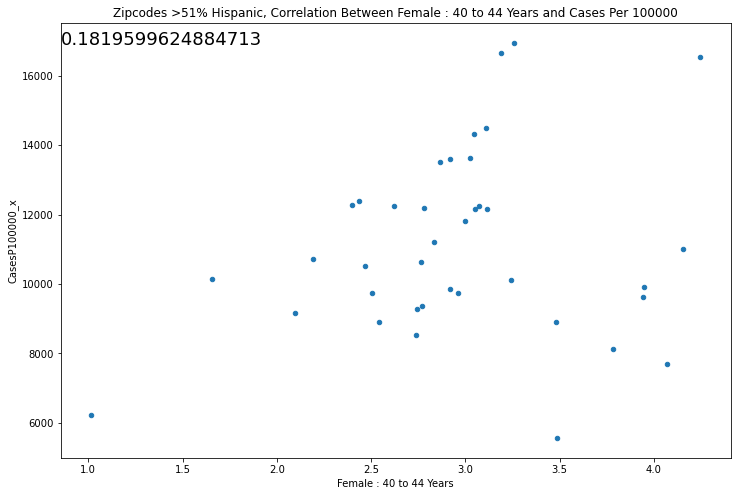

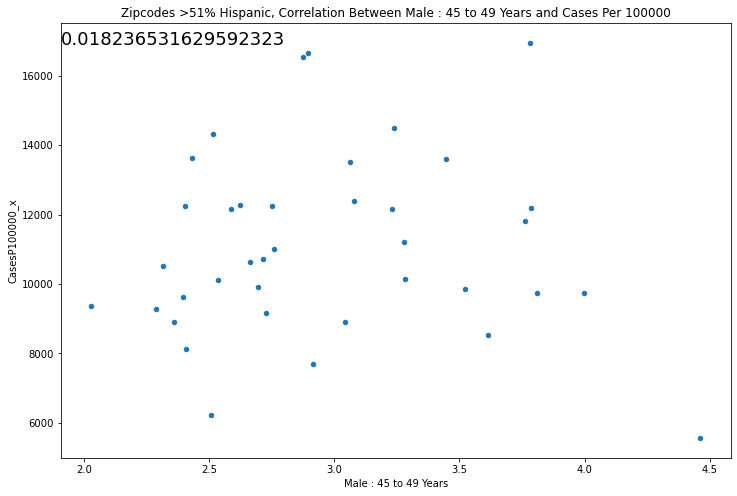

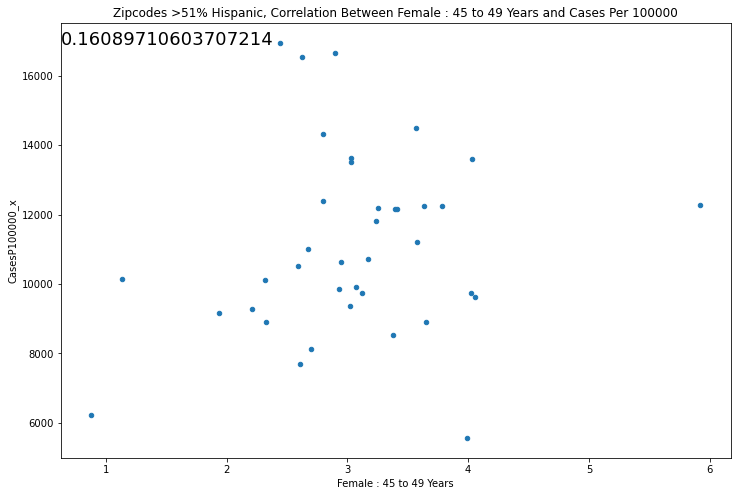

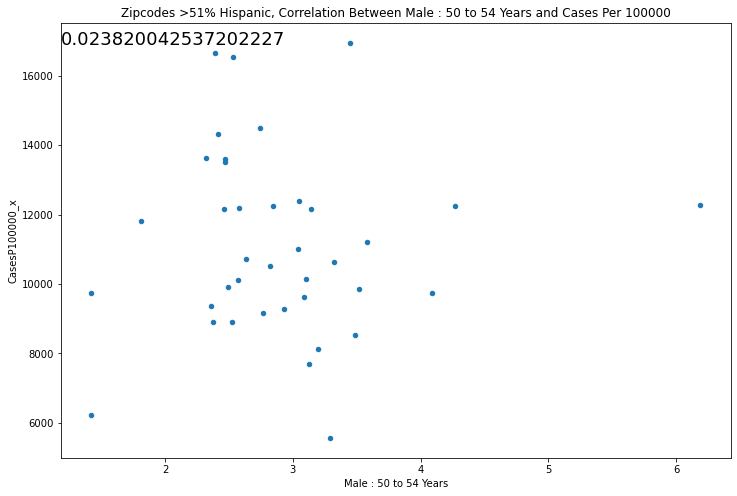

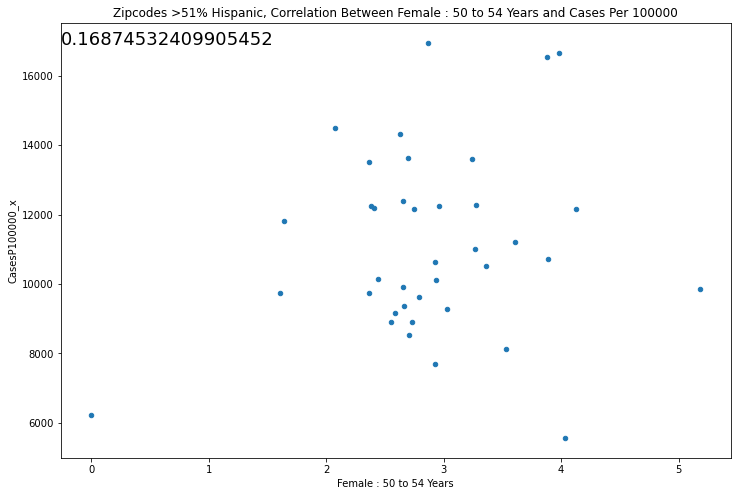

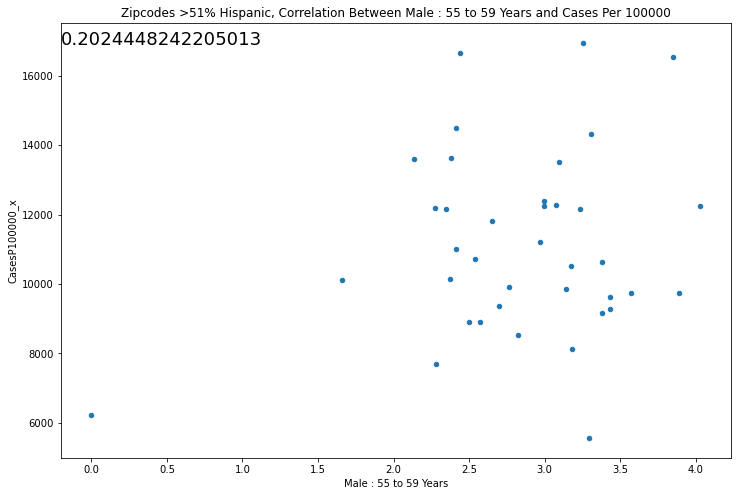

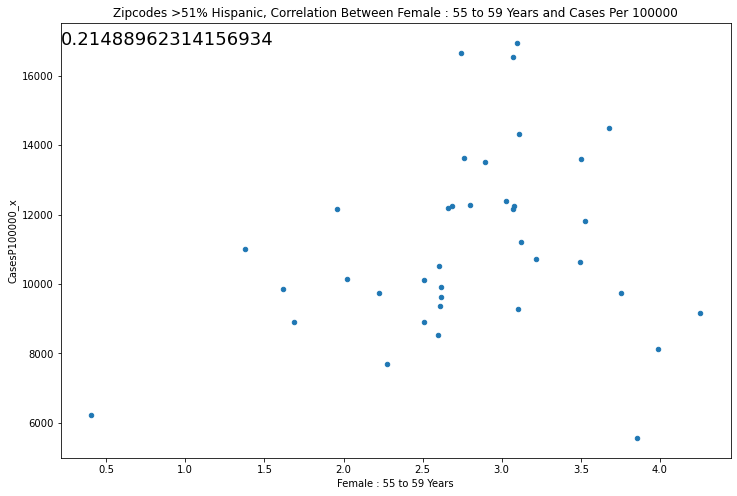

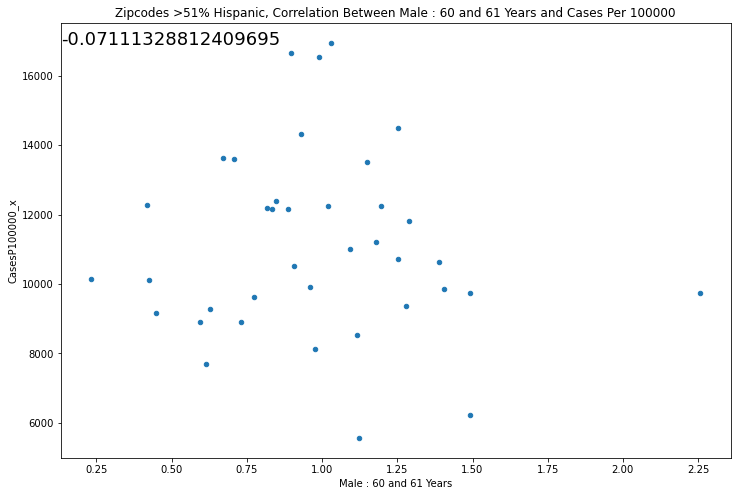

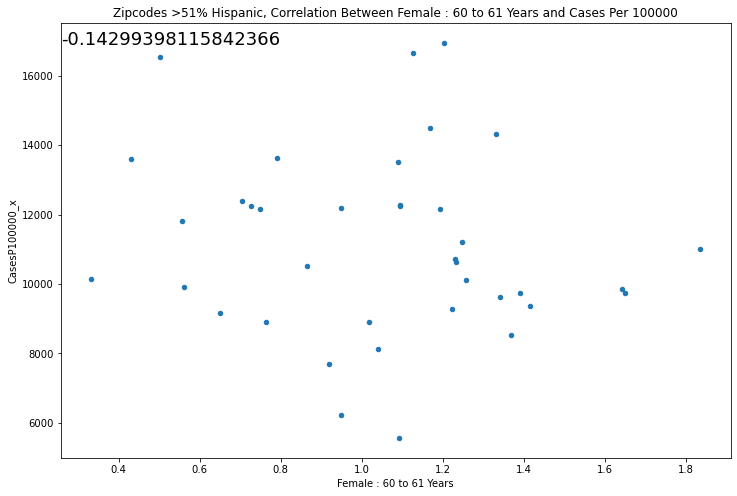

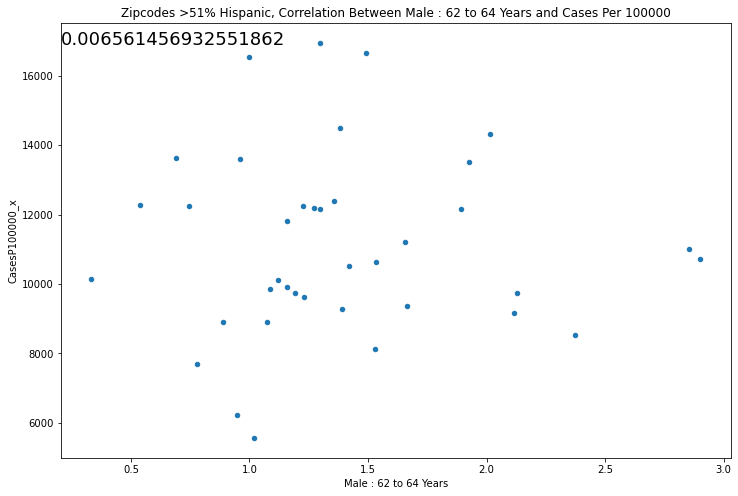

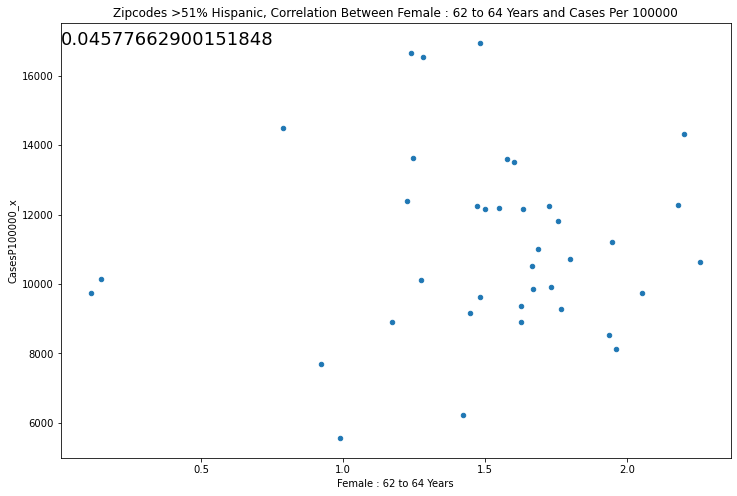

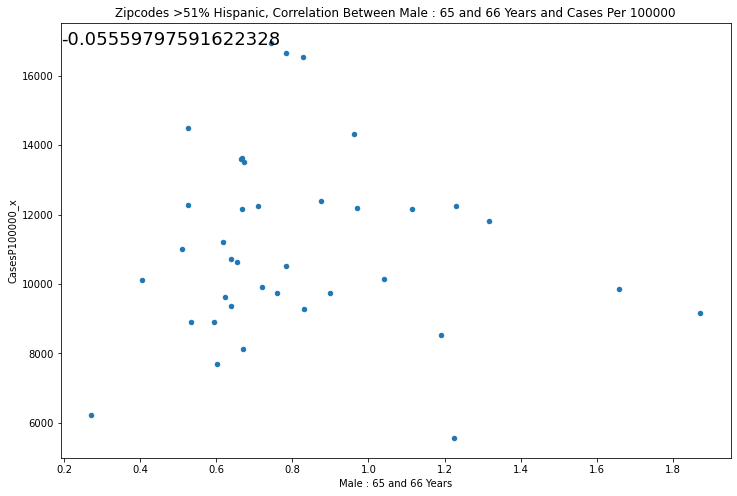

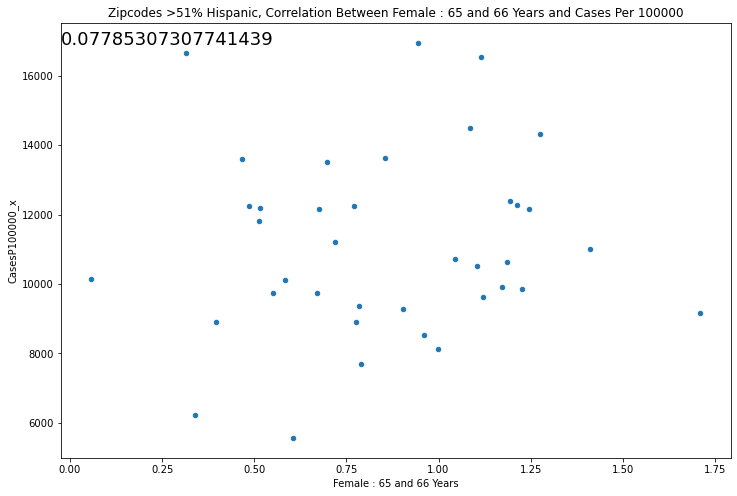

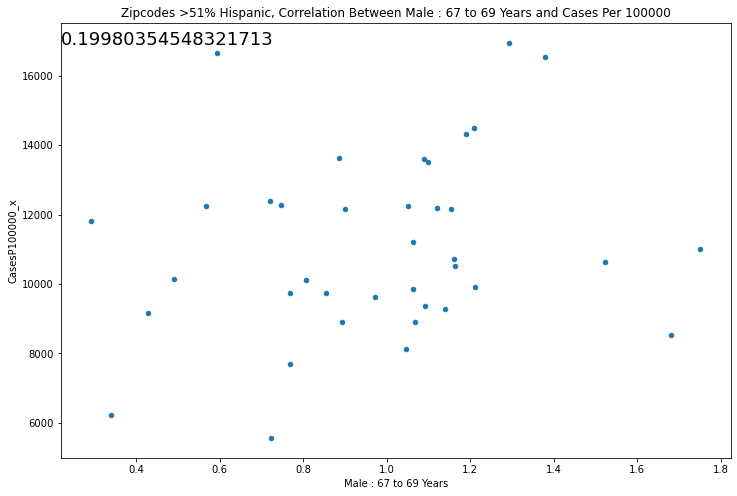

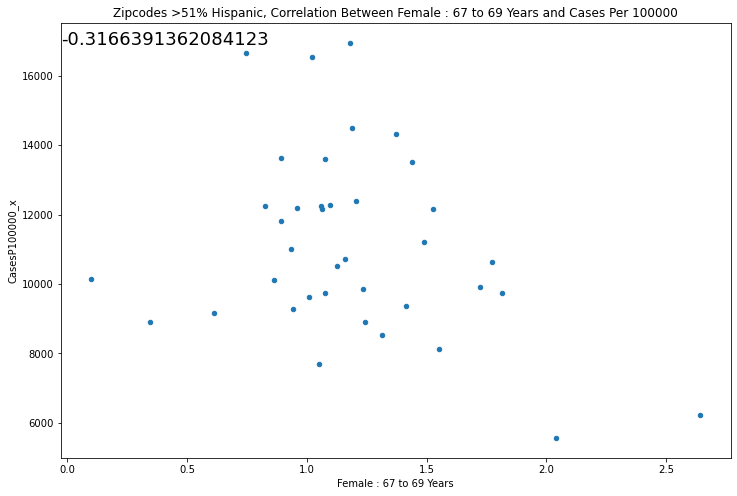

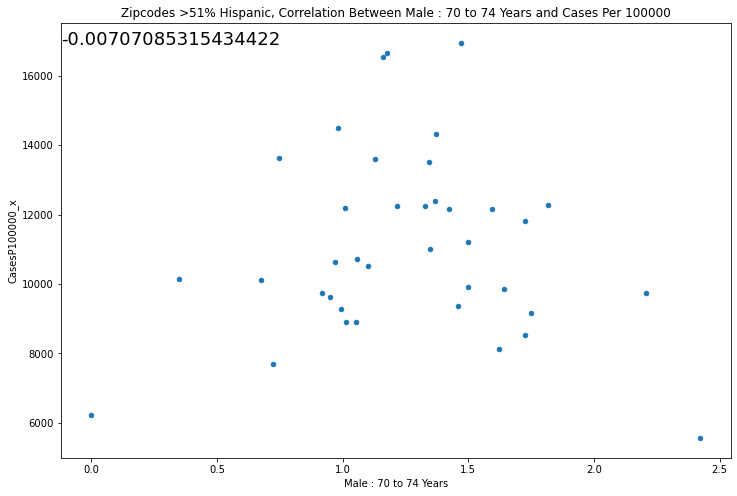

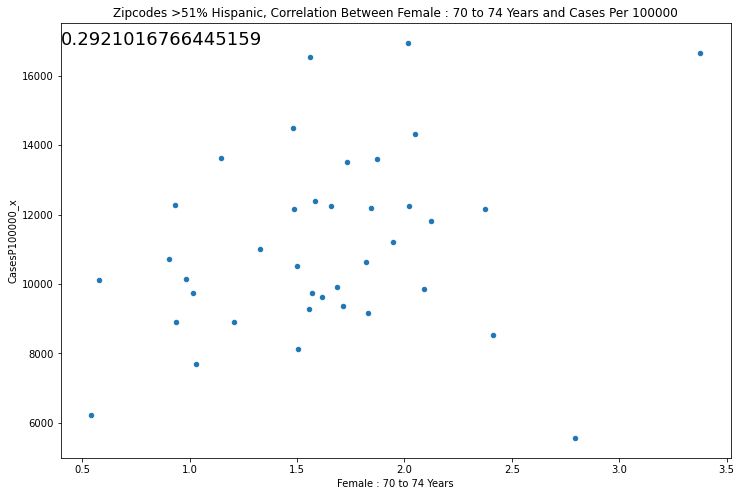

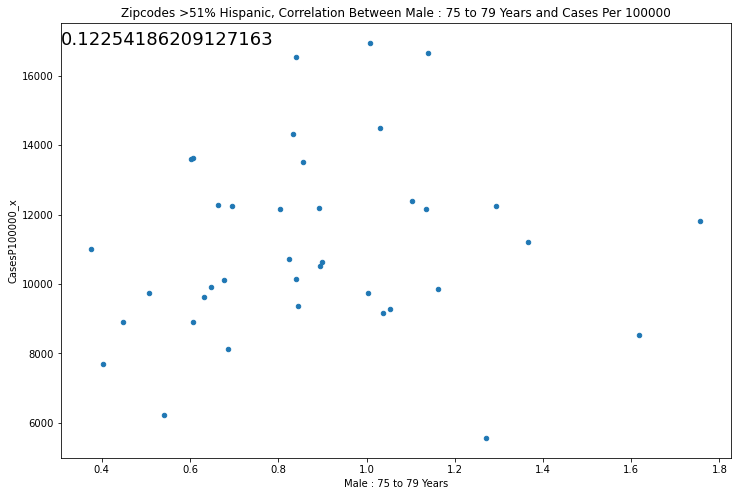

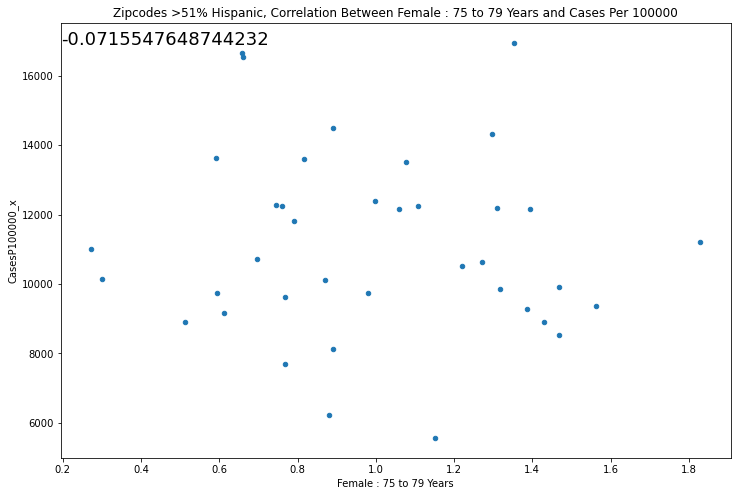

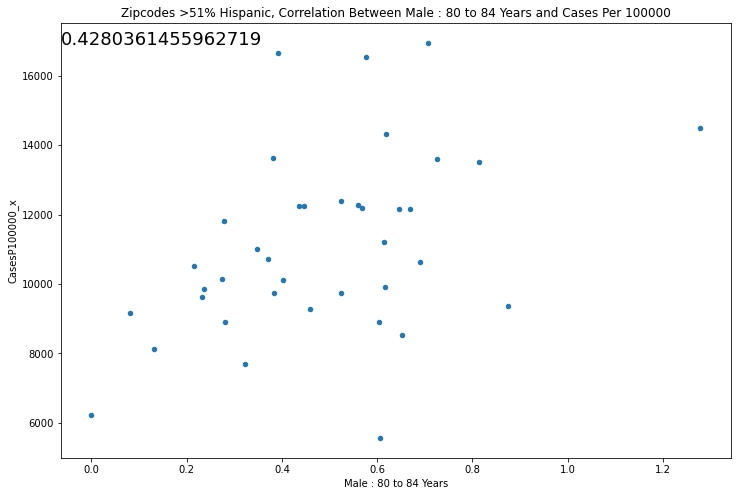

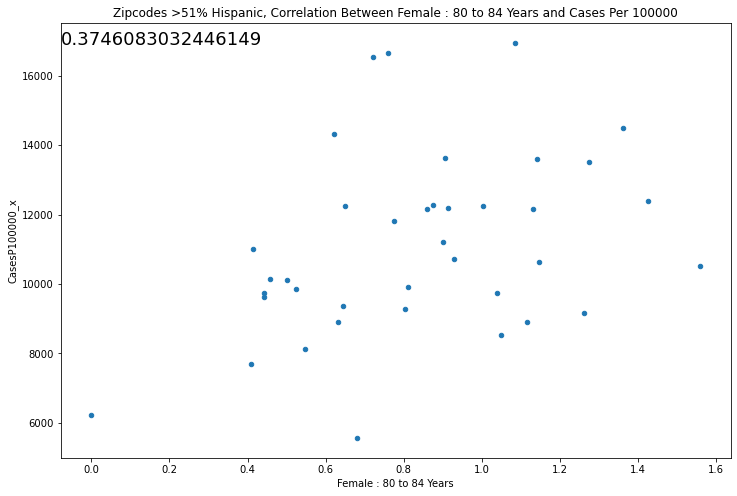

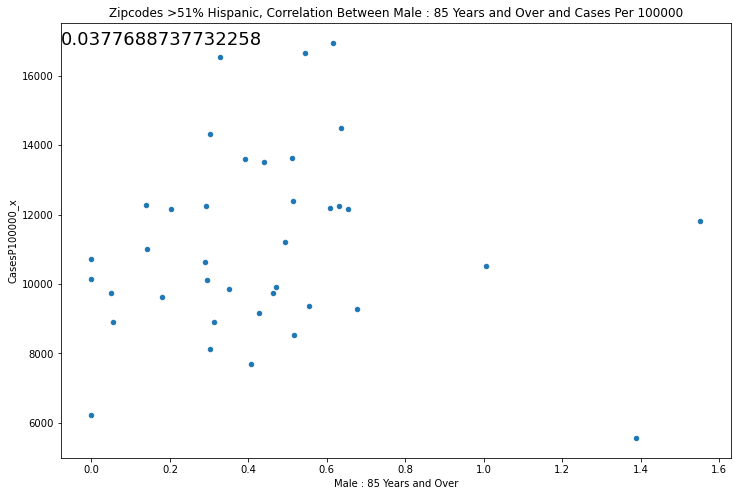

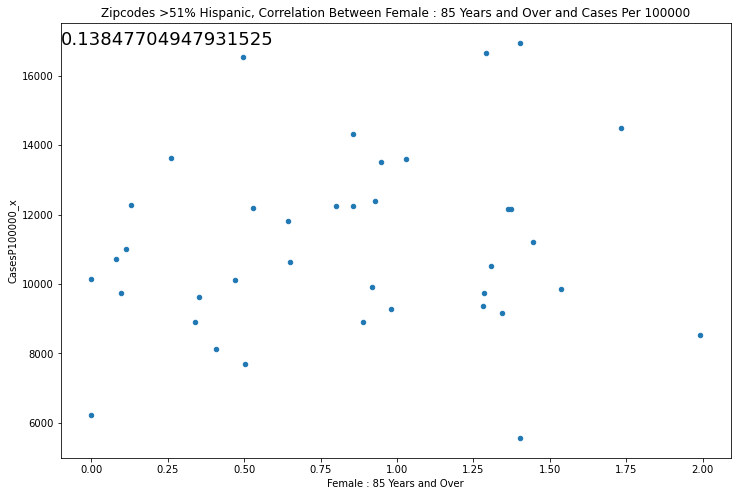

In [45]:
# Scatter plots for majority hispanic zipcodes
for element in age_list:
    agepercentage_majhf.plot.scatter(element,"CasesP100000_x", figsize = (12,8),title=f'Zipcodes >51% Hispanic, Correlation Between {element} and Cases Per 100000')
    correlation = st.pearsonr(agepercentage_majhf[element],
                                 agepercentage_majhf["CasesP100000_x"])
    plt.annotate(correlation[0],xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

# Final Plots

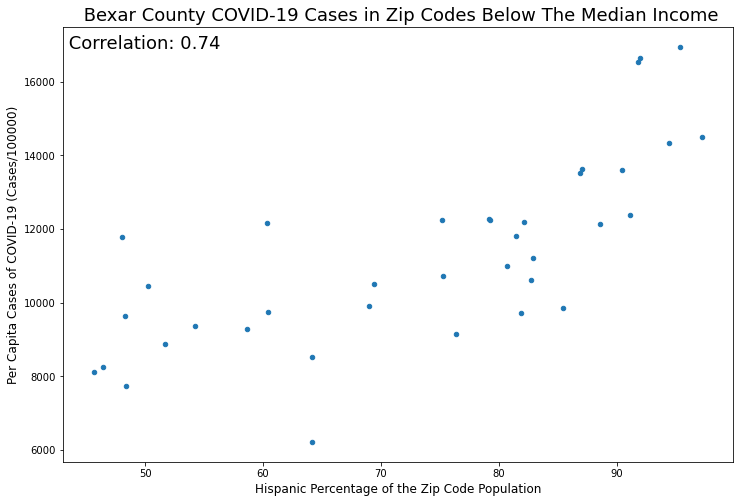

In [46]:
# Percent hispanic, filtered by below median incomes
ethnicity_belowmedian.plot.scatter('B03002_012E',"CasesP100000_x", figsize = (12,8))

# Format the output
plt.title(f' Bexar County COVID-19 Cases in Zip Codes Below The Median Income', fontsize =18)
plt.xlabel("Hispanic Percentage of the Zip Code Population", fontsize =12)
plt.ylabel("Per Capita Cases of COVID-19 (Cases/100000)", fontsize = 12)

# Calculate and output the correlation
correlation = st.pearsonr(ethnicity_belowmedian["B03002_012E"],ethnicity_belowmedian["CasesP100000_x"])
plt.annotate(f' Correlation: {round(correlation[0],2)}',xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

# Save figure to file
plt.savefig("Images\BelowMedianIncomeHispanic.png")

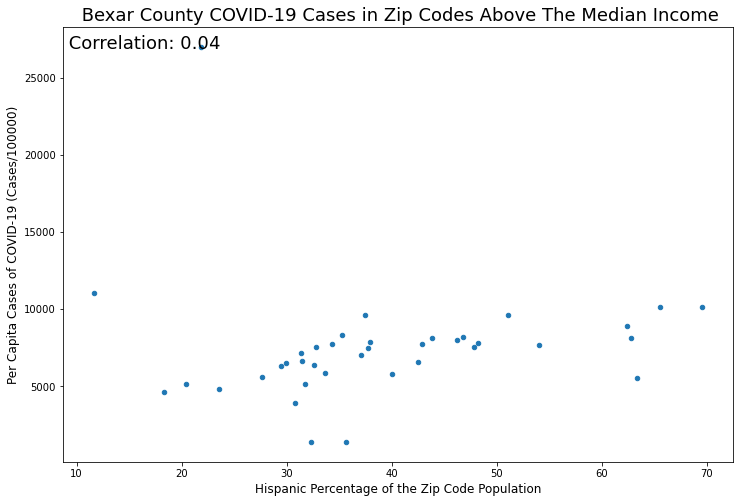

In [47]:
#Scatter plots for zipcodes above median income
ethnicity_abovemedian.plot.scatter('B03002_012E',"CasesP100000_x", figsize = (12,8))

# Format the output
plt.title(f' Bexar County COVID-19 Cases in Zip Codes Above The Median Income', fontsize =18)
plt.xlabel("Hispanic Percentage of the Zip Code Population", fontsize =12)
plt.ylabel("Per Capita Cases of COVID-19 (Cases/100000)", fontsize = 12)

# Calculate and output the correlation
correlation = st.pearsonr(ethnicity_abovemedian['B03002_012E'],ethnicity_abovemedian["CasesP100000_x"])
plt.annotate(f' Correlation: {round(correlation[0],2)}',xy=(0,0.95),fontsize = 18,xycoords='axes fraction')

# Save figure to file
plt.savefig("Images\AboveMedianIncomeHispanic.png")

In [48]:
bexar_countydata["CasesP100000"].median()

8895.1394635

In [49]:
# Filter Bexar county covid data in preparation for box plots

#merge data left to filter by income
bexar_belowmedian = pd.merge(belowmedian,bexar_countydata, on="ZipInt",how="left")
bexar_abovemedian = pd.merge(abovemedian,bexar_countydata, on= 'ZipInt', how = 'left')

#merge data left to filter additionally by ethnicity
bexar_majhisp_belowmedian = pd.DataFrame()
bexar_majhisp_belowmedian = pd.merge(bexar_belowmedian,majorityhispanic, on = "ZipInt",how = "inner") 

bexar_majnonhisp_abovemedian = pd.DataFrame()
bexar_majnonhisp_abovemedian = pd.merge(bexar_abovemedian,majoritynonhispanic, on = "ZipInt",how = "inner")


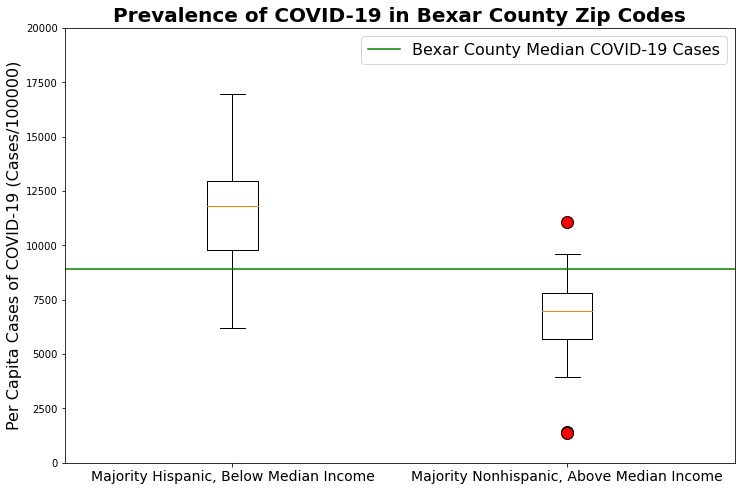

In [50]:
# Compare zipcodes filtered by ethnicity and income
fig, ax = plt.subplots(figsize = (12,8))
ax.boxplot([bexar_majhisp_belowmedian['CasesP100000'],bexar_majnonhisp_abovemedian["CasesP100000"]],flierprops = {'markerfacecolor':'r',"markersize":'12'})

# Improve formatting
ax.set_xticklabels(['Majority Hispanic, Below Median Income','Majority Nonhispanic, Above Median Income'],fontsize = "14")
ax.set_ylabel("Per Capita Cases of COVID-19 (Cases/100000)", fontsize = "16")
plt.title("Prevalence of COVID-19 in Bexar County Zip Codes",fontsize =20, fontweight = 'bold')
startingpoint = plt.plot([0,1,2,3,4,5,6],[8896,8896,8896,8896,8896,8896,8896],"green")
plt.xlim(0.5,2.5)
plt.ylim(0,20000)
plt.legend(startingpoint,["Bexar County Median COVID-19 Cases"], loc = 'upper right', prop = {'size' : 16})

# Save figure to file
plt.savefig("Images\IncomeEthnicityFilteredBoxplot")